# Simulation Study

## Importing the libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Some Useful Statistics

In [25]:
from simulation import get_mean_cov, get_beta

In [26]:
mean, cov = get_mean_cov()
linear_beta = get_beta(mean, cov, True)
non_linear_beta = get_beta(mean, cov, False)
print("Linear Beta:", linear_beta)
print("Non Linear Beta:", non_linear_beta)

Linear Beta: [-5.55004176  0.26372726 -0.12086647  1.49825317]
Non Linear Beta: [-5.55004176  0.26372726  0.01       -0.12086647  1.49825317]


In [27]:
from simulation import generate_datasets

In [28]:
X_list_linear, X_true_list_linear, y_list_linear, scaler_list_linear = generate_datasets(
    1, 500, 0.2, "MICE", True
)

X_list_non_linear, X_true_list_non_linear, y_list_non_linear, _ = generate_datasets( 
    1, 500, 0.2, "MICE", False
)

X_linear = X_true_list_linear[0]
y_linear = y_list_linear[0]

X_non_linear = X_true_list_non_linear[0]
y_non_linear = y_list_non_linear[0]

In [29]:
full_linear_data = pd.concat([X_linear, y_linear], axis=1)
full_non_linear_data = pd.concat([X_non_linear, y_non_linear], axis=1)

beta_linear_x1 = np.hstack([linear_beta[0], linear_beta[2:]])
beta_non_linear_x1 = np.hstack([non_linear_beta[0], non_linear_beta[3:]])

X_linear_x1 = X_linear.drop(["x1"], axis=1)
X_non_linear_x1 = X_non_linear.drop(["x1", "x1_squared"], axis=1)

In [30]:
full_linear_data["residuals"] = full_linear_data["y"] - beta_linear_x1 @ X_linear_x1.T
full_non_linear_data["residuals"] = full_non_linear_data["y"] - beta_non_linear_x1 @ X_non_linear_x1.T 

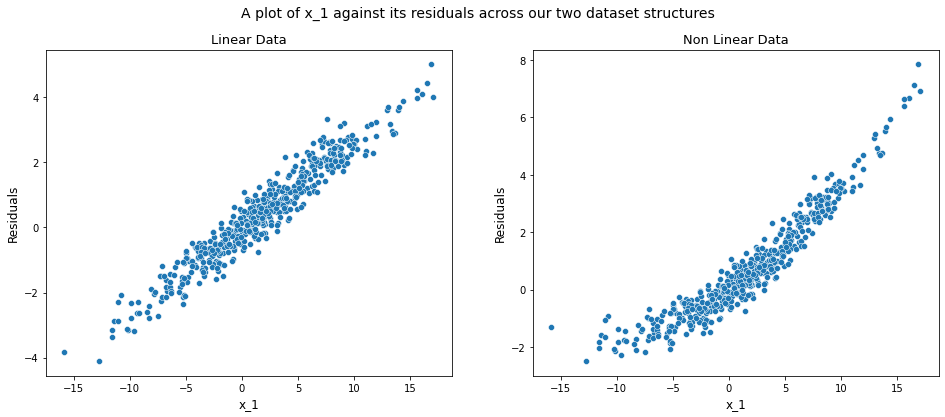

In [882]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("A plot of x_1 against its residuals across our two dataset structures", fontsize=14)
sns.scatterplot(x=full_linear_data["x1"], y=full_linear_data["residuals"], ax=axs[0])
axs[0].set_title("Linear Data", fontsize=13)
axs[0].set_xlabel("x_1", fontsize=12)
axs[0].set_ylabel("Residuals", fontsize=12)
sns.scatterplot(x=full_non_linear_data["x1"], y=full_non_linear_data["residuals"], ax=axs[1])
axs[1].set_title("Non Linear Data", fontsize=13)
axs[1].set_xlabel("x_1", fontsize=12)
axs[1].set_ylabel("Residuals", fontsize=12)
plt.show()

## Dealing with Linear Datasets

In [32]:
from simulation import generate_datasets

### Regression Coefficient Analysis

In [33]:
from knn import get_KNN_results_df
from mice import get_MICE_results_df
from simulation import summary_data

In [34]:
mse_comparison_dict, time_dict = {}, {}
sample_sizes = [250, 500, 1000]
model_type_list = [
    "WKNN-5", "WKNN-10", "WKNN-20", 
    "MICE-BLR", "MICE-DT", "MICE-LGBM",
    "PMM5-BLR", "PMM5-DT", "PMM5-LGBM"
]
for sample_size in sample_sizes: 
    mse_comparison_dict[sample_size] = {}
    mse_comparison_dict[sample_size]["model_type"] = model_type_list
    
    time_dict[sample_size] = {}
    time_dict[sample_size]["model_type"] = model_type_list
print(mse_comparison_dict)

{250: {'model_type': ['WKNN-5', 'WKNN-10', 'WKNN-20', 'MICE-BLR', 'MICE-DT', 'MICE-LGBM', 'PMM5-BLR', 'PMM5-DT', 'PMM5-LGBM']}, 500: {'model_type': ['WKNN-5', 'WKNN-10', 'WKNN-20', 'MICE-BLR', 'MICE-DT', 'MICE-LGBM', 'PMM5-BLR', 'PMM5-DT', 'PMM5-LGBM']}, 1000: {'model_type': ['WKNN-5', 'WKNN-10', 'WKNN-20', 'MICE-BLR', 'MICE-DT', 'MICE-LGBM', 'PMM5-BLR', 'PMM5-DT', 'PMM5-LGBM']}}


#### Sample Size 250

##### 10 Percent Missing

In [35]:
X_list, X_true_list, y_list, scaler_list = generate_datasets(
    101, 250, 0.1, "KNN", True
)

knn_df_list, knn_mse_list, _ = get_KNN_results_df(
    X_list, X_true_list, y_list, scaler_list, linear_beta, True
)

Imputing WKNN models
Imputing WKNN-5
Imputing WKNN-10
Imputing WKNN-20
Creating results dataframe


In [36]:
X_list, X_true_list, y_list, _ = generate_datasets(
    101, 250, 0.1, "MICE", True
)

In [37]:
mice_df_list, mice_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, linear_beta, "regression", True
)

Imputing MICE models
Imputing MICE-BLR
Imputing MICE-DT
Imputing MICE-LGB
Creating results dataframe


In [38]:
pmm5_df_list, pmm5_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, linear_beta, "pmm5", True  
)

Imputing PMM5 models
Imputing PMM5-BLR
Imputing PMM5-DT
Imputing PMM5-LGB
Creating results dataframe


In [39]:
combined_250_10_df = []
for df in knn_df_list: 
    combined_250_10_df.append(df)
for df in mice_df_list: 
    combined_250_10_df.append(df)
for df in pmm5_df_list: 
    combined_250_10_df.append(df)

stat_250_10_df = summary_data(combined_250_10_df, True)
stat_250_10_df

Beta_0                                 Beta_1            \
               Bias       Var       MSE Cov Prob      Bias       Var   
Type                                                                   
MICE-BLR  -0.004708  0.012420  0.012318     0.96 -0.000618  0.000128   
MICE-DT   -0.107284  0.014182  0.025550     0.90 -0.020316  0.000122   
MICE-LGBM  0.007580  0.014271  0.014186     0.93 -0.000141  0.000127   
PMM5-BLR  -0.008566  0.012618  0.012565     0.95 -0.000871  0.000130   
PMM5-DT   -0.105505  0.014991  0.025973     0.89 -0.019958  0.000142   
PMM5-LGBM  0.004995  0.014268  0.014150     0.92 -0.000314  0.000126   
WKNN-10   -0.030211  0.014020  0.014793     0.97 -0.005245  0.000150   
WKNN-20   -0.024314  0.013806  0.014259     0.96 -0.004171  0.000148   
WKNN-5    -0.047539  0.014388  0.016504     0.96 -0.007974  0.000154   

                                Beta_2                                 Beta_3  \
                MSE Cov Prob      Bias       Var       MSE Cov Prob      Bias   
Type                                                                            
MICE-BLR   0.000127     0.99  0.000708  0.000158  0.000157     0.95  0.000802   
MICE-DT    0.000534     0.77  0.017442  0.000161  0.000463     0.78  0.002292   
MICE-LGBM  0.000126     0.98  0.002397  0.000159  0.000163     0.93 -0.003781   
PMM5-BLR   0.000129     0.96  0.001204  0.000158  0.000158     0.98  0.000899   
PMM5-DT    0.000538     0.72  0.017470  0.000166  0.000469     0.77  0.001840   
PMM5-LGBM  0.000125     0.99  0.002498  0.000160  0.000165     0.94 -0.003360   
WKNN-10    0.000176     0.95  0.005837  0.000180  0.000212     0.93 -0.000064   
WKNN-20    0.000164     0.96  0.005946  0.000178  0.000211     0.93 -0.001386   
WKNN-5     0.000216     0.92  0.007113  0.000188  0.000237     0.92  0.001920   

                                        
                Var       MSE Cov Prob  
Type                                    
MICE-BLR   0.000535  0.000530     0.95  
MICE-DT    0.000737  0.000734     0.95  
MICE-LGBM  0.000646  0.000654     0.89  
PMM5-BLR   0.000527  0.000523     0.94  
PMM5-DT    0.000718  0.000714     0.97  
PMM5-LGBM  0.000654  0.000659     0.89  
WKNN-10    0.000622  0.000615     0.93  
WKNN-20    0.000612  0.000608     0.94  
WKNN-5     0.000645  0.000642     0.93

In [40]:
bias_250_10 = stat_250_10_df["Beta_1"]["Bias"]
mse_250_10 = stat_250_10_df["Beta_1"]["MSE"]
prob_250_10 = stat_250_10_df["Beta_1"]["Cov Prob"]

In [41]:
mse_10_size250 = np.hstack([
    knn_mse_list, mice_mse_list, pmm5_mse_list
])
mse_comparison_dict[250]["Missingness Percentage (10%)"] = mse_10_size250

##### 20 Percent Missing

In [42]:
X_list, X_true_list, y_list, scaler_list = generate_datasets(
    101, 250, 0.2, "KNN", True
)

knn_df_list, knn_mse_list, knn_time_list = get_KNN_results_df(
    X_list, X_true_list, y_list, scaler_list, linear_beta, True
)

Imputing WKNN models
Imputing WKNN-5
Imputing WKNN-10
Imputing WKNN-20
Creating results dataframe


In [43]:
X_list, X_true_list, y_list, _ = generate_datasets(
    101, 250, 0.2, "MICE", True
)

In [44]:
mice_df_list, mice_mse_list, mice_time_list = get_MICE_results_df(
    X_list, X_true_list, y_list, linear_beta, "regression", True
)

Imputing MICE models
Imputing MICE-BLR
Imputing MICE-DT
Imputing MICE-LGB
Creating results dataframe


In [45]:
pmm5_df_list, pmm5_mse_list, pmm5_time_list = get_MICE_results_df(
    X_list, X_true_list, y_list, linear_beta, "pmm5", True  
)

Imputing PMM5 models
Imputing PMM5-BLR
Imputing PMM5-DT
Imputing PMM5-LGB
Creating results dataframe


In [46]:
combined_250_20_df = []
for df in knn_df_list: 
    combined_250_20_df.append(df)
for df in mice_df_list: 
    combined_250_20_df.append(df)
for df in pmm5_df_list: 
    combined_250_20_df.append(df)

stat_250_20_df = summary_data(combined_250_20_df, True)
stat_250_20_df

Beta_0                                 Beta_1            \
               Bias       Var       MSE Cov Prob      Bias       Var   
Type                                                                   
MICE-BLR  -0.007364  0.013209  0.013131     1.00 -0.000981  0.000133   
MICE-DT   -0.211147  0.018710  0.063106     0.70 -0.040340  0.000140   
MICE-LGBM  0.013047  0.016717  0.016720     0.96 -0.001722  0.000165   
PMM5-BLR  -0.016066  0.013631  0.013753     0.96 -0.001660  0.000131   
PMM5-DT   -0.212553  0.018827  0.063817     0.66 -0.040138  0.000140   
PMM5-LGBM  0.010322  0.016816  0.016754     0.95 -0.001948  0.000165   
WKNN-10   -0.057917  0.017052  0.020236     0.90 -0.010943  0.000185   
WKNN-20   -0.043174  0.017166  0.018859     0.92 -0.008381  0.000178   
WKNN-5    -0.095566  0.017198  0.026159     0.89 -0.017043  0.000193   

                                Beta_2                                 Beta_3  \
                MSE Cov Prob      Bias       Var       MSE Cov Prob      Bias   
Type                                                                            
MICE-BLR   0.000133     0.98  0.000875  0.000172  0.000171     0.95  0.001130   
MICE-DT    0.001766     0.28  0.033730  0.000210  0.001346     0.45  0.004450   
MICE-LGBM  0.000166     0.98  0.005513  0.000231  0.000259     0.89 -0.008267   
PMM5-BLR   0.000133     0.99  0.002241  0.000163  0.000166     0.96  0.001311   
PMM5-DT    0.001750     0.33  0.034032  0.000206  0.001362     0.50  0.004260   
PMM5-LGBM  0.000168     0.98  0.005965  0.000228  0.000261     0.88 -0.008121   
WKNN-10    0.000303     0.91  0.011501  0.000239  0.000369     0.89 -0.000729   
WKNN-20    0.000247     0.94  0.011632  0.000231  0.000364     0.89 -0.003845   
WKNN-5     0.000482     0.85  0.014394  0.000251  0.000455     0.88  0.003512   

                                        
                Var       MSE Cov Prob  
Type                                    
MICE-BLR   0.000617  0.000612     0.92  
MICE-DT    0.001070  0.001079     0.92  
MICE-LGBM  0.000874  0.000934     0.89  
PMM5-BLR   0.000631  0.000627     0.91  
PMM5-DT    0.001065  0.001072     0.91  
PMM5-LGBM  0.000868  0.000925     0.90  
WKNN-10    0.000850  0.000842     0.91  
WKNN-20    0.000835  0.000841     0.91  
WKNN-5     0.000874  0.000877     0.89

In [47]:
bias_250_20 = stat_250_20_df["Beta_1"]["Bias"]
mse_250_20 = stat_250_20_df["Beta_1"]["MSE"]
prob_250_20 = stat_250_20_df["Beta_1"]["Cov Prob"]

In [48]:
mse_20_size250 = np.hstack([
    knn_mse_list, mice_mse_list, pmm5_mse_list
])
mse_comparison_dict[250]["Missingness Percentage (20%)"] = mse_20_size250

In [49]:
time_20_size250 = np.hstack([
    knn_time_list, mice_time_list, pmm5_time_list
])
time_dict[250]["Execution Time"] = time_20_size250

##### 30 Percent Missing

In [50]:
X_list, X_true_list, y_list, scaler_list = generate_datasets(
    101, 250, 0.3, "KNN", True
)

knn_df_list, knn_mse_list, _ = get_KNN_results_df(
    X_list, X_true_list, y_list, scaler_list, linear_beta, True
)

Imputing WKNN models
Imputing WKNN-5
Imputing WKNN-10
Imputing WKNN-20
Creating results dataframe


In [51]:
X_list, X_true_list, y_list, _ = generate_datasets(
    101, 250, 0.3, "MICE", True
)

In [52]:
mice_df_list, mice_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, linear_beta, "regression", True
)

Imputing MICE models
Imputing MICE-BLR
Imputing MICE-DT
Imputing MICE-LGB
Creating results dataframe


In [53]:
pmm5_df_list, pmm5_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, linear_beta, "pmm5", True
)

Imputing PMM5 models
Imputing PMM5-BLR
Imputing PMM5-DT
Imputing PMM5-LGB
Creating results dataframe


In [54]:
combined_250_30_df = []
for df in knn_df_list: 
    combined_250_30_df.append(df)
for df in mice_df_list: 
    combined_250_30_df.append(df)
for df in pmm5_df_list: 
    combined_250_30_df.append(df)

stat_250_30_df = summary_data(combined_250_30_df, True)
stat_250_30_df

Beta_0                                 Beta_1            \
               Bias       Var       MSE Cov Prob      Bias       Var   
Type                                                                   
MICE-BLR  -0.010919  0.013756  0.013737     0.98 -0.001727  0.000135   
MICE-DT   -0.322703  0.022285  0.126200     0.47 -0.061920  0.000189   
MICE-LGBM  0.011086  0.021920  0.021823     0.93 -0.004263  0.000182   
PMM5-BLR  -0.032035  0.015276  0.016149     0.95 -0.003174  0.000155   
PMM5-DT   -0.323629  0.022262  0.126775     0.47 -0.061288  0.000188   
PMM5-LGBM  0.003885  0.021705  0.021503     0.92 -0.004897  0.000181   
WKNN-10   -0.096400  0.018997  0.028100     0.92 -0.017407  0.000222   
WKNN-20   -0.077595  0.018588  0.024423     0.94 -0.014015  0.000209   
WKNN-5    -0.152356  0.019011  0.042033     0.84 -0.026499  0.000241   

                                Beta_2                                 Beta_3  \
                MSE Cov Prob      Bias       Var       MSE Cov Prob      Bias   
Type                                                                            
MICE-BLR   0.000137     0.98  0.001527  0.000177  0.000178     0.97  0.001197   
MICE-DT    0.004021     0.04  0.051740  0.000202  0.002877     0.15  0.006527   
MICE-LGBM  0.000199     0.95  0.009663  0.000229  0.000320     0.88 -0.011980   
PMM5-BLR   0.000164     0.97  0.004320  0.000188  0.000205     0.95  0.002356   
PMM5-DT    0.003943     0.04  0.051534  0.000201  0.002855     0.14  0.006914   
PMM5-LGBM  0.000203     0.97  0.010399  0.000229  0.000334     0.87 -0.011293   
WKNN-10    0.000523     0.88  0.018095  0.000284  0.000608     0.80 -0.000131   
WKNN-20    0.000403     0.93  0.018718  0.000278  0.000626     0.79 -0.004653   
WKNN-5     0.000941     0.70  0.022484  0.000306  0.000809     0.70  0.006006   

                                        
                Var       MSE Cov Prob  
Type                                    
MICE-BLR   0.000664  0.000659     0.96  
MICE-DT    0.001117  0.001148     0.96  
MICE-LGBM  0.000990  0.001124     0.89  
PMM5-BLR   0.000643  0.000642     0.94  
PMM5-DT    0.001135  0.001172     0.94  
PMM5-LGBM  0.000975  0.001093     0.90  
WKNN-10    0.000997  0.000987     0.94  
WKNN-20    0.000973  0.000985     0.92  
WKNN-5     0.000994  0.001020     0.91

In [55]:
bias_250_30 = stat_250_30_df["Beta_1"]["Bias"]
mse_250_30 = stat_250_30_df["Beta_1"]["MSE"]
prob_250_30 = stat_250_30_df["Beta_1"]["Cov Prob"]

In [56]:
mse_30_size250 = np.hstack([
    knn_mse_list, mice_mse_list, pmm5_mse_list
])
mse_comparison_dict[250]["Missingness Percentage (30%)"] = mse_30_size250

#### Sample Size 500

##### 10 Percent Missing

In [57]:
X_list, X_true_list, y_list, scaler_list = generate_datasets(
    101, 500, 0.1, "KNN", True
)

knn_df_list, knn_mse_list, _ = get_KNN_results_df(
    X_list, X_true_list, y_list, scaler_list, linear_beta, True
)

Imputing WKNN models
Imputing WKNN-5
Imputing WKNN-10
Imputing WKNN-20
Creating results dataframe


In [58]:
X_list, X_true_list, y_list, _ = generate_datasets(
    101, 500, 0.1, "MICE", True
)

In [59]:
mice_df_list, mice_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, linear_beta, "regression", True
)

Imputing MICE models
Imputing MICE-BLR
Imputing MICE-DT
Imputing MICE-LGB
Creating results dataframe


In [60]:
pmm5_df_list, pmm5_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, linear_beta, "pmm5", True
)

Imputing PMM5 models
Imputing PMM5-BLR
Imputing PMM5-DT
Imputing PMM5-LGB
Creating results dataframe


In [61]:
combined_500_10_df = []
for df in knn_df_list: 
    combined_500_10_df.append(df)
for df in mice_df_list: 
    combined_500_10_df.append(df)
for df in pmm5_df_list: 
    combined_500_10_df.append(df)
stat_500_10_df = summary_data(combined_500_10_df, True)
stat_500_10_df

Beta_0                                 Beta_1            \
               Bias       Var       MSE Cov Prob      Bias       Var   
Type                                                                   
MICE-BLR   0.005073  0.005773  0.005741     0.95  0.000083  0.000073   
MICE-DT   -0.063578  0.006609  0.010585     0.91 -0.013931  0.000080   
MICE-LGBM  0.022752  0.005962  0.006420     0.92  0.002174  0.000076   
PMM5-BLR   0.004455  0.006114  0.006073     0.92  0.000181  0.000075   
PMM5-DT   -0.063774  0.006447  0.010449     0.91 -0.013931  0.000075   
PMM5-LGBM  0.023026  0.005955  0.006425     0.92  0.002251  0.000075   
WKNN-10   -0.015553  0.006794  0.006967     0.91 -0.003931  0.000087   
WKNN-20   -0.005858  0.006883  0.006849     0.93 -0.002426  0.000085   
WKNN-5    -0.035967  0.006903  0.008128     0.92 -0.006967  0.000087   

                                Beta_2                                 Beta_3  \
                MSE Cov Prob      Bias       Var       MSE Cov Prob      Bias   
Type                                                                            
MICE-BLR   0.000073     0.94  0.000510  0.000079  0.000078     0.95 -0.001247   
MICE-DT    0.000273     0.73  0.012628  0.000087  0.000246     0.78 -0.001237   
MICE-LGBM  0.000080     0.91 -0.000048  0.000080  0.000079     0.95 -0.004184   
PMM5-BLR   0.000074     0.92  0.000592  0.000076  0.000076     0.95 -0.001187   
PMM5-DT    0.000269     0.73  0.012697  0.000084  0.000244     0.79 -0.001274   
PMM5-LGBM  0.000079     0.91 -0.000031  0.000078  0.000077     0.96 -0.004258   
WKNN-10    0.000101     0.91  0.004182  0.000085  0.000102     0.92 -0.001183   
WKNN-20    0.000090     0.94  0.003791  0.000087  0.000100     0.92 -0.002651   
WKNN-5     0.000134     0.87  0.005675  0.000085  0.000116     0.92  0.001147   

                                        
                Var       MSE Cov Prob  
Type                                    
MICE-BLR   0.000213  0.000213     0.97  
MICE-DT    0.000276  0.000275     0.95  
MICE-LGBM  0.000233  0.000248     0.94  
PMM5-BLR   0.000217  0.000217     0.97  
PMM5-DT    0.000276  0.000274     0.96  
PMM5-LGBM  0.000231  0.000247     0.94  
WKNN-10    0.000268  0.000267     0.95  
WKNN-20    0.000275  0.000279     0.93  
WKNN-5     0.000274  0.000272     0.97

In [62]:
bias_500_10 = stat_500_10_df["Beta_1"]["Bias"]
mse_500_10 = stat_500_10_df["Beta_1"]["MSE"]
prob_500_10 = stat_500_10_df["Beta_1"]["Cov Prob"]

In [63]:
mse_10_size500 = np.hstack([
    knn_mse_list, mice_mse_list, pmm5_mse_list
])
mse_comparison_dict[500]["Missingness Percentage (10%)"] = mse_10_size500

##### 20 Percent Missing

In [64]:
X_list, X_true_list, y_list, scaler_list = generate_datasets(
    101, 500, 0.2, "KNN", True
)

knn_df_list, knn_mse_list, knn_time_list = get_KNN_results_df(
    X_list, X_true_list, y_list, scaler_list, linear_beta, True
)

Imputing WKNN models
Imputing WKNN-5
Imputing WKNN-10
Imputing WKNN-20
Creating results dataframe


In [315]:
X_list, X_true_list, y_list, _ = generate_datasets(
    101, 500, 0.2, "MICE", True
)

In [316]:
mice_df_list, mice_mse_list, mice_time_list = get_MICE_results_df(
    X_list, X_true_list, y_list, linear_beta, "regression", True
)

Imputing MICE models
Imputing MICE-BLR
Imputing MICE-DT
Imputing MICE-LGB
Creating results dataframe


In [318]:
pmm5_df_list, pmm5_mse_list, pmm5_time_list = get_MICE_results_df(
    X_list, X_true_list, y_list, linear_beta, "pmm5", True  
)

Imputing PMM5 models
Imputing PMM5-BLR


KeyboardInterrupt: 

In [68]:
combined_500_20_df = []
for df in knn_df_list: 
    combined_500_20_df.append(df)
for df in mice_df_list: 
    combined_500_20_df.append(df)
for df in pmm5_df_list: 
    combined_500_20_df.append(df)
stat_500_20_df = summary_data(combined_500_20_df, True)
stat_500_20_df

Beta_0                                 Beta_1            \
               Bias       Var       MSE Cov Prob      Bias       Var   
Type                                                                   
MICE-BLR   0.004361  0.007129  0.007077     0.93 -0.000010  0.000087   
MICE-DT   -0.145711  0.009473  0.030610     0.68 -0.030437  0.000097   
MICE-LGBM  0.042109  0.007772  0.009468     0.88  0.003768  0.000093   
PMM5-BLR   0.001084  0.007191  0.007120     0.97 -0.000206  0.000091   
PMM5-DT   -0.145047  0.009242  0.030188     0.71 -0.030229  0.000097   
PMM5-LGBM  0.040077  0.007606  0.009136     0.89  0.003708  0.000092   
WKNN-10   -0.044660  0.008973  0.010877     0.89 -0.009132  0.000101   
WKNN-20   -0.024674  0.009156  0.009673     0.90 -0.005973  0.000101   
WKNN-5    -0.081409  0.009449  0.015982     0.88 -0.014966  0.000106   

                                Beta_2                                 Beta_3  \
                MSE Cov Prob      Bias       Var       MSE Cov Prob      Bias   
Type                                                                            
MICE-BLR   0.000086     0.94  0.000887  0.000084  0.000084     0.95 -0.001498   
MICE-DT    0.001022     0.15  0.026954  0.000086  0.000811     0.31 -0.001063   
MICE-LGBM  0.000106     0.91  0.000124  0.000086  0.000085     0.94 -0.008051   
PMM5-BLR   0.000090     0.93  0.001452  0.000084  0.000086     0.93 -0.001381   
PMM5-DT    0.001010     0.17  0.026980  0.000087  0.000814     0.29 -0.001105   
PMM5-LGBM  0.000105     0.91  0.000172  0.000085  0.000084     0.93 -0.007732   
WKNN-10    0.000183     0.89  0.009477  0.000088  0.000177     0.86 -0.001384   
WKNN-20    0.000136     0.92  0.008572  0.000088  0.000161     0.88 -0.004279   
WKNN-5     0.000329     0.77  0.012534  0.000088  0.000244     0.83  0.002440   

                                        
                Var       MSE Cov Prob  
Type                                    
MICE-BLR   0.000235  0.000235     0.96  
MICE-DT    0.000357  0.000354     0.96  
MICE-LGBM  0.000278  0.000340     0.92  
PMM5-BLR   0.000242  0.000241     0.98  
PMM5-DT    0.000351  0.000349     0.98  
PMM5-LGBM  0.000273  0.000330     0.92  
WKNN-10    0.000301  0.000300     0.95  
WKNN-20    0.000311  0.000326     0.94  
WKNN-5     0.000320  0.000322     0.95

In [69]:
bias_500_20 = stat_500_20_df["Beta_1"]["Bias"]
mse_500_20 = stat_500_20_df["Beta_1"]["MSE"]
prob_500_20 = stat_500_20_df["Beta_1"]["Cov Prob"]

In [70]:
mse_20_size500 = np.hstack([
    knn_mse_list, mice_mse_list, pmm5_mse_list
])
mse_comparison_dict[500]["Missingness Percentage (20%)"] = mse_20_size500

In [71]:
time_20_size500 = np.hstack([
    knn_time_list, mice_time_list, pmm5_time_list
])
time_dict[500]["Execution Time"] = time_20_size500

##### 30 Percent Missing

In [72]:
X_list, X_true_list, y_list, scaler_list = generate_datasets(
    101, 500, 0.3, "KNN", True
)

knn_df_list, knn_mse_list, _ = get_KNN_results_df(
    X_list, X_true_list, y_list, scaler_list, linear_beta, True
)

Imputing WKNN models
Imputing WKNN-5
Imputing WKNN-10
Imputing WKNN-20
Creating results dataframe


In [73]:
X_list, X_true_list, y_list, _ = generate_datasets(
    101, 500, 0.3, "MICE", True
)

In [74]:
mice_df_list, mice_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, linear_beta, "regression", True
)


Imputing MICE models
Imputing MICE-BLR
Imputing MICE-DT
Imputing MICE-LGB
Creating results dataframe


In [75]:
pmm5_df_list, pmm5_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, linear_beta, "pmm5", True  
)

Imputing PMM5 models
Imputing PMM5-BLR
Imputing PMM5-DT
Imputing PMM5-LGB
Creating results dataframe


In [76]:
combined_500_30_df = []
for df in knn_df_list: 
    combined_500_30_df.append(df)
for df in mice_df_list: 
    combined_500_30_df.append(df)
for df in pmm5_df_list: 
    combined_500_30_df.append(df)

stat_500_30_df = summary_data(combined_500_30_df, True)
stat_500_30_df

Beta_0                                 Beta_1            \
               Bias       Var       MSE Cov Prob      Bias       Var   
Type                                                                   
MICE-BLR   0.002918  0.008058  0.007986     0.95 -0.000342  0.000084   
MICE-DT   -0.241629  0.011640  0.069909     0.40 -0.048789  0.000088   
MICE-LGBM  0.050835  0.009988  0.012473     0.87  0.004179  0.000095   
PMM5-BLR  -0.007024  0.008591  0.008555     0.93 -0.000737  0.000085   
PMM5-DT   -0.238011  0.011624  0.068158     0.43 -0.047924  0.000081   
PMM5-LGBM  0.048602  0.010097  0.012358     0.87  0.004015  0.000095   
WKNN-10   -0.076674  0.011662  0.017424     0.89 -0.015158  0.000096   
WKNN-20   -0.046641  0.011646  0.013705     0.92 -0.010299  0.000094   
WKNN-5    -0.137860  0.012637  0.031516     0.71 -0.024897  0.000116   

                                Beta_2                                 Beta_3  \
                MSE Cov Prob      Bias       Var       MSE Cov Prob      Bias   
Type                                                                            
MICE-BLR   0.000083     0.97  0.001037  0.000091  0.000091     0.95 -0.001157   
MICE-DT    0.002467     0.00  0.041720  0.000100  0.001839     0.02  0.001328   
MICE-LGBM  0.000111     0.90  0.001052  0.000095  0.000095     0.91 -0.010856   
PMM5-BLR   0.000085     0.96  0.001844  0.000089  0.000091     0.98 -0.000153   
PMM5-DT    0.002377     0.00  0.041351  0.000096  0.001805     0.04  0.001144   
PMM5-LGBM  0.000110     0.90  0.001342  0.000094  0.000095     0.90 -0.010788   
WKNN-10    0.000325     0.84  0.015144  0.000100  0.000328     0.77 -0.001518   
WKNN-20    0.000199     0.91  0.013792  0.000100  0.000290     0.78 -0.005911   
WKNN-5     0.000735     0.51  0.020539  0.000107  0.000528     0.60  0.004483   

                                        
                Var       MSE Cov Prob  
Type                                    
MICE-BLR   0.000299  0.000297     0.94  
MICE-DT    0.000495  0.000491     0.95  
MICE-LGBM  0.000397  0.000511     0.86  
PMM5-BLR   0.000312  0.000309     0.95  
PMM5-DT    0.000486  0.000483     0.95  
PMM5-LGBM  0.000397  0.000509     0.85  
WKNN-10    0.000404  0.000402     0.96  
WKNN-20    0.000410  0.000441     0.92  
WKNN-5     0.000406  0.000422     0.95

In [77]:
bias_500_30 = stat_500_30_df["Beta_1"]["Bias"]
mse_500_30 = stat_500_30_df["Beta_1"]["MSE"]
prob_500_30 = stat_500_30_df["Beta_1"]["Cov Prob"]

In [78]:
mse_30_size500 = np.hstack([
    knn_mse_list, mice_mse_list, pmm5_mse_list
])
mse_comparison_dict[500]["Missingness Percentage (30%)"] = mse_30_size500

#### Sample Size 1000

##### 10 Percent Missing

In [79]:
X_list, X_true_list, y_list, scaler_list = generate_datasets(
    101, 1000, 0.1, "KNN", True
)

knn_df_list, knn_mse_list, _ = get_KNN_results_df(
    X_list, X_true_list, y_list, scaler_list, linear_beta, True
)

Imputing WKNN models
Imputing WKNN-5
Imputing WKNN-10
Imputing WKNN-20
Creating results dataframe


In [80]:
X_list, X_true_list, y_list, _ = generate_datasets(
    101, 1000, 0.1, "MICE", True
)

In [81]:
mice_df_list, mice_mse_list, mice_time_list = get_MICE_results_df(
    X_list, X_true_list, y_list, linear_beta, "regression", True
)

Imputing MICE models
Imputing MICE-BLR
Imputing MICE-DT
Imputing MICE-LGB
Creating results dataframe


In [82]:
pmm_df_list, pmm_mse_list, pmm_time_list = get_MICE_results_df(
    X_list, X_true_list, y_list, linear_beta, "pmm5", True  
)

Imputing PMM5 models
Imputing PMM5-BLR
Imputing PMM5-DT
Imputing PMM5-LGB
Creating results dataframe


In [83]:
combined_1000_10_df = []
for df in knn_df_list: 
    combined_1000_10_df.append(df)
for df in mice_df_list: 
    combined_1000_10_df.append(df)
for df in pmm_df_list: 
    combined_1000_10_df.append(df)

stat_1000_10_df = summary_data(combined_1000_10_df, True)
stat_1000_10_df

Beta_0                                 Beta_1            \
               Bias       Var       MSE Cov Prob      Bias       Var   
Type                                                                   
MICE-BLR   0.003759  0.002724  0.002711     0.96  0.000310  0.000031   
MICE-DT   -0.050108  0.003316  0.005794     0.90 -0.010288  0.000030   
MICE-LGBM  0.017542  0.003053  0.003330     0.95  0.002305  0.000032   
PMM5-BLR   0.001389  0.002910  0.002883     0.96  0.000135  0.000032   
PMM5-DT   -0.051200  0.003409  0.005996     0.87 -0.010233  0.000031   
PMM5-LGBM  0.016859  0.003061  0.003315     0.95  0.002217  0.000031   
WKNN-10   -0.023157  0.003319  0.003822     0.94 -0.004080  0.000035   
WKNN-20   -0.012134  0.003380  0.003493     0.95 -0.002391  0.000035   
WKNN-5    -0.042611  0.003241  0.005024     0.89 -0.007241  0.000036   

                                Beta_2                                 Beta_3  \
                MSE Cov Prob      Bias       Var       MSE Cov Prob      Bias   
Type                                                                            
MICE-BLR   0.000031     0.98 -0.000035  0.000041  0.000041     0.95 -0.000783   
MICE-DT    0.000136     0.71  0.008869  0.000046  0.000124     0.68 -0.000029   
MICE-LGBM  0.000037     0.96 -0.000997  0.000046  0.000046     0.93 -0.002460   
PMM5-BLR   0.000032     0.97  0.000164  0.000042  0.000041     0.93 -0.000568   
PMM5-DT    0.000135     0.72  0.008713  0.000046  0.000121     0.69  0.000308   
PMM5-LGBM  0.000036     0.96 -0.000870  0.000045  0.000045     0.94 -0.002473   
WKNN-10    0.000052     0.92  0.003433  0.000055  0.000066     0.89  0.000686   
WKNN-20    0.000040     0.96  0.002669  0.000055  0.000061     0.92 -0.000636   
WKNN-5     0.000088     0.77  0.005411  0.000056  0.000085     0.84  0.002333   

                                        
                Var       MSE Cov Prob  
Type                                    
MICE-BLR   0.000123  0.000122     0.94  
MICE-DT    0.000155  0.000154     0.96  
MICE-LGBM  0.000142  0.000147     0.90  
PMM5-BLR   0.000125  0.000124     0.93  
PMM5-DT    0.000158  0.000157     0.95  
PMM5-LGBM  0.000142  0.000147     0.90  
WKNN-10    0.000161  0.000160     0.96  
WKNN-20    0.000164  0.000163     0.95  
WKNN-5     0.000162  0.000166     0.94

In [84]:
bias_1000_10 = stat_1000_10_df["Beta_1"]["Bias"]
mse_1000_10 = stat_1000_10_df["Beta_1"]["MSE"]
prob_1000_10 = stat_1000_10_df["Beta_1"]["Cov Prob"]

In [85]:
mse_10_size1000 = np.hstack([knn_mse_list, mice_mse_list, pmm_mse_list])
mse_comparison_dict[1000]["Missingness Percentage (10%)"] = mse_10_size1000

##### 20 Percent Missing

In [86]:
X_list, X_true_list, y_list, scaler_list = generate_datasets(
    101, 1000, 0.2, "KNN", True
)

knn_df_list, knn_mse_list, knn_time_list = get_KNN_results_df(
    X_list, X_true_list, y_list, scaler_list, linear_beta, True
)

Imputing WKNN models
Imputing WKNN-5
Imputing WKNN-10
Imputing WKNN-20
Creating results dataframe


In [311]:
X_list, X_true_list, y_list, _ = generate_datasets(
    101, 1000, 0.2, "MICE", True
)

In [312]:
mice_df_list, mice_mse_list, mice_time_list = get_MICE_results_df(
    X_list, X_true_list, y_list, linear_beta, "regression", True
)

Imputing MICE models
Imputing MICE-BLR
Imputing MICE-DT
Imputing MICE-LGB
Creating results dataframe


In [326]:
time_20_size1000

array([  1.53680778,   1.6567347 ,   1.31835556,  36.97298551,
        12.77988577,  56.56810308, 502.76539159,  69.65472388,
       137.04991198])

In [314]:
pmm_df_list, pmm_mse_list, pmm_time_list = get_MICE_results_df(
    X_list, X_true_list, y_list, linear_beta, "pmm5", True  
)

Imputing PMM5 models
Imputing PMM5-BLR


KeyboardInterrupt: 

In [90]:
combined_1000_20_df = []
for df in knn_df_list: 
    combined_1000_20_df.append(df)
for df in mice_df_list: 
    combined_1000_20_df.append(df)
for df in pmm_df_list: 
    combined_1000_20_df.append(df)

stat_1000_20_df = summary_data(combined_1000_20_df, True)
stat_1000_20_df

Beta_0                                 Beta_1            \
               Bias       Var       MSE Cov Prob      Bias       Var   
Type                                                                   
MICE-BLR   0.001807  0.003163  0.003135     0.96  0.000259  0.000036   
MICE-DT   -0.108534  0.003980  0.015720     0.62 -0.022322  0.000040   
MICE-LGBM  0.030432  0.003603  0.004493     0.89  0.003835  0.000036   
PMM5-BLR  -0.000030  0.003118  0.003087     0.97  0.000220  0.000036   
PMM5-DT   -0.108058  0.003736  0.015376     0.68 -0.022098  0.000037   
PMM5-LGBM  0.029633  0.003595  0.004437     0.88  0.003835  0.000036   
WKNN-10   -0.053237  0.003479  0.006278     0.89 -0.008817  0.000045   
WKNN-20   -0.030497  0.003580  0.004474     0.96 -0.005400  0.000044   
WKNN-5    -0.094144  0.003456  0.012284     0.72 -0.015308  0.000047   

                                Beta_2                                 Beta_3  \
                MSE Cov Prob      Bias       Var       MSE Cov Prob      Bias   
Type                                                                            
MICE-BLR   0.000036     0.97 -0.000177  0.000046  0.000046     0.96 -0.000185   
MICE-DT    0.000538     0.13  0.019097  0.000056  0.000420     0.30  0.000086   
MICE-LGBM  0.000050     0.91 -0.001388  0.000052  0.000053     0.91 -0.004516   
PMM5-BLR   0.000036     0.95  0.000196  0.000047  0.000046     0.96 -0.000342   
PMM5-DT    0.000524     0.09  0.018999  0.000054  0.000415     0.28  0.000062   
PMM5-LGBM  0.000050     0.90 -0.001381  0.000052  0.000054     0.89 -0.004383   
WKNN-10    0.000123     0.81  0.007019  0.000072  0.000121     0.83  0.002550   
WKNN-20    0.000073     0.90  0.005550  0.000071  0.000101     0.87 -0.000294   
WKNN-5     0.000281     0.47  0.010917  0.000074  0.000193     0.69  0.006269   

                                        
                Var       MSE Cov Prob  
Type                                    
MICE-BLR   0.000144  0.000143     0.93  
MICE-DT    0.000205  0.000203     0.94  
MICE-LGBM  0.000179  0.000198     0.85  
PMM5-BLR   0.000150  0.000149     0.92  
PMM5-DT    0.000199  0.000197     0.93  
PMM5-LGBM  0.000181  0.000199     0.87  
WKNN-10    0.000181  0.000186     0.95  
WKNN-20    0.000187  0.000185     0.93  
WKNN-5     0.000183  0.000221     0.93

In [91]:
bias_1000_20 = stat_1000_20_df["Beta_1"]["Bias"]
mse_1000_20 = stat_1000_20_df["Beta_1"]["MSE"]
prob_1000_20 = stat_1000_20_df["Beta_1"]["Cov Prob"]

In [92]:
mse_20_size1000 = np.hstack([knn_mse_list, mice_mse_list, pmm_mse_list])
mse_comparison_dict[1000]["Missingness Percentage (20%)"] = mse_20_size1000

In [93]:
time_20_size1000 = np.hstack([knn_time_list, mice_time_list, pmm_time_list])
time_dict[1000]["Execution Time"] = time_20_size1000

##### 30 Percent Missing

In [120]:
X_list, X_true_list, y_list, scaler_list = generate_datasets(
    101, 1000, 0.3, "KNN", True
)

knn_df_list, knn_mse_list, _ = get_KNN_results_df(
    X_list, X_true_list, y_list, scaler_list, linear_beta, True
)

Imputing WKNN models
Imputing WKNN-5
Imputing WKNN-10
Imputing WKNN-20
Creating results dataframe


In [121]:
X_list, X_true_list, y_list, _ = generate_datasets(
    101, 1000, 0.3, "MICE", True
)

In [122]:
mice_df_list, mice_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, linear_beta, "regression", True
)

Imputing MICE models
Imputing MICE-BLR
Imputing MICE-DT
Imputing MICE-LGB
Creating results dataframe


In [124]:
mice_df_list[2]

,Type,Beta,Stat,Score
0,MICE-LGBM,Beta_0,Bias,0.071186
1,MICE-LGBM,Beta_0,Var,0.004431
2,MICE-LGBM,Beta_0,MSE,0.009455
3,MICE-LGBM,Beta_0,Cov Prob,0.650000
4,MICE-LGBM,Beta_1,Bias,0.009637
5,MICE-LGBM,Beta_1,Var,0.000041
6,MICE-LGBM,Beta_1,MSE,0.000133
7,MICE-LGBM,Beta_1,Cov Prob,0.660000
8,MICE-LGBM,Beta_2,Bias,-0.004647
9,MICE-LGBM,Beta_2,Var,0.000060


In [ ]:
mice_df_list

In [97]:
pmm_df_list, pmm_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, linear_beta, "pmm5", True  
)

Imputing PMM5 models
Imputing PMM5-BLR
Imputing PMM5-DT
Imputing PMM5-LGB
Creating results dataframe


In [98]:
combined_1000_30_df = []
for df in knn_df_list: 
    combined_1000_30_df.append(df)
for df in mice_df_list: 
    combined_1000_30_df.append(df)
for df in pmm_df_list: 
    combined_1000_30_df.append(df)

stat_1000_30_df = summary_data(combined_1000_30_df, True)
stat_1000_30_df

Beta_0                                 Beta_1            \
               Bias       Var       MSE Cov Prob      Bias       Var   
Type                                                                   
MICE-BLR  -0.000841  0.003207  0.003176     0.97  0.000200  0.000037   
MICE-DT   -0.179235  0.004164  0.036247     0.32 -0.035800  0.000038   
MICE-LGBM  0.071186  0.004431  0.009455     0.65  0.009637  0.000041   
PMM5-BLR  -0.004999  0.003472  0.003462     0.98 -0.000020  0.000040   
PMM5-DT   -0.179244  0.004529  0.036612     0.34 -0.035717  0.000037   
PMM5-LGBM  0.070059  0.004479  0.009342     0.66  0.009589  0.000041   
WKNN-10   -0.092967  0.004578  0.013175     0.83 -0.015433  0.000050   
WKNN-20   -0.054672  0.004619  0.007562     0.90 -0.009655  0.000047   
WKNN-5    -0.157485  0.004533  0.029290     0.47 -0.025688  0.000055   

                                Beta_2                                 Beta_3  \
                MSE Cov Prob      Bias       Var       MSE Cov Prob      Bias   
Type                                                                            
MICE-BLR   0.000037     0.96 -0.000243  0.000052  0.000052     0.94  0.000154   
MICE-DT    0.001320     0.00  0.029882  0.000049  0.000941     0.01  0.001814   
MICE-LGBM  0.000133     0.66 -0.004647  0.000060  0.000081     0.78 -0.009152   
PMM5-BLR   0.000040     0.94  0.000228  0.000052  0.000052     0.94  0.000469   
PMM5-DT    0.001312     0.00  0.029991  0.000049  0.000948     0.01  0.001661   
PMM5-LGBM  0.000133     0.66 -0.004513  0.000061  0.000080     0.79 -0.009087   
WKNN-10    0.000288     0.59  0.012251  0.000071  0.000221     0.72  0.004213   
WKNN-20    0.000140     0.85  0.009703  0.000069  0.000162     0.78 -0.000515   
WKNN-5     0.000714     0.10  0.018350  0.000071  0.000407     0.37  0.010167   

                                        
                Var       MSE Cov Prob  
Type                                    
MICE-BLR   0.000162  0.000161     0.93  
MICE-DT    0.000232  0.000233     0.94  
MICE-LGBM  0.000223  0.000304     0.79  
PMM5-BLR   0.000165  0.000164     0.94  
PMM5-DT    0.000248  0.000248     0.93  
PMM5-LGBM  0.000226  0.000306     0.79  
WKNN-10    0.000242  0.000257     0.91  
WKNN-20    0.000246  0.000244     0.94  
WKNN-5     0.000236  0.000337     0.88

In [99]:
bias_1000_30 = stat_1000_30_df["Beta_1"]["Bias"]
mse_1000_30 = stat_1000_30_df["Beta_1"]["MSE"]
prob_1000_30 = stat_1000_30_df["Beta_1"]["Cov Prob"]

In [100]:
mse_30_size1000 = np.hstack([knn_mse_list, mice_mse_list, pmm_mse_list])
mse_comparison_dict[1000]["Missingness Percentage (30%)"] = mse_30_size1000

#### Summary

In [215]:
sample_list_250 = [
    "Type", "Sample Size 250 (10% Missing)", "Sample Size 250 (20% Missing)", "Sample Size 250 (30% Missing)"
]
sample_list_500 = [
    "Type", "Sample Size 500 (10% Missing)", "Sample Size 500 (20% Missing)", "Sample Size 500 (30% Missing)"
]
sample_list_1000 = [
    "Type", "Sample Size 1000 (10% Missing)", "Sample Size 1000 (20% Missing)", "Sample Size 1000 (30% Missing)"
]

##### Bias

In [899]:
sample_list_250 = [
    "Type", "Sample Size 250 (10% Missing)", "Sample Size 250 (20% Missing)", "Sample Size 250 (30% Missing)"
]
sample_list_500 = [
    "Type", "Sample Size 500 (10% Missing)", "Sample Size 500 (20% Missing)", "Sample Size 500 (30% Missing)"
]
sample_list_1000 = [
    "Type", "Sample Size 1000 (10% Missing)", "Sample Size 1000 (20% Missing)", "Sample Size 1000 (30% Missing)"
]

In [900]:
bias = pd.concat([
        bias_250_10, bias_250_20, bias_250_30,
        bias_500_10, bias_500_20, bias_500_30, 
        bias_1000_10, bias_1000_20, bias_1000_30     
    ], axis=1
)
bias.columns = [
    "Sample Size 250 (10% Missing)", "Sample Size 250 (20% Missing)", "Sample Size 250 (30% Missing)",
    "Sample Size 500 (10% Missing)", "Sample Size 500 (20% Missing)", "Sample Size 500 (30% Missing)",
    "Sample Size 1000 (10% Missing)", "Sample Size 1000 (20% Missing)", "Sample Size 1000 (30% Missing)"
]
bias = bias.reset_index()

bias_rescaled = 1000 * bias 
bias_rescaled["Type"] = bias["Type"]
bias_rescaled = bias_rescaled.round(2)

In [901]:
bias_rescaled = 1000 * bias 
bias_rescaled["Type"] = bias["Type"]
bias_rescaled = bias_rescaled.round(2)

In [902]:
mice_bias_rescaled_latex = bias_rescaled.to_latex(index=False)  # Set index=True if you want row indices included
print(mice_bias_rescaled_latex)

\begin{tabular}{lrrrrrrrrr}
\toprule
Type & Sample Size 250 (10% Missing) & Sample Size 250 (20% Missing) & Sample Size 250 (30% Missing) & Sample Size 500 (10% Missing) & Sample Size 500 (20% Missing) & Sample Size 500 (30% Missing) & Sample Size 1000 (10% Missing) & Sample Size 1000 (20% Missing) & Sample Size 1000 (30% Missing) \\
\midrule
MICE-BLR & -0.620000 & -0.980000 & -1.730000 & 0.080000 & -0.010000 & -0.340000 & 0.310000 & 0.260000 & 0.200000 \\
MICE-DT & -20.320000 & -40.340000 & -61.920000 & -13.930000 & -30.440000 & -48.790000 & -10.290000 & -22.320000 & -35.800000 \\
MICE-LGBM & -0.140000 & -1.720000 & -4.260000 & 2.170000 & 3.770000 & 4.180000 & 2.310000 & 3.830000 & 9.640000 \\
PMM5-BLR & -0.870000 & -1.660000 & -3.170000 & 0.180000 & -0.210000 & -0.740000 & 0.140000 & 0.220000 & -0.020000 \\
PMM5-DT & -19.960000 & -40.140000 & -61.290000 & -13.930000 & -30.230000 & -47.920000 & -10.230000 & -22.100000 & -35.720000 \\
PMM5-LGBM & -0.310000 & -1.950000 & -4.900000 & 2.2

In [ ]:
mice_indices = []

In [903]:
knn_indices = [6, 7, 8]
mice_indices = [0, 1, 2]

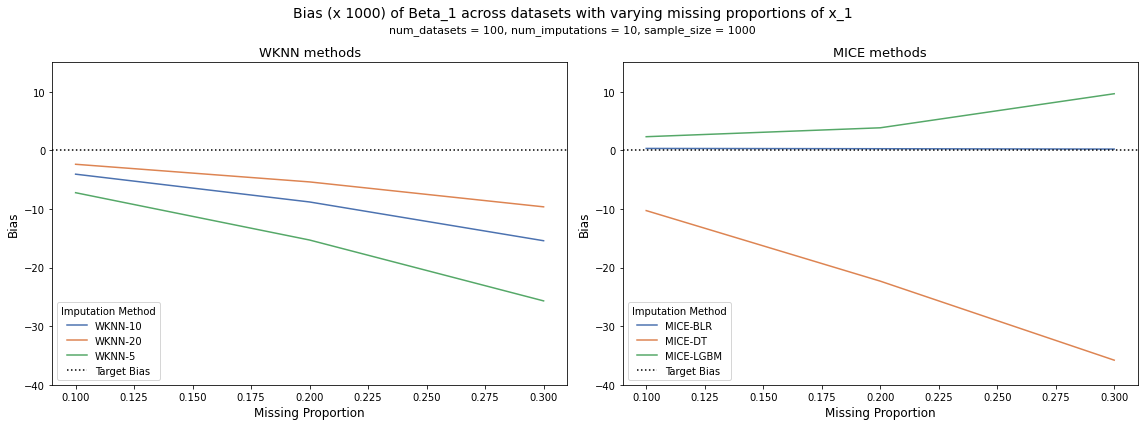

In [922]:
feature_dict = { 
    "Sample Size 1000 (10% Missing)": 0.1,
    "Sample Size 1000 (20% Missing)": 0.2,
    "Sample Size 1000 (30% Missing)": 0.3                
}
bias_1000 = bias_rescaled.iloc[:, [0, 7, 8, 9]]

bias_1000_knn = bias_1000.loc[knn_indices].reset_index()
bias_1000_knn = bias_1000_knn.drop(["index"], axis=1)
bias_1000_knn = bias_1000_knn.rename(columns=feature_dict)

bias_1000_mice = bias_1000.loc[mice_indices].reset_index() 
bias_1000_mice = bias_1000_mice.drop(["index"], axis=1)
bias_1000_mice = bias_1000_mice.rename(columns=feature_dict)

bias_1000_knn_long = bias_1000_knn.melt(id_vars=["Type"], var_name="Missingness", value_name="Bias")
bias_1000_mice_long = bias_1000_mice.melt(id_vars=["Type"], var_name="Missingness", value_name="Bias")

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Bias (x 1000) of Beta_1 across datasets with varying missing proportions of x_1", fontsize=14)
fig.text(0.5, 0.92, "num_datasets = 100, num_imputations = 10, sample_size = 1000", ha='center', fontsize=11)
sns.lineplot(data=bias_1000_knn_long, x="Missingness", y="Bias", hue="Type", ax=axs[0], palette="deep")
axs[0].set_title("WKNN methods", fontsize=13)
axs[0].set_xlabel("Missing Proportion", fontsize=12)
axs[0].set_ylabel("Bias", fontsize=12)
axs[0].axhline(
    y=0.00, color='black', linestyle=":", label='Target Bias'
)
axs[0].legend(loc="lower left", title="Imputation Method")
axs[0].set_ylim([-40, 15])
sns.lineplot(data=bias_1000_mice_long, x="Missingness", y="Bias", hue="Type", ax=axs[1], palette="deep")
axs[1].set_title("MICE methods", fontsize=13)
axs[1].set_xlabel("Missing Proportion", fontsize=12)
axs[1].set_ylabel("Bias", fontsize=12)
axs[1].axhline(
    y=0.00, color='black', linestyle=":", label='Target Bias'
)
axs[1].legend(loc="lower left", title="Imputation Method")
axs[1].set_ylim([-40, 15])
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

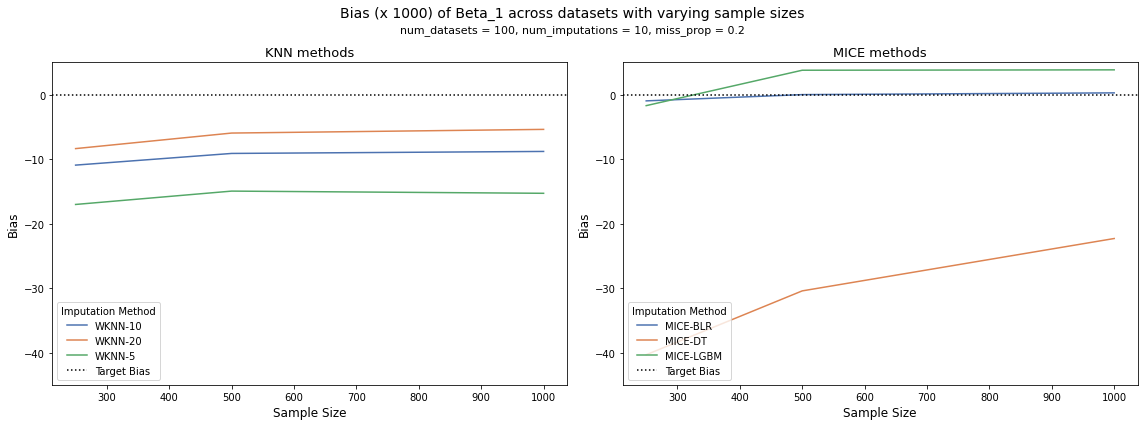

In [920]:
feature_dict = { 
    "Sample Size 250 (20% Missing)": 250,
    "Sample Size 500 (20% Missing)": 500,
    "Sample Size 1000 (20% Missing)": 1000                
}
bias_20 = bias_rescaled.iloc[:,[0, 2, 5, 8]]
bias_20 = bias_20.rename(columns=feature_dict)

bias_20_knn = bias_20.loc[knn_indices].reset_index()
bias_20_knn = bias_20_knn.drop(["index"], axis=1)
bias_20_knn = bias_20_knn.rename(columns=feature_dict)

bias_20_mice = bias_20.loc[mice_indices].reset_index() 
bias_20_mice = bias_20_mice.drop(["index"], axis=1)
bias_20_mice = bias_20_mice.rename(columns=feature_dict)

bias_20_knn_long = bias_20_knn.melt(id_vars=["Type"], var_name="Missingness", value_name="Bias")
bias_20_mice_long = bias_20_mice.melt(id_vars=["Type"], var_name="Missingness", value_name="Bias")

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
axs = axs.ravel()
fig.suptitle("Bias (x 1000) of Beta_1 across datasets with varying sample sizes", fontsize=14)
fig.text(0.5, 0.92, "num_datasets = 100, num_imputations = 10, miss_prop = 0.2", ha='center', fontsize=11)
sns.lineplot(data=bias_20_knn_long, x="Missingness", y="Bias", hue="Type", ax=axs[0], palette="deep")
axs[0].set_title("KNN methods", fontsize=13)
axs[0].set_xlabel("Sample Size", fontsize=12)
axs[0].set_ylabel("Bias", fontsize=12)
axs[0].axhline(
    y=0.00, color='black', linestyle=":", label='Target Bias'
)
axs[0].legend(loc="lower left", title="Imputation Method")
axs[0].set_ylim([-45, 5])
sns.lineplot(data=bias_20_mice_long, x="Missingness", y="Bias", hue="Type", ax=axs[1], palette="deep")
axs[1].set_title("MICE methods", fontsize=13)
axs[1].set_xlabel("Sample Size", fontsize=12)
axs[1].set_ylabel("Bias", fontsize=12)
axs[1].axhline(
    y=0.00, color='black', linestyle=":", label='Target Bias'
)
axs[1].legend(loc="lower left", title="Imputation Method")
axs[1].set_ylim([-45, 5])
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [911]:
bias_20_mice_long

,Type,Missingness,Bias
0,MICE-BLR,250,-0.98
1,MICE-DT,250,-40.34
2,MICE-LGBM,250,-1.72
3,MICE-BLR,500,-0.01
4,MICE-DT,500,-30.44
5,MICE-LGBM,500,3.77
6,MICE-BLR,1000,0.26
7,MICE-DT,1000,-22.32
8,MICE-LGBM,1000,3.83


In [212]:
bias_rescaled = 1000 * bias 
bias_rescaled["Type"] = bias["Type"]
bias_rescaled = bias_rescaled.round(2)

In [365]:
bias_rescaled

,Type,Sample Size 250 (10% Missing),Sample Size 250 (20% Missing),Sample Size 250 (30% Missing),Sample Size 500 (10% Missing),Sample Size 500 (20% Missing),Sample Size 500 (30% Missing),Sample Size 1000 (10% Missing),Sample Size 1000 (20% Missing),Sample Size 1000 (30% Missing)
0,MICE-BLR,-0.62,-0.98,-1.73,0.08,-0.01,-0.34,0.31,0.26,0.20
1,MICE-DT,-20.32,-40.34,-61.92,-13.93,-30.44,-48.79,-10.29,-22.32,-35.80
2,MICE-LGBM,-0.14,-1.72,-4.26,2.17,3.77,4.18,2.31,3.83,9.64
3,PMM5-BLR,-0.87,-1.66,-3.17,0.18,-0.21,-0.74,0.14,0.22,-0.02
4,PMM5-DT,-19.96,-40.14,-61.29,-13.93,-30.23,-47.92,-10.23,-22.10,-35.72
5,PMM5-LGBM,-0.31,-1.95,-4.90,2.25,3.71,4.02,2.22,3.84,9.59
6,WKNN-10,-5.25,-10.94,-17.41,-3.93,-9.13,-15.16,-4.08,-8.82,-15.43
7,WKNN-20,-4.17,-8.38,-14.01,-2.43,-5.97,-10.30,-2.39,-5.40,-9.65
8,WKNN-5,-7.97,-17.04,-26.50,-6.97,-14.97,-24.90,-7.24,-15.31,-25.69


In [243]:
mice_bias_rescaled_latex = bias_rescaled.to_latex(index=False)  # Set index=True if you want row indices included
print(mice_bias_rescaled_latex)

\begin{tabular}{lrrrrrrrrr}
\toprule
Type & Sample Size 250 (10% Missing) & Sample Size 250 (20% Missing) & Sample Size 250 (30% Missing) & Sample Size 500 (10% Missing) & Sample Size 500 (20% Missing) & Sample Size 500 (30% Missing) & Sample Size 1000 (10% Missing) & Sample Size 1000 (20% Missing) & Sample Size 1000 (30% Missing) \\
\midrule
MICE-BLR & -0.620000 & -0.980000 & -1.730000 & 0.080000 & -0.010000 & -0.340000 & 0.310000 & 0.260000 & 0.200000 \\
MICE-DT & -20.320000 & -40.340000 & -61.920000 & -13.930000 & -30.440000 & -48.790000 & -10.290000 & -22.320000 & -35.800000 \\
MICE-LGBM & -0.140000 & -1.720000 & -4.260000 & 2.170000 & 3.770000 & 4.180000 & 2.310000 & 3.830000 & 9.640000 \\
PMM5-BLR & -0.870000 & -1.660000 & -3.170000 & 0.180000 & -0.210000 & -0.740000 & 0.140000 & 0.220000 & -0.020000 \\
PMM5-DT & -19.960000 & -40.140000 & -61.290000 & -13.930000 & -30.230000 & -47.920000 & -10.230000 & -22.100000 & -35.720000 \\
PMM5-LGBM & -0.310000 & -1.950000 & -4.900000 & 2.2

##### MSE

In [818]:
mse = pd.concat([
        mse_250_10, mse_250_20, mse_250_30,
        mse_500_10, mse_500_20, mse_500_30, 
        mse_1000_10, mse_1000_20, mse_1000_30     
    ], axis=1
)
mse.columns = [
    "Sample Size 250 (10% Missing)", "Sample Size 250 (20% Missing)", "Sample Size 250 (30% Missing)",
    "Sample Size 500 (10% Missing)", "Sample Size 500 (20% Missing)", "Sample Size 500 (30% Missing)",
    "Sample Size 1000 (10% Missing)", "Sample Size 1000 (20% Missing)", "Sample Size 1000 (30% Missing)"
]
mse = mse.reset_index()

In [819]:
mse_rescaled = 1000 * mse 
mse_rescaled["Type"] = mse["Type"]
mse_rescaled = mse_rescaled.round(2)

In [820]:
mice_mse_rescaled_latex = mse_rescaled.to_latex(index=False)  # Set index=True if you want row indices included
print(mice_mse_rescaled_latex)

\begin{tabular}{lrrrrrrrrr}
\toprule
Type & Sample Size 250 (10% Missing) & Sample Size 250 (20% Missing) & Sample Size 250 (30% Missing) & Sample Size 500 (10% Missing) & Sample Size 500 (20% Missing) & Sample Size 500 (30% Missing) & Sample Size 1000 (10% Missing) & Sample Size 1000 (20% Missing) & Sample Size 1000 (30% Missing) \\
\midrule
MICE-BLR & 0.130000 & 0.130000 & 0.140000 & 0.070000 & 0.090000 & 0.080000 & 0.030000 & 0.040000 & 0.040000 \\
MICE-DT & 0.530000 & 1.770000 & 4.020000 & 0.270000 & 1.020000 & 2.470000 & 0.140000 & 0.540000 & 1.320000 \\
MICE-LGBM & 0.130000 & 0.170000 & 0.200000 & 0.080000 & 0.110000 & 0.110000 & 0.040000 & 0.050000 & 0.130000 \\
PMM5-BLR & 0.130000 & 0.130000 & 0.160000 & 0.070000 & 0.090000 & 0.090000 & 0.030000 & 0.040000 & 0.040000 \\
PMM5-DT & 0.540000 & 1.750000 & 3.940000 & 0.270000 & 1.010000 & 2.380000 & 0.130000 & 0.520000 & 1.310000 \\
PMM5-LGBM & 0.120000 & 0.170000 & 0.200000 & 0.080000 & 0.110000 & 0.110000 & 0.040000 & 0.050000 & 0

##### Coverage Probability

In [169]:
prob = pd.concat([
        prob_250_10, prob_250_20, prob_250_30,
        prob_500_10, prob_500_20, prob_500_30, 
        prob_1000_10, prob_1000_20, prob_1000_30     
    ], axis=1
)
prob.columns = [
    "Sample Size 250 (10% Missing)", "Sample Size 250 (20% Missing)", "Sample Size 250 (30% Missing)",
    "Sample Size 500 (10% Missing)", "Sample Size 500 (20% Missing)", "Sample Size 500 (30% Missing)",
    "Sample Size 1000 (10% Missing)", "Sample Size 1000 (20% Missing)", "Sample Size 1000 (30% Missing)"
]

In [244]:
mice_prob_latex = prob.to_latex(index=False)  # Set index=True if you want row indices included
print(mice_prob_latex)

\begin{tabular}{lrrrrrrrrr}
\toprule
Type & Sample Size 250 (10% Missing) & Sample Size 250 (20% Missing) & Sample Size 250 (30% Missing) & Sample Size 500 (10% Missing) & Sample Size 500 (20% Missing) & Sample Size 500 (30% Missing) & Sample Size 1000 (10% Missing) & Sample Size 1000 (20% Missing) & Sample Size 1000 (30% Missing) \\
\midrule
MICE-BLR & 0.990000 & 0.980000 & 0.980000 & 0.940000 & 0.940000 & 0.970000 & 0.980000 & 0.970000 & 0.960000 \\
MICE-DT & 0.770000 & 0.280000 & 0.040000 & 0.730000 & 0.150000 & 0.000000 & 0.710000 & 0.130000 & 0.000000 \\
MICE-LGBM & 0.980000 & 0.980000 & 0.950000 & 0.910000 & 0.910000 & 0.900000 & 0.960000 & 0.910000 & 0.660000 \\
PMM5-BLR & 0.960000 & 0.990000 & 0.970000 & 0.920000 & 0.930000 & 0.960000 & 0.970000 & 0.950000 & 0.940000 \\
PMM5-DT & 0.720000 & 0.330000 & 0.040000 & 0.730000 & 0.170000 & 0.000000 & 0.720000 & 0.090000 & 0.000000 \\
PMM5-LGBM & 0.990000 & 0.980000 & 0.970000 & 0.910000 & 0.910000 & 0.900000 & 0.960000 & 0.900000 & 0

### A comparison between true and predicted values

#### Sample Size 250

In [356]:
mse_250_linear = pd.DataFrame(mse_comparison_dict[250])
mse_250_linear = mse_250_linear.set_index("model_type")

#### Sample Size 500

In [357]:
mse_500_linear = pd.DataFrame(mse_comparison_dict[500])
mse_500_linear = mse_500_linear.set_index("model_type")

#### Sample Size 1000

In [358]:
mse_1000_linear = pd.DataFrame(mse_comparison_dict[1000])
mse_1000_linear = mse_1000_linear.set_index("model_type")

#### Summary

In [ ]:
ms

In [360]:
mse_summary = pd.concat([mse_250_linear, mse_500_linear, mse_1000_linear], axis=1)
mse_summary = mse_summary.reset_index()
mse_summary_rescaled = mse_summary * 1000
mse_summary_rescaled["model_type"] = mse_summary["model_type"]
mse_summary_rescaled = mse_summary_rescaled.round(2)

In [361]:
mse_summary_rescaled

,model_type,Missingness Percentage (10%),Missingness Percentage (20%),Missingness Percentage (30%),Missingness Percentage (10%),Missingness Percentage (20%),Missingness Percentage (30%),Missingness Percentage (10%),Missingness Percentage (20%),Missingness Percentage (30%)
0,WKNN-5,53.66,102.26,148.05,50.85,98.76,145.99,50.73,99.57,147.94
1,WKNN-10,49.94,95.00,138.64,46.63,91.78,136.17,46.44,91.61,137.18
2,WKNN-20,48.41,91.89,135.02,44.73,88.16,131.40,44.06,87.53,131.15
3,MICE-BLR,27.75,52.20,76.28,24.75,51.19,74.05,24.31,47.25,72.62
4,MICE-DT,64.01,121.42,173.72,54.20,104.61,156.16,44.64,91.18,138.28
5,MICE-LGBM,33.12,66.62,97.41,26.19,51.74,79.89,23.96,48.77,69.72
6,PMM5-BLR,29.20,54.11,79.46,25.68,50.66,75.67,24.65,48.87,72.56
7,PMM5-DT,63.43,118.43,171.18,54.55,104.05,156.98,45.45,91.21,136.43
8,PMM5-LGBM,33.78,66.05,99.32,26.38,52.13,79.43,23.97,48.22,70.05


In [362]:
mice_mse_u_latex = mse_summary_rescaled.to_latex(index=False)  # Set index=True if you want row indices included
print(mice_mse_u_latex)

\begin{tabular}{lrrrrrrrrr}
\toprule
model_type & Missingness Percentage (10%) & Missingness Percentage (20%) & Missingness Percentage (30%) & Missingness Percentage (10%) & Missingness Percentage (20%) & Missingness Percentage (30%) & Missingness Percentage (10%) & Missingness Percentage (20%) & Missingness Percentage (30%) \\
\midrule
WKNN-5 & 53.660000 & 102.260000 & 148.050000 & 50.850000 & 98.760000 & 145.990000 & 50.730000 & 99.570000 & 147.940000 \\
WKNN-10 & 49.940000 & 95.000000 & 138.640000 & 46.630000 & 91.780000 & 136.170000 & 46.440000 & 91.610000 & 137.180000 \\
WKNN-20 & 48.410000 & 91.890000 & 135.020000 & 44.730000 & 88.160000 & 131.400000 & 44.060000 & 87.530000 & 131.150000 \\
MICE-BLR & 27.750000 & 52.200000 & 76.280000 & 24.750000 & 51.190000 & 74.050000 & 24.310000 & 47.250000 & 72.620000 \\
MICE-DT & 64.010000 & 121.420000 & 173.720000 & 54.200000 & 104.610000 & 156.160000 & 44.640000 & 91.180000 & 138.280000 \\
MICE-LGBM & 33.120000 & 66.620000 & 97.410000 & 26.

### Execution Time

In [420]:
time_250 = pd.DataFrame(time_dict[250])
time_250["Size"] = np.array([250] * 9)
time_500 = pd.DataFrame(time_dict[500])
time_500["Size"] = np.array([500] * 9)
time_1000 = pd.DataFrame(time_dict[1000])
time_1000["Size"] = np.array([1000] * 9)

In [421]:
time_df = pd.concat([time_250, time_500, time_1000], axis=0).reset_index()
time_df = time_df.drop(["index"], axis=1)

In [422]:
time_list = []
for i in range(time_df.shape[0]): 
    if (i % 9 != 0 and i % 9 != 1 and i % 9 != 2):
        time_list.append(i)

In [423]:
new_time_df = time_df.loc[time_list].copy()
new_time_df = new_time_df.reset_index()
new_time_df = new_time_df.drop(["index"], axis=1)

In [424]:
new_time_df["Execution Time"] = np.log(new_time_df["Execution Time"])

In [425]:
blr_indices, ml_indices = [], []
for i in range(new_time_df.shape[0]):
    if (i % 3 == 0): 
        blr_indices.append(i)
    else: 
        ml_indices.append(i)

In [426]:
time_blr = new_time_df.loc[blr_indices]
time_blr = time_blr.reset_index() 
time_blr = time_blr.drop(["index"], axis=1)
time_ml = new_time_df.loc[ml_indices]
time_ml = time_ml.reset_index()
time_ml = time_ml.drop(["index"], axis=1)

In [432]:
time_blr = time_blr.rename(columns = {"model_type": "Model Type"})
time_ml = time_ml.rename(columns = {"model_type": "Model Type"})

In [884]:
new_time_df

,model_type,Execution Time,Size
0,MICE-BLR,3.573268,250
1,MICE-DT,2.478189,250
2,MICE-LGBM,3.875843,250
3,PMM5-BLR,4.995147,250
4,PMM5-DT,3.199869,250
5,PMM5-LGBM,4.194889,250
6,MICE-BLR,3.583214,500
7,MICE-DT,2.472378,500
8,MICE-LGBM,3.934750,500
9,PMM5-BLR,5.585612,500


In [892]:
line_styles = {
    'MICE-BLR': '',
    'MICE-DT': '',
    'MICE-LGBM': '',
    'PMM5-BLR': (2, 2),  # dotted
    'PMM5-DT': (2, 2),   
    'PMM5-LGBM': (2, 2)  # dotted
}
color_mapping = {
    'MICE-BLR': '#1f77b4',
    'PMM5-BLR': '#1f77b4',
    'MICE-DT': '#ff7f0e',
    'PMM5-DT': '#ff7f0e',
    'MICE-LGBM': '#2ca02c',
    'PMM5-LGBM': '#2ca02c'
}

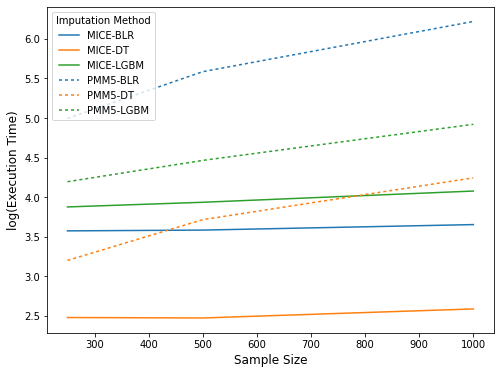

In [897]:
plt.figure(figsize=(8, 6))
sns.lineplot(
    data=new_time_df, x="Size", 
    y="Execution Time", hue="model_type", style="model_type", dashes=line_styles, palette=color_mapping
)
plt.xlabel("Sample Size", fontsize=12)
plt.ylabel("log(Execution Time)", fontsize=12)
plt.legend(title="Imputation Method", loc="upper left")
plt.show()

### A look at our two imputation frameworks

In [857]:
from knn import generate_KNN_results
from mice import generate_mice_results

##### Missing proportion

In [858]:
num_datasets = 101
miss_prop_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
sample_size = 1000
num_imputations = 10

probability_knn_lists, width_knn_lists = [], []
probability_reg_lists, width_reg_lists = [], []
probability_dt_lists, width_dt_lists = [], []
probability_lgb_lists, width_lgb_lists = [], []

for miss_prop in miss_prop_list: 
    
    print("Missing Proportion:", miss_prop)
    X_list, X_true_list, y_list, scale_list = generate_datasets(
        num_datasets, sample_size, miss_prop, "KNN", True
    )
    print("Imputing KNN results")
    _, _, _, cov_prob, width_list, _ = generate_KNN_results(
        X_list, X_true_list, y_list, scale_list, 20, linear_beta, True
    )
    probability_knn_lists.append(cov_prob[1])
    width_knn_lists.append(width_list)
    
    X_list, X_true_list, y_list, _ = generate_datasets(
        num_datasets, sample_size, miss_prop, "MICE", True
    )
    
    print("Imputing MICE-BLR results")
    _, _, _, cov_prob, width_list, _ = generate_mice_results(
        X_list, X_true_list, y_list, num_imputations, "regression", "blr", linear_beta, True
    )
    probability_reg_lists.append(cov_prob[1])
    width_reg_lists.append(width_list)
    
    print("Imputing MICE-DT results")
    _, _, _, cov_prob, width_list, _ = generate_mice_results(
        X_list, X_true_list, y_list, num_imputations, "regression", "dt", linear_beta, True
    )
    probability_dt_lists.append(cov_prob[1])
    width_dt_lists.append(width_list)
    
    print("Imputing MICE-LGB results")
    _, _, _, cov_prob, width_list, _ = generate_mice_results(
        X_list, X_true_list, y_list, num_imputations, "regression", "lgbm", linear_beta, True
    )
    probability_lgb_lists.append(cov_prob[1])
    width_lgb_lists.append(width_list)

Missing Proportion: 0.05
Imputing KNN results
Imputing MICE-BLR results
Imputing MICE-DT results
Imputing MICE-LGB results
Missing Proportion: 0.1
Imputing KNN results
Imputing MICE-BLR results
Imputing MICE-DT results
Imputing MICE-LGB results
Missing Proportion: 0.15
Imputing KNN results
Imputing MICE-BLR results
Imputing MICE-DT results
Imputing MICE-LGB results
Missing Proportion: 0.2
Imputing KNN results
Imputing MICE-BLR results
Imputing MICE-DT results
Imputing MICE-LGB results
Missing Proportion: 0.25
Imputing KNN results
Imputing MICE-BLR results
Imputing MICE-DT results
Imputing MICE-LGB results
Missing Proportion: 0.3
Imputing KNN results
Imputing MICE-BLR results
Imputing MICE-DT results
Imputing MICE-LGB results


In [859]:
miss_prop_fstack = []
for miss_prop in miss_prop_list: 
    miss_prop_fstack.extend([miss_prop] * (num_datasets - 1))
width_knn_fstack = np.array(width_knn_lists).flatten()
width_reg_fstack = np.array(width_reg_lists).flatten()
width_dt_fstack = np.array(width_dt_lists).flatten() 
width_lgb_fstack = np.array(width_lgb_lists).flatten() 
miss_prop_change_dict = {
    "Miss Prop": miss_prop_fstack, 
    "Width_KNN": width_knn_fstack, 
    "Width_BLR": width_reg_fstack,
    "Width_DT": width_dt_fstack, 
    "Width_LGB": width_lgb_fstack
}
miss_prop_change_df = pd.DataFrame(miss_prop_change_dict)

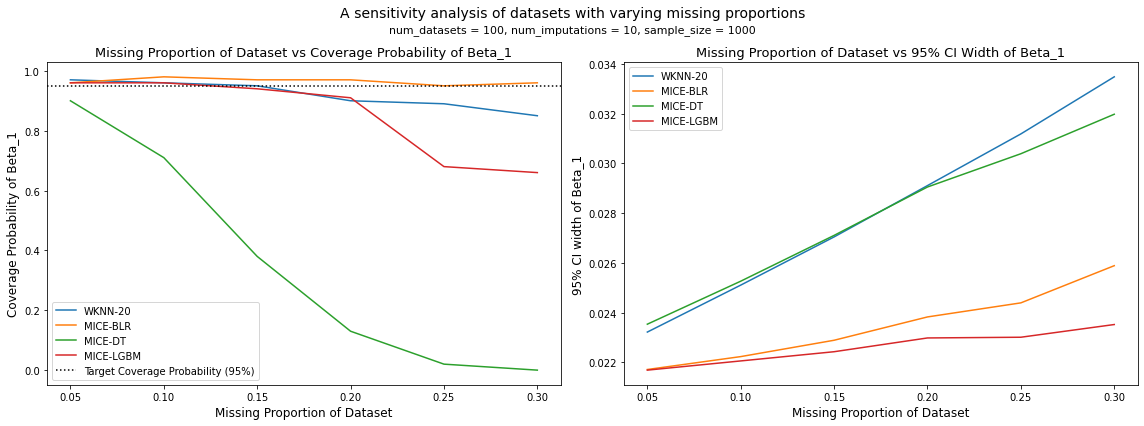

In [932]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("A sensitivity analysis of datasets with varying missing proportions", fontsize=14)
fig.text(0.5, 0.92, "num_datasets = 100, num_imputations = 10, sample_size = 1000", ha='center', fontsize=11)
sns.lineplot(x=miss_prop_list, y=probability_knn_lists, ax=axs[0],  label="WKNN-20")
sns.lineplot(x=miss_prop_list, y=probability_reg_lists, ax=axs[0], label="MICE-BLR")
sns.lineplot(x=miss_prop_list, y=probability_dt_lists, ax=axs[0], label="MICE-DT")
sns.lineplot(x=miss_prop_list, y=probability_lgb_lists, ax=axs[0], label="MICE-LGBM")
axs[0].axhline(
    y=0.95, color='black', linestyle=":", label='Target Coverage Probability (95%)'
)
axs[0].legend(loc='lower left')
axs[0].set_xlabel("Missing Proportion of Dataset", fontsize=12)
axs[0].set_ylabel("Coverage Probability of Beta_1", fontsize=12)
axs[0].set_title("Missing Proportion of Dataset vs Coverage Probability of Beta_1", fontsize=13)
sns.lineplot(data=miss_prop_change_df, x="Miss Prop", y="Width_KNN", ax=axs[1], label="WKNN-20", errorbar=None)
sns.lineplot(data=miss_prop_change_df, x="Miss Prop", y="Width_BLR", ax=axs[1], label="MICE-BLR", errorbar=None)
sns.lineplot(data=miss_prop_change_df, x="Miss Prop", y="Width_DT", ax=axs[1], label="MICE-DT", errorbar=None)
sns.lineplot(data=miss_prop_change_df, x= "Miss Prop", y="Width_LGB", ax=axs[1], label="MICE-LGBM", errorbar=None)
axs[1].set_xlabel("Missing Proportion of Dataset", fontsize=12)
axs[1].set_ylabel("95% CI width of Beta_1", fontsize=12)
axs[1].set_title("Missing Proportion of Dataset vs 95% CI Width of Beta_1", fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

##### Sample Size

In [860]:
num_datasets = 101
miss_prop = 0.2
sample_size_list = [125, 250, 375, 500, 625, 750, 875, 1000]
num_imputations = 10

probability_knn_lists_one, width_knn_lists_one = [], []
probability_reg_lists_one, width_reg_lists_one = [], []
probability_dt_lists_one, width_dt_lists_one = [], []
probability_lgb_lists_one, width_lgb_lists_one = [], []

for sample_size in sample_size_list: 
    
    print("Sample size:", sample_size)
    X_list, X_true_list, y_list, scale_list = generate_datasets(
        num_datasets, sample_size, miss_prop, "KNN", True
    )
    print("Imputing KNN results")
    _, _, _, cov_prob, width_list, _ = generate_KNN_results(
        X_list, X_true_list, y_list, scaler_list, 20, linear_beta, True
    )
    probability_knn_lists_one.append(cov_prob[1])
    width_knn_lists_one.append(width_list)
    
    X_list, X_true_list, y_list, _ = generate_datasets(
        num_datasets, sample_size, miss_prop, "MICE", True
    )
    
    print("Imputing MICE-BLR results")
    _, _, _, cov_prob, width_list, _ = generate_mice_results(
        X_list, X_true_list, y_list, num_imputations, "regression", "blr", linear_beta, True
    )
    probability_reg_lists_one.append(cov_prob[1])
    width_reg_lists_one.append(width_list)
    
    print("Imputing MICE-DT results")
    _, _, _, cov_prob, width_list, _ = generate_mice_results(
        X_list, X_true_list, y_list, num_imputations, "regression", "dt", linear_beta, True
    )
    probability_dt_lists_one.append(cov_prob[1])
    width_dt_lists_one.append(width_list)
    
    print("Imputing MICE-LGBM results")
    _, _, _, cov_prob, width_list, _ = generate_mice_results(
        X_list, X_true_list, y_list, num_imputations, "regression", "lgbm", linear_beta, True
    )
    probability_lgb_lists_one.append(cov_prob[1])
    width_lgb_lists_one.append(width_list)

Sample size: 125
Imputing KNN results
Imputing MICE-BLR results
Imputing MICE-DT results
Imputing MICE-LGBM results
Sample size: 250
Imputing KNN results
Imputing MICE-BLR results
Imputing MICE-DT results
Imputing MICE-LGBM results
Sample size: 375
Imputing KNN results
Imputing MICE-BLR results
Imputing MICE-DT results
Imputing MICE-LGBM results
Sample size: 500
Imputing KNN results
Imputing MICE-BLR results
Imputing MICE-DT results
Imputing MICE-LGBM results
Sample size: 625
Imputing KNN results
Imputing MICE-BLR results
Imputing MICE-DT results
Imputing MICE-LGBM results
Sample size: 750
Imputing KNN results
Imputing MICE-BLR results
Imputing MICE-DT results
Imputing MICE-LGBM results
Sample size: 875
Imputing KNN results
Imputing MICE-BLR results
Imputing MICE-DT results
Imputing MICE-LGBM results
Sample size: 1000
Imputing KNN results
Imputing MICE-BLR results
Imputing MICE-DT results
Imputing MICE-LGBM results


In [933]:
size_fstack = []
for size in sample_size_list: 
    size_fstack.extend([size] * (num_datasets - 1))
width_knn_fstack = np.array(width_knn_lists_one).flatten()
width_reg_fstack = np.array(width_reg_lists_one).flatten()
width_dt_fstack = np.array(width_dt_lists_one).flatten() 
width_lgb_fstack = np.array(width_lgb_lists_one).flatten()
size_change_dict = {
    "Sample Size": size_fstack, 
    "Width_KNN": width_knn_fstack, 
    "Width_BLR": width_reg_fstack,
    "Width_DT": width_dt_fstack, 
    "Width_LGB": width_lgb_fstack
}
size_change_df = pd.DataFrame(size_change_dict)

#### Summary

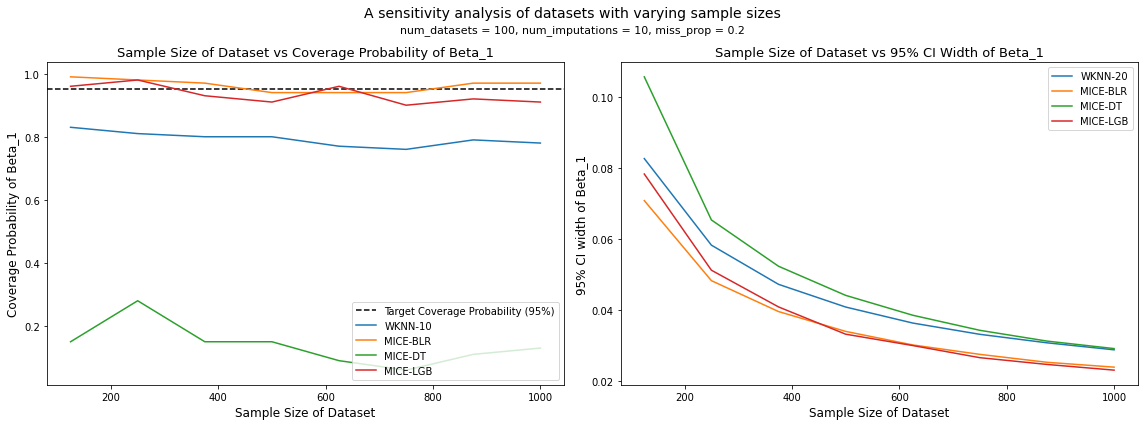

In [935]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("A sensitivity analysis of datasets with varying sample sizes", fontsize=14)
fig.text(0.5, 0.92, "num_datasets = 100, num_imputations = 10, miss_prop = 0.2", ha='center', fontsize=11)
axs[0].axhline(
    y=0.95, color='black', linestyle="--", label='Target Coverage Probability (95%)'
)
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False)
sns.lineplot(x=sample_size_list, y=probability_knn_lists_one, ax=axs[0], label="WKNN-10")
sns.lineplot(x=sample_size_list, y=probability_reg_lists_one, ax=axs[0], label="MICE-BLR")
sns.lineplot(x=sample_size_list, y=probability_dt_lists_one, ax=axs[0], label="MICE-DT")
sns.lineplot(x=sample_size_list, y=probability_lgb_lists_one, ax=axs[0], label="MICE-LGB")
axs[0].legend(loc='lower right')
axs[0].set_xlabel("Sample Size of Dataset", fontsize=12)
axs[0].set_ylabel("Coverage Probability of Beta_1", fontsize=12)
axs[0].set_title("Sample Size of Dataset vs Coverage Probability of Beta_1", fontsize=13)
sns.lineplot(data=size_change_df, x="Sample Size", y="Width_KNN", ax=axs[1], label="WKNN-20", errorbar=None)
sns.lineplot(data=size_change_df, x="Sample Size", y="Width_BLR", ax=axs[1], label="MICE-BLR", errorbar=None)
sns.lineplot(data=size_change_df, x="Sample Size", y="Width_DT", ax=axs[1], label="MICE-DT", errorbar=None)
sns.lineplot(data=size_change_df, x= "Sample Size", y="Width_LGB", ax=axs[1], label="MICE-LGB", errorbar=None)
axs[1].set_xlabel("Sample Size of Dataset", fontsize=12)
axs[1].set_ylabel("95% CI width of Beta_1", fontsize=12)
axs[1].set_title("Sample Size of Dataset vs 95% CI Width of Beta_1", fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

##### Number of Imputations

In [189]:
num_datasets = 100
miss_prop = 0.2
sample_size = 1000
num_imputations_list = [5, 10, 15, 20, 25, 30]

probability_reg_lists, width_reg_lists = [], []
probability_dt_lists, width_dt_lists = [], []
probability_lgb_lists, width_lgb_lists = [], []

for num_imputations in num_imputations_list: 
    
    print("Number of Imputations:", num_imputations)
    
    X_list, X_true_list, y_list, _ = generate_datasets(
        num_datasets, sample_size, miss_prop, "MICE", True
    )
    
    print("Imputing MICE-BLR results")
    _, _, _, cov_prob, width_list, _ = generate_mice_results(
        X_list, X_true_list, y_list, num_imputations, "regression", "blr", linear_beta, True
    )
    probability_reg_lists.append(cov_prob[1])
    width_reg_lists.append(width_list)
    
    print("Imputing MICE-DT results")
    _, _, _, cov_prob, width_list, _ = generate_mice_results(
        X_list, X_true_list, y_list, num_imputations, "regression", "dt", linear_beta, True
    )
    probability_dt_lists.append(cov_prob[1])
    width_dt_lists.append(width_list)
    
    print("Imputing MICE-LGBM results")
    _, _, _, cov_prob, width_list, _ = generate_mice_results(
        X_list, X_true_list, y_list, num_imputations, "regression", "lgbm", linear_beta, True
    )
    probability_lgb_lists.append(cov_prob[1])
    width_lgb_lists.append(width_list)

Number of Imputations: 5
Imputing MICE-BLR results
Imputing MICE-DT results
Imputing MICE-LGBM results
Number of Imputations: 10
Imputing MICE-BLR results
Imputing MICE-DT results
Imputing MICE-LGBM results
Number of Imputations: 15
Imputing MICE-BLR results
Imputing MICE-DT results
Imputing MICE-LGBM results
Number of Imputations: 20
Imputing MICE-BLR results
Imputing MICE-DT results
Imputing MICE-LGBM results
Number of Imputations: 25
Imputing MICE-BLR results
Imputing MICE-DT results
Imputing MICE-LGBM results
Number of Imputations: 30
Imputing MICE-BLR results
Imputing MICE-DT results
Imputing MICE-LGBM results


In [190]:
imputation_fstack = []
for num_imputations in num_imputations_list: 
    imputation_fstack.extend([num_imputations] * num_datasets)
width_knn_fstack = np.array(width_knn_lists).flatten()
width_reg_fstack = np.array(width_reg_lists).flatten()
width_dt_fstack = np.array(width_dt_lists).flatten() 
width_lgb_fstack = np.array(width_lgb_lists).flatten()
imputation_change_dict = {
    "Number of Imputations": imputation_fstack, 
    "Width_BLR": width_reg_fstack,
    "Width_DT": width_dt_fstack, 
    "Width_LGB": width_lgb_fstack
}
imputation_change_df = pd.DataFrame(imputation_change_dict)

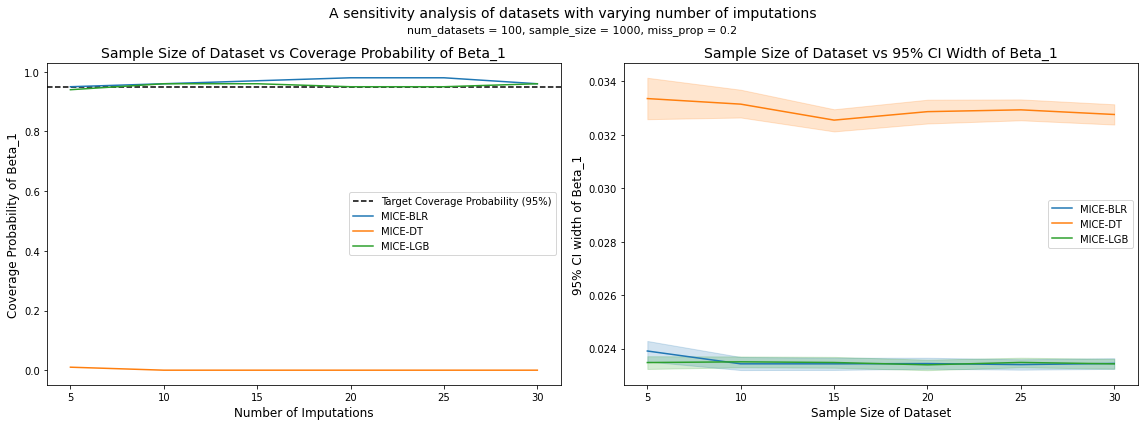

In [192]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("A sensitivity analysis of datasets with varying number of imputations", fontsize=14)
fig.text(0.5, 0.92, "num_datasets = 100, sample_size = 1000, miss_prop = 0.2", ha='center', fontsize=11)
axs[0].axhline(
    y=0.95, color='black', linestyle="--", label='Target Coverage Probability (95%)'
)
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False)
sns.lineplot(x=num_imputations_list, y=probability_reg_lists, ax=axs[0], label="MICE-BLR")
sns.lineplot(x=num_imputations_list, y=probability_dt_lists, ax=axs[0], label="MICE-DT")
sns.lineplot(x=num_imputations_list, y=probability_lgb_lists, ax=axs[0], label="MICE-LGB")
axs[0].legend(loc='center right')
axs[0].set_xlabel("Number of Imputations", fontsize=12)
axs[0].set_ylabel("Coverage Probability of Beta_1", fontsize=12)
axs[0].set_title("Sample Size of Dataset vs Coverage Probability of Beta_1", fontsize=14)
sns.lineplot(data=imputation_change_df, x="Number of Imputations", y="Width_BLR", ax=axs[1], label="MICE-BLR")
sns.lineplot(data=imputation_change_df, x="Number of Imputations", y="Width_DT", ax=axs[1], label="MICE-DT")
sns.lineplot(data=imputation_change_df, x="Number of Imputations", y="Width_LGB", ax=axs[1], label="MICE-LGB")
axs[1].set_xlabel("Sample Size of Dataset", fontsize=12)
axs[1].set_ylabel("95% CI width of Beta_1", fontsize=12)
axs[1].set_title("Sample Size of Dataset vs 95% CI Width of Beta_1", fontsize=14)
axs[1].legend(loc="center right")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## Dealing with non-linear relationships

### Regression Coefficient Analysis

In [409]:
mse_comparison_dict_nl = {}
sample_sizes = [250, 500, 1000]
model_type_list = [
    "WKNN-5", "WKNN-10", "WKNN-20", 
    "MICE-BLR", "MICE-DT", "MICE-LGBM",
    "PMM3-BLR", "PMM3-DT", "PMM3-LGBM",
    "PMM5-BLR", "PMM5-DT", "PMM5-LGBM", 
    "PMM10-BLR", "PMM10-DT", "PMM10-LGBM"
]

for sample_size in sample_sizes: 
    mse_comparison_dict_nl[sample_size] = {}
    mse_comparison_dict_nl[sample_size]["model_type"] = model_type_list

#### Sample Size 250

##### 10 Percent Missing

In [410]:
from knn import get_KNN_results_df
from mice import get_MICE_results_df

In [416]:
X_list, X_true_list, y_list, scaler_list = generate_datasets(
    101, 250, 0.1, "KNN", False
)

full_beta = non_linear_beta

knn_df_list, knn_mse_list, _ = get_KNN_results_df(
    X_list, X_true_list, y_list, scaler_list, full_beta, False
)

Imputing WKNN models
Imputing WKNN-5
Imputing WKNN-10
Imputing WKNN-20
Creating results dataframe


In [417]:
X_list, X_true_list, y_list, _ = generate_datasets(
    101, 250, 0.1, "MICE", False
)

mice_df_list, mice_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "regression", False
)

Imputing MICE models
Imputing MICE-BLR
Imputing MICE-DT
Imputing MICE-LGB
Creating results dataframe


In [418]:
pmm3_df_list, pmm3_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "pmm3", False
)
pmm5_df_list, pmm5_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "pmm5", False
)
pmm10_df_list, pmm10_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "pmm10", False
)

Imputing PMM3 models
Imputing PMM3-BLR
Imputing PMM3-DT
Imputing PMM3-LGB
Creating results dataframe
Imputing PMM5 models
Imputing PMM5-BLR
Imputing PMM5-DT
Imputing PMM5-LGB
Creating results dataframe
Imputing PMM10 models
Imputing PMM10-BLR
Imputing PMM10-DT
Imputing PMM10-LGB
Creating results dataframe


In [419]:
combined_250_10_df_nl = []
for df in knn_df_list: 
    combined_250_10_df_nl.append(df)
for df in mice_df_list: 
    combined_250_10_df_nl.append(df)
for df in pmm3_df_list: 
    combined_250_10_df_nl.append(df)
for df in pmm5_df_list: 
    combined_250_10_df_nl.append(df)
for df in pmm10_df_list: 
    combined_250_10_df_nl.append(df)

stat_250_10_df_nl = summary_data(combined_250_10_df_nl, False)
stat_250_10_df_nl

Beta_0                                 Beta_1            \
                Bias       Var       MSE Cov Prob      Bias       Var   
Type                                                                    
MICE-BLR   -0.007817  0.014319  0.014237     0.98 -0.004920  0.000145   
MICE-DT    -0.110324  0.016070  0.028080     0.89 -0.022595  0.000165   
MICE-LGBM   0.009161  0.017011  0.016925     0.93 -0.000603  0.000155   
PMM10-BLR  -0.030780  0.014175  0.014980     0.97 -0.005692  0.000159   
PMM10-DT   -0.114759  0.017426  0.030422     0.88 -0.022504  0.000158   
PMM10-LGBM -0.003822  0.017239  0.017081     0.93 -0.001636  0.000162   
PMM3-BLR   -0.013681  0.013997  0.014044     1.00 -0.004521  0.000146   
PMM3-DT    -0.112147  0.016622  0.029032     0.89 -0.022462  0.000159   
PMM3-LGBM   0.007112  0.016981  0.016862     0.93 -0.000657  0.000154   
PMM5-BLR   -0.018753  0.014700  0.014904     0.98 -0.004863  0.000158   
PMM5-DT    -0.107986  0.016419  0.027915     0.88 -0.021823  0.000165   
PMM5-LGBM   0.005723  0.016663  0.016529     0.94 -0.000819  0.000150   
WKNN-10    -0.039093  0.016631  0.017993     0.96 -0.006741  0.000176   
WKNN-20    -0.037012  0.017093  0.018292     0.93 -0.006068  0.000183   
WKNN-5     -0.057396  0.016993  0.020117     0.96 -0.009601  0.000179   

                                 Beta_2                                       \
                 MSE Cov Prob      Bias           Var           MSE Cov Prob   
Type                                                                           
MICE-BLR    0.000167     0.97 -0.000771  7.561532e-07  1.343725e-06     0.88   
MICE-DT     0.000673     0.75 -0.000237  5.569711e-07  6.073878e-07     0.95   
MICE-LGBM   0.000154     0.97  0.000035  5.628329e-07  5.584024e-07     0.92   
PMM10-BLR   0.000189     0.97 -0.000361  4.799999e-07  6.054330e-07     0.95   
PMM10-DT    0.000663     0.79 -0.000149  5.390223e-07  5.558417e-07     0.96   
PMM10-LGBM  0.000163     0.95  0.000077  5.522648e-07  5.527398e-07     0.95   
PMM3-BLR    0.000165     0.97 -0.000541  4.966937e-07  7.845349e-07     0.94   
PMM3-DT     0.000662     0.78 -0.000202  5.496959e-07  5.851259e-07     0.96   
PMM3-LGBM   0.000153     0.97  0.000049  5.616858e-07  5.584398e-07     0.93   
PMM5-BLR    0.000180     0.95 -0.000429  4.803791e-07  6.598204e-07     0.96   
PMM5-DT     0.000639     0.76 -0.000182  5.432476e-07  5.710602e-07     0.95   
PMM5-LGBM   0.000149     0.97  0.000054  5.679791e-07  5.652181e-07     0.92   
WKNN-10     0.000220     0.94  0.000053  5.791064e-07  5.761722e-07     0.95   
WKNN-20     0.000218     0.94  0.000110  5.682644e-07  5.747192e-07     0.97   
WKNN-5      0.000269     0.90 -0.000012  5.769831e-07  5.713686e-07     0.95   

              Beta_3                                 Beta_4            \
                Bias       Var       MSE Cov Prob      Bias       Var   
Type                                                                    
MICE-BLR    0.003567  0.000164  0.000175     0.97  0.003372  0.000576   
MICE-DT     0.022267  0.000198  0.000692     0.70 -0.001290  0.000721   
MICE-LGBM   0.003589  0.000163  0.000174     0.95 -0.004993  0.000654   
PMM10-BLR   0.004481  0.000158  0.000176     0.97  0.004683  0.000527   
PMM10-DT    0.022407  0.000196  0.000696     0.71 -0.001026  0.000754   
PMM10-LGBM  0.004666  0.000169  0.000189     0.95 -0.003802  0.000656   
PMM3-BLR    0.003230  0.000148  0.000157     0.97  0.003536  0.000544   
PMM3-DT     0.022089  0.000186  0.000672     0.72 -0.001064  0.000738   
PMM3-LGBM   0.003619  0.000163  0.000174     0.95 -0.004679  0.000656   
PMM5-BLR    0.003691  0.000155  0.000167     0.97  0.003589  0.000570   
PMM5-DT     0.021859  0.000199  0.000675     0.73 -0.001565  0.000717   
PMM5-LGBM   0.003821  0.000160  0.000173     0.95 -0.004626  0.000649   
WKNN-10     0.007812  0.000209  0.000268     0.91  0.000273  0.000683   
WKNN-20     0.008419  0.000215  0.000284     0.90 -0.001003  0.000678   
WKNN-5      0.009

In [434]:
bias_250_10_1 = stat_250_10_df_nl["Beta_1"]["Bias"]
mse_250_10_1 = stat_250_10_df_nl["Beta_1"]["MSE"]
prob_250_10_1 = stat_250_10_df_nl["Beta_1"]["Cov Prob"]

bias_250_10_2 = stat_250_10_df_nl["Beta_2"]["Bias"]
mse_250_10_2 = stat_250_10_df_nl["Beta_2"]["MSE"]
prob_250_10_2 = stat_250_10_df_nl["Beta_2"]["Cov Prob"]

In [435]:
mse_10_size250_nl = np.hstack([
    knn_mse_list, mice_mse_list, pmm3_mse_list, pmm5_mse_list, pmm10_mse_list
])
mse_comparison_dict_nl[250]["Missingness Percentage (10%)"] = mse_10_size250_nl

##### 20 Percent Missing

In [437]:
X_list, X_true_list, y_list, scaler_list = generate_datasets(
    101, 250, 0.2, "KNN", False
)

full_beta = non_linear_beta

knn_df_list, knn_mse_list, _ = get_KNN_results_df(
    X_list, X_true_list, y_list, scaler_list, full_beta, False
)

Imputing WKNN models
Imputing WKNN-5
Imputing WKNN-10
Imputing WKNN-20
Creating results dataframe


In [438]:
X_list, X_true_list, y_list, _ = generate_datasets(
    101, 250, 0.2, "MICE", False
)

mice_df_list, mice_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "regression", False
)

Imputing MICE models
Imputing MICE-BLR
Imputing MICE-DT
Imputing MICE-LGB
Creating results dataframe


In [439]:
pmm3_df_list, pmm3_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "pmm3", False
)
pmm5_df_list, pmm5_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "pmm5", False
)
pmm10_df_list, pmm10_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "pmm10", False
)

Imputing PMM3 models
Imputing PMM3-BLR
Imputing PMM3-DT
Imputing PMM3-LGB
Creating results dataframe
Imputing PMM5 models
Imputing PMM5-BLR
Imputing PMM5-DT
Imputing PMM5-LGB
Creating results dataframe
Imputing PMM10 models
Imputing PMM10-BLR
Imputing PMM10-DT
Imputing PMM10-LGB
Creating results dataframe


In [440]:
combined_250_20_df_nl = []
for df in knn_df_list: 
    combined_250_20_df_nl.append(df)
for df in mice_df_list: 
    combined_250_20_df_nl.append(df)
for df in pmm3_df_list: 
    combined_250_20_df_nl.append(df)
for df in pmm5_df_list: 
    combined_250_20_df_nl.append(df)
for df in pmm10_df_list: 
    combined_250_20_df_nl.append(df)

stat_250_20_df_nl = summary_data(combined_250_20_df_nl, False)
stat_250_20_df_nl

Beta_0                                 Beta_1            \
                Bias       Var       MSE Cov Prob      Bias       Var   
Type                                                                    
MICE-BLR   -0.016184  0.016851  0.016944     1.00 -0.009974  0.000180   
MICE-DT    -0.212057  0.020976  0.065735     0.78 -0.044056  0.000175   
MICE-LGBM   0.020480  0.020991  0.021201     0.92 -0.001929  0.000205   
PMM10-BLR  -0.067860  0.018535  0.022955     0.94 -0.012574  0.000198   
PMM10-DT   -0.235232  0.022202  0.077315     0.72 -0.045428  0.000202   
PMM10-LGBM -0.005833  0.021240  0.021061     0.92 -0.004232  0.000213   
PMM3-BLR   -0.030723  0.016207  0.016988     0.99 -0.009822  0.000167   
PMM3-DT    -0.216133  0.022279  0.068769     0.75 -0.043909  0.000185   
PMM3-LGBM   0.017394  0.021166  0.021257     0.93 -0.002213  0.000204   
PMM5-BLR   -0.038154  0.016525  0.017816     0.98 -0.010329  0.000180   
PMM5-DT    -0.220413  0.022619  0.070975     0.75 -0.044348  0.000180   
PMM5-LGBM   0.013048  0.020885  0.020847     0.92 -0.002515  0.000204   
WKNN-10    -0.078231  0.022852  0.028744     0.88 -0.014235  0.000235   
WKNN-20    -0.071096  0.024102  0.028916     0.91 -0.012475  0.000247   
WKNN-5     -0.117014  0.022702  0.036167     0.86 -0.020605  0.000243   

                                 Beta_2                                       \
                 MSE Cov Prob      Bias           Var           MSE Cov Prob   
Type                                                                           
MICE-BLR    0.000278     0.94 -0.001482  9.213696e-07  3.109017e-06     0.75   
MICE-DT     0.002115     0.27 -0.000490  7.526404e-07  9.848813e-07     0.99   
MICE-LGBM   0.000207     0.95  0.000043  8.425436e-07  8.359982e-07     0.92   
PMM10-BLR   0.000354     0.91 -0.000636  6.661516e-07  1.063938e-06     0.96   
PMM10-DT    0.002264     0.31 -0.000322  7.030768e-07  7.996751e-07     0.99   
PMM10-LGBM  0.000229     0.97  0.000131  7.304673e-07  7.404524e-07     0.94   
PMM3-BLR    0.000262     0.96 -0.000966  6.138659e-07  1.540600e-06     0.90   
PMM3-DT     0.002111     0.30 -0.000391  7.410575e-07  8.868140e-07     0.98   
PMM3-LGBM   0.000207     0.96  0.000063  8.468783e-07  8.424376e-07     0.91   
PMM5-BLR    0.000284     0.94 -0.000853  5.145945e-07  1.236951e-06     0.95   
PMM5-DT     0.002145     0.29 -0.000358  7.316551e-07  8.523083e-07     0.99   
PMM5-LGBM   0.000209     0.97  0.000079  8.237205e-07  8.216998e-07     0.92   
WKNN-10     0.000435     0.91  0.000072  7.889152e-07  7.861641e-07     0.97   
WKNN-20     0.000400     0.93  0.000197  7.581491e-07  7.894698e-07     0.96   
WKNN-5      0.000666     0.78 -0.000083  7.887516e-07  7.877464e-07     0.98   

              Beta_3                                 Beta_4            \
                Bias       Var       MSE Cov Prob      Bias       Var   
Type                                                                    
MICE-BLR    0.006627  0.000182  0.000224     0.96  0.006537  0.000761   
MICE-DT     0.041720  0.000267  0.002005     0.40 -0.001694  0.001195   
MICE-LGBM   0.007719  0.000258  0.000315     0.87 -0.011436  0.000942   
PMM10-BLR   0.010374  0.000201  0.000307     0.95  0.008422  0.000688   
PMM10-DT    0.042818  0.000275  0.002105     0.40  0.000823  0.001180   
PMM10-LGBM  0.010102  0.000269  0.000369     0.83 -0.009216  0.000960   
PMM3-BLR    0.006666  0.000175  0.000218     0.95  0.006756  0.000676   
PMM3-DT     0.041506  0.000262  0.001982     0.42 -0.001295  0.001223   
PMM3-LGBM   0.008145  0.000253  0.000317     0.86 -0.011425  0.000931   
PMM5-BLR    0.007771  0.000190  0.000248     0.95  0.006361  0.000682   
PMM5-DT     0.042012  0.000264  0.002026     0.43 -0.001072  0.001213   
PMM5-LGBM   0.008402  0.000257  0.000325     0.85 -0.010910  0.000941   
WKNN-10     0.015382  0.000286  0.000519     0.85  0.000473  0.001012   
WKNN-20     0.016538  0.000294  0.000564     0.83 -0.002608  0.001005   
WKNN-5      0.018

In [441]:
bias_250_20_1 = stat_250_20_df_nl["Beta_1"]["Bias"]
mse_250_20_1 = stat_250_20_df_nl["Beta_1"]["MSE"]
prob_250_20_1 = stat_250_20_df_nl["Beta_1"]["Cov Prob"]

bias_250_20_2 = stat_250_20_df_nl["Beta_2"]["Bias"]
mse_250_20_2 = stat_250_20_df_nl["Beta_2"]["MSE"]
prob_250_20_2 = stat_250_20_df_nl["Beta_2"]["Cov Prob"]

In [442]:
mse_20_size250_nl = np.hstack([
    knn_mse_list, mice_mse_list, pmm3_mse_list, pmm5_mse_list, pmm10_mse_list
])
mse_comparison_dict_nl[250]["Missingness Percentage (20%)"] = mse_20_size250_nl

##### 30 Percent Missing

In [443]:
X_list, X_true_list, y_list, scaler_list = generate_datasets(
    101, 250, 0.3, "KNN", False
)

full_beta = non_linear_beta

knn_df_list, knn_mse_list, _ = get_KNN_results_df(
    X_list, X_true_list, y_list, scaler_list, full_beta, False
)

Imputing WKNN models
Imputing WKNN-5
Imputing WKNN-10
Imputing WKNN-20
Creating results dataframe


In [444]:
X_list, X_true_list, y_list, _ = generate_datasets(
    101, 250, 0.3, "MICE", False
)

mice_df_list, mice_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "regression", False
)

Imputing MICE models
Imputing MICE-BLR
Imputing MICE-DT
Imputing MICE-LGB
Creating results dataframe


In [445]:
pmm3_df_list, pmm3_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "pmm3", False
)
pmm5_df_list, pmm5_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "pmm5", False
)
pmm10_df_list, pmm10_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "pmm10", False
)

Imputing PMM3 models
Imputing PMM3-BLR
Imputing PMM3-DT
Imputing PMM3-LGB
Creating results dataframe
Imputing PMM5 models
Imputing PMM5-BLR
Imputing PMM5-DT
Imputing PMM5-LGB
Creating results dataframe
Imputing PMM10 models
Imputing PMM10-BLR
Imputing PMM10-DT
Imputing PMM10-LGB
Creating results dataframe


In [446]:
combined_250_30_df_nl = []
for df in knn_df_list: 
    combined_250_30_df_nl.append(df)
for df in mice_df_list: 
    combined_250_30_df_nl.append(df)
for df in pmm3_df_list: 
    combined_250_30_df_nl.append(df)
for df in pmm5_df_list: 
    combined_250_30_df_nl.append(df)
for df in pmm10_df_list: 
    combined_250_30_df_nl.append(df)

stat_250_30_df_nl = summary_data(combined_250_30_df_nl, False)
stat_250_30_df_nl

Beta_0                                 Beta_1            \
                Bias       Var       MSE Cov Prob      Bias       Var   
Type                                                                    
MICE-BLR   -0.024843  0.018089  0.018525     0.99 -0.015247  0.000220   
MICE-DT    -0.337869  0.030611  0.144461     0.57 -0.068752  0.000312   
MICE-LGBM   0.028791  0.031164  0.031681     0.89 -0.004851  0.000291   
PMM10-BLR  -0.129872  0.022295  0.038938     0.91 -0.022509  0.000237   
PMM10-DT   -0.368736  0.028769  0.164447     0.50 -0.069976  0.000295   
PMM10-LGBM -0.018518  0.028726  0.028782     0.93 -0.008995  0.000280   
PMM3-BLR   -0.059093  0.019262  0.022562     0.96 -0.016494  0.000192   
PMM3-DT    -0.343512  0.029070  0.146780     0.58 -0.068565  0.000278   
PMM3-LGBM   0.022166  0.030627  0.030813     0.90 -0.005361  0.000297   
PMM5-BLR   -0.069983  0.018690  0.023400     0.97 -0.017390  0.000227   
PMM5-DT    -0.348968  0.029816  0.151297     0.59 -0.068766  0.000295   
PMM5-LGBM   0.015421  0.031637  0.031559     0.89 -0.006005  0.000297   
WKNN-10    -0.132655  0.027620  0.044941     0.89 -0.023363  0.000324   
WKNN-20    -0.128209  0.029038  0.045185     0.89 -0.021526  0.000335   
WKNN-5     -0.189107  0.026182  0.061682     0.85 -0.032817  0.000340   

                                 Beta_2                                       \
                 MSE Cov Prob      Bias           Var           MSE Cov Prob   
Type                                                                           
MICE-BLR    0.000450     0.93 -0.002071  9.957278e-07  5.275512e-06     0.63   
MICE-DT     0.005036     0.05 -0.000756  8.470132e-07  1.410819e-06     0.96   
MICE-LGBM   0.000312     0.91  0.000034  8.990264e-07  8.912058e-07     0.93   
PMM10-BLR   0.000742     0.86 -0.000809  7.496437e-07  1.396575e-06     0.96   
PMM10-DT    0.005189     0.03 -0.000479  7.139120e-07  9.360032e-07     0.98   
PMM10-LGBM  0.000358     0.90  0.000173  8.172133e-07  8.390835e-07     0.97   
PMM3-BLR    0.000462     0.91 -0.001368  7.400748e-07  2.603355e-06     0.82   
PMM3-DT     0.004976     0.05 -0.000632  8.052168e-07  1.196811e-06     0.95   
PMM3-LGBM   0.000323     0.93  0.000056  9.058832e-07  8.999169e-07     0.92   
PMM5-BLR    0.000527     0.91 -0.001150  6.927310e-07  2.008193e-06     0.88   
PMM5-DT     0.005021     0.04 -0.000596  7.646426e-07  1.111905e-06     0.97   
PMM5-LGBM   0.000330     0.92  0.000083  9.021562e-07  9.001043e-07     0.95   
WKNN-10     0.000867     0.83  0.000151  8.360737e-07  8.504651e-07     0.97   
WKNN-20     0.000795     0.84  0.000337  8.118153e-07  9.172701e-07     0.97   
WKNN-5      0.001414     0.69 -0.000097  8.451767e-07  8.462059e-07     0.98   

              Beta_3                                 Beta_4            \
                Bias       Var       MSE Cov Prob      Bias       Var   
Type                                                                    
MICE-BLR    0.010099  0.000214  0.000314     0.95  0.008643  0.000798   
MICE-DT     0.064035  0.000310  0.004407     0.06 -0.000747  0.001327   
MICE-LGBM   0.013141  0.000311  0.000481     0.82 -0.018031  0.001187   
PMM10-BLR   0.018710  0.000257  0.000604     0.87  0.014314  0.000834   
PMM10-DT    0.064989  0.000310  0.004531     0.07  0.003174  0.001314   
PMM10-LGBM  0.017349  0.000311  0.000609     0.78 -0.013886  0.001148   
PMM3-BLR    0.011209  0.000203  0.000327     0.96  0.010701  0.000829   
PMM3-DT     0.063673  0.000306  0.004357     0.03  0.000341  0.001368   
PMM3-LGBM   0.013674  0.000323  0.000507     0.80 -0.017374  0.001165   
PMM5-BLR    0.013226  0.000233  0.000405     0.95  0.009723  0.000769   
PMM5-DT     0.064180  0.000299  0.004415     0.05  0.000546  0.001350   
PMM5-LGBM   0.014302  0.000320  0.000521     0.80 -0.016814  0.001213   
WKNN-10     0.025033  0.000394  0.001016     0.73  0.001548  0.001252   
WKNN-20     0.027477  0.000405  0.001156     0.69 -0.002623  0.001240   
WKNN-5      0.029

In [447]:
bias_250_30_1 = stat_250_30_df_nl["Beta_1"]["Bias"]
mse_250_30_1 = stat_250_30_df_nl["Beta_1"]["MSE"]
prob_250_30_1 = stat_250_30_df_nl["Beta_1"]["Cov Prob"]

bias_250_30_2 = stat_250_30_df_nl["Beta_2"]["Bias"]
mse_250_30_2 = stat_250_30_df_nl["Beta_2"]["MSE"]
prob_250_30_2 = stat_250_30_df_nl["Beta_2"]["Cov Prob"]

In [448]:
mse_30_size250_nl = np.hstack([
    knn_mse_list, mice_mse_list, pmm3_mse_list, pmm5_mse_list, pmm10_mse_list
])
mse_comparison_dict_nl[250]["Missingness Percentage (30%)"] = mse_30_size250_nl

#### Sample Size 500

##### 10 Percent Missing

In [449]:
X_list, X_true_list, y_list, scaler_list = generate_datasets(
    101, 500, 0.1, "KNN", False
)

full_beta = non_linear_beta

knn_df_list, knn_mse_list, _ = get_KNN_results_df(
    X_list, X_true_list, y_list, scaler_list, full_beta, False
)

Imputing WKNN models
Imputing WKNN-5
Imputing WKNN-10
Imputing WKNN-20
Creating results dataframe


In [450]:
X_list, X_true_list, y_list, _ = generate_datasets(
    101, 500, 0.1, "MICE", False
)

mice_df_list, mice_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "regression", False
)

Imputing MICE models
Imputing MICE-BLR
Imputing MICE-DT
Imputing MICE-LGB
Creating results dataframe


In [451]:
pmm3_df_list, pmm3_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "pmm3", False
)
pmm5_df_list, pmm5_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "pmm5", False
)
pmm10_df_list, pmm10_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "pmm10", False
)

Imputing PMM3 models
Imputing PMM3-BLR
Imputing PMM3-DT
Imputing PMM3-LGB
Creating results dataframe
Imputing PMM5 models
Imputing PMM5-BLR
Imputing PMM5-DT
Imputing PMM5-LGB
Creating results dataframe
Imputing PMM10 models
Imputing PMM10-BLR
Imputing PMM10-DT
Imputing PMM10-LGB
Creating results dataframe


In [452]:
combined_500_10_df_nl = []
for df in knn_df_list: 
    combined_500_10_df_nl.append(df)
for df in mice_df_list: 
    combined_500_10_df_nl.append(df)
for df in pmm3_df_list: 
    combined_500_10_df_nl.append(df)
for df in pmm5_df_list: 
    combined_500_10_df_nl.append(df)
for df in pmm10_df_list: 
    combined_500_10_df_nl.append(df)

stat_500_10_df_nl = summary_data(combined_500_10_df_nl, False)
stat_500_10_df_nl

Beta_0                                 Beta_1            \
                Bias       Var       MSE Cov Prob      Bias       Var   
Type                                                                    
MICE-BLR    0.003448  0.006021  0.005973     0.96 -0.004230  0.000078   
MICE-DT    -0.068505  0.007926  0.012540     0.90 -0.015997  0.000094   
MICE-LGBM   0.020388  0.006743  0.007091     0.92  0.001530  0.000080   
PMM10-BLR  -0.006046  0.006807  0.006776     0.95 -0.004124  0.000076   
PMM10-DT   -0.071476  0.007866  0.012896     0.87 -0.016048  0.000086   
PMM10-LGBM  0.017307  0.006921  0.007152     0.91  0.001369  0.000081   
PMM3-BLR    0.001724  0.006300  0.006240     0.95 -0.003954  0.000074   
PMM3-DT    -0.072764  0.008222  0.013434     0.88 -0.016426  0.000087   
PMM3-LGBM   0.020925  0.006906  0.007275     0.92  0.001556  0.000080   
PMM5-BLR   -0.000871  0.006439  0.006376     0.95 -0.003936  0.000077   
PMM5-DT    -0.069045  0.007714  0.012404     0.88 -0.016028  0.000086   
PMM5-LGBM   0.020191  0.006765  0.007105     0.92  0.001610  0.000079   
WKNN-10    -0.019973  0.007823  0.008143     0.95 -0.004848  0.000088   
WKNN-20    -0.010933  0.008159  0.008197     0.94 -0.003377  0.000088   
WKNN-5     -0.042349  0.007778  0.009493     0.93 -0.008191  0.000088   

                                     Beta_2                              \
                 MSE Cov Prob          Bias           Var           MSE   
Type                                                                      
MICE-BLR    0.000095     0.93 -7.620371e-04  3.060630e-07  8.837029e-07   
MICE-DT     0.000349     0.70 -2.327861e-04  3.203454e-07  3.713313e-07   
MICE-LGBM   0.000081     0.94  8.353181e-08  2.998437e-07  2.968452e-07   
PMM10-BLR   0.000093     0.93 -4.874119e-04  2.486971e-07  4.837805e-07   
PMM10-DT    0.000343     0.68 -1.669551e-04  3.033888e-07  3.282289e-07   
PMM10-LGBM  0.000082     0.95  2.836162e-05  3.044903e-07  3.022498e-07   
PMM3-BLR    0.000089     0.93 -6.293575e-04  2.521664e-07  6.457355e-07   
PMM3-DT     0.000356     0.70 -2.082159e-04  2.993802e-07  3.397403e-07   
PMM3-LGBM   0.000082     0.94  6.583149e-06  2.978492e-07  2.949141e-07   
PMM5-BLR    0.000092     0.92 -5.906591e-04  2.477460e-07  5.941467e-07   
PMM5-DT     0.000342     0.68 -2.120481e-04  3.129012e-07  3.547365e-07   
PMM5-LGBM   0.000080     0.94  1.719587e-05  3.040893e-07  3.013441e-07   
WKNN-10     0.000110     0.95 -1.340838e-05  2.946899e-07  2.919227e-07   
WKNN-20     0.000099     0.94  3.898901e-05  2.919470e-07  2.905477e-07   
WKNN-5      0.000154     0.87 -9.034137e-05  2.963442e-07  3.015424e-07   

                       Beta_3                                 Beta_4  \
           Cov Prob      Bias       Var       MSE Cov Prob      Bias   
Type                                                                   
MICE-BLR       0.77  0.003655  0.000080  0.000092     0.96  0.000702   
MICE-DT        0.97  0.016213  0.000105  0.000367     0.67 -0.003169   
MICE-LGBM      0.93  0.000786  0.000081  0.000081     0.96 -0.004374   
PMM10-BLR      0.90  0.003421  0.000073  0.000083     0.97  0.001526   
PMM10-DT       0.96  0.016289  0.000098  0.000363     0.69 -0.002894   
PMM10-LGBM     0.93  0.000999  0.000082  0.000082     0.96 -0.004117   
PMM3-BLR       0.87  0.003326  0.000072  0.000082     0.96  0.000696   
PMM3-DT        0.96  0.016431  0.000093  0.000362     0.69 -0.002633   
PMM3-LGBM      0.94  0.000820  0.000082  0.000082     0.96 -0.004537   
PMM5-BLR       0.90  0.003111  0.000076  0.000085     0.96  0.001324   
PMM5-DT        0.97  0.016253  0.000098  0.000361     0.68 -0.003172   
PMM5-LGBM      0.92  0.000753  0.000080  0.000080     0.96 -0.004372   
WKNN-10        0.97  0.005328  0.000090  0.000118     0.93 -0.000628   
WKNN-20        0.97  0.005078  0.000092  0.000117     0.93 -0.002265   
WKNN-5         0.97  0.006990  0.000090  0.000138     0.91  0.002139   

                                         
         

In [453]:
bias_500_10_1 = stat_500_10_df_nl["Beta_1"]["Bias"]
mse_500_10_1 = stat_500_10_df_nl["Beta_1"]["MSE"]
prob_500_10_1 = stat_500_10_df_nl["Beta_1"]["Cov Prob"]

bias_500_10_2 = stat_500_10_df_nl["Beta_2"]["Bias"]
mse_500_10_2 = stat_500_10_df_nl["Beta_2"]["MSE"]
prob_500_10_2 = stat_500_10_df_nl["Beta_2"]["Cov Prob"]

In [454]:
mse_10_size500_nl = np.hstack([
    knn_mse_list, mice_mse_list, pmm3_mse_list, pmm5_mse_list, pmm10_mse_list
])
mse_comparison_dict_nl[500]["Missingness Percentage (10%)"] = mse_10_size500_nl

##### 20 Percent Missing

In [455]:
X_list, X_true_list, y_list, scaler_list = generate_datasets(
    101, 500, 0.2, "KNN", False
)

full_beta = non_linear_beta

knn_df_list, knn_mse_list, _ = get_KNN_results_df(
    X_list, X_true_list, y_list, scaler_list, full_beta, False
)

Imputing WKNN models
Imputing WKNN-5
Imputing WKNN-10
Imputing WKNN-20
Creating results dataframe


In [456]:
X_list, X_true_list, y_list, _ = generate_datasets(
    101, 500, 0.2, "MICE", False
)

mice_df_list, mice_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "regression", False
)

Imputing MICE models
Imputing MICE-BLR
Imputing MICE-DT
Imputing MICE-LGB
Creating results dataframe


In [457]:
pmm3_df_list, pmm3_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "pmm3", False
)
pmm5_df_list, pmm5_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "pmm5", False
)
pmm10_df_list, pmm10_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "pmm10", False
)

Imputing PMM3 models
Imputing PMM3-BLR
Imputing PMM3-DT
Imputing PMM3-LGB
Creating results dataframe
Imputing PMM5 models
Imputing PMM5-BLR
Imputing PMM5-DT
Imputing PMM5-LGB
Creating results dataframe
Imputing PMM10 models
Imputing PMM10-BLR
Imputing PMM10-DT
Imputing PMM10-LGB
Creating results dataframe


In [458]:
combined_500_20_df_nl = []
for df in knn_df_list: 
    combined_500_20_df_nl.append(df)
for df in mice_df_list: 
    combined_500_20_df_nl.append(df)
for df in pmm3_df_list: 
    combined_500_20_df_nl.append(df)
for df in pmm5_df_list: 
    combined_500_20_df_nl.append(df)
for df in pmm10_df_list: 
    combined_500_20_df_nl.append(df)

stat_500_20_df_nl = summary_data(combined_500_20_df_nl, False)
stat_500_20_df_nl

Beta_0                                 Beta_1            \
                Bias       Var       MSE Cov Prob      Bias       Var   
Type                                                                    
MICE-BLR    0.005110  0.007583  0.007534     0.98 -0.008234  0.000098   
MICE-DT    -0.153780  0.011732  0.035263     0.69 -0.034519  0.000127   
MICE-LGBM   0.038271  0.008912  0.010288     0.91  0.002141  0.000100   
PMM10-BLR  -0.023581  0.008286  0.008759     0.97 -0.008785  0.000096   
PMM10-DT   -0.161475  0.011820  0.037776     0.69 -0.034622  0.000123   
PMM10-LGBM  0.029624  0.008958  0.009746     0.93  0.001590  0.000100   
PMM3-BLR   -0.000551  0.007694  0.007617     0.98 -0.008134  0.000091   
PMM3-DT    -0.152913  0.011924  0.035187     0.70 -0.034133  0.000136   
PMM3-LGBM   0.037114  0.008758  0.010048     0.90  0.002115  0.000096   
PMM5-BLR   -0.008770  0.008366  0.008359     0.97 -0.008218  0.000094   
PMM5-DT    -0.155605  0.011292  0.035392     0.73 -0.034513  0.000129   
PMM5-LGBM   0.035277  0.008877  0.010033     0.91  0.001982  0.000101   
WKNN-10    -0.057233  0.011167  0.014331     0.89 -0.011717  0.000108   
WKNN-20    -0.040889  0.012127  0.013677     0.89 -0.008827  0.000114   
WKNN-5     -0.096461  0.011196  0.020388     0.85 -0.018045  0.000109   

                                 Beta_2                                       \
                 MSE Cov Prob      Bias           Var           MSE Cov Prob   
Type                                                                           
MICE-BLR    0.000165     0.93 -0.001504  4.988333e-07  2.754814e-06     0.52   
MICE-DT     0.001317     0.15 -0.000496  3.799609e-07  6.225165e-07     0.95   
MICE-LGBM   0.000103     0.92 -0.000017  3.688247e-07  3.654162e-07     0.94   
PMM10-BLR   0.000172     0.92 -0.000863  2.697426e-07  1.011801e-06     0.89   
PMM10-DT    0.001320     0.15 -0.000351  3.529050e-07  4.726465e-07     0.93   
PMM10-LGBM  0.000102     0.93  0.000043  3.618672e-07  3.600706e-07     0.96   
PMM3-BLR    0.000156     0.92 -0.001203  2.760811e-07  1.720867e-06     0.71   
PMM3-DT     0.001300     0.13 -0.000430  3.902264e-07  5.710085e-07     0.94   
PMM3-LGBM   0.000100     0.91 -0.000007  3.742157e-07  3.705291e-07     0.94   
PMM5-BLR    0.000161     0.93 -0.001047  2.427647e-07  1.337327e-06     0.76   
PMM5-DT     0.001318     0.14 -0.000400  3.649452e-07  5.211298e-07     0.94   
PMM5-LGBM   0.000104     0.92  0.000013  3.730979e-07  3.695471e-07     0.93   
WKNN-10     0.000244     0.89  0.000009  3.562611e-07  3.527828e-07     0.96   
WKNN-20     0.000191     0.90  0.000123  3.561587e-07  3.677757e-07     0.98   
WKNN-5      0.000433     0.74 -0.000138  3.826480e-07  3.978423e-07     0.94   

              Beta_3                                 Beta_4            \
                Bias       Var       MSE Cov Prob      Bias       Var   
Type                                                                    
MICE-BLR    0.006764  0.000090  0.000135     0.91  0.001998  0.000275   
MICE-DT     0.033781  0.000106  0.001246     0.16 -0.004439  0.000396   
MICE-LGBM   0.002672  0.000094  0.000100     0.91 -0.009546  0.000295   
PMM10-BLR   0.007402  0.000089  0.000143     0.92  0.003803  0.000282   
PMM10-DT    0.033899  0.000109  0.001257     0.13 -0.003696  0.000401   
PMM10-LGBM  0.003231  0.000095  0.000104     0.91 -0.008731  0.000297   
PMM3-BLR    0.006890  0.000083  0.000130     0.94  0.001443  0.000286   
PMM3-DT     0.033464  0.000115  0.001233     0.15 -0.004564  0.000394   
PMM3-LGBM   0.002737  0.000092  0.000098     0.92 -0.009423  0.000295   
PMM5-BLR    0.006496  0.000081  0.000122     0.93  0.002721  0.000296   
PMM5-DT     0.033845  0.000115  0.001259     0.14 -0.004601  0.000386   
PMM5-LGBM   0.002819  0.000096  0.000103     0.91 -0.009249  0.000294   
WKNN-10     0.012609  0.000100  0.000258     0.82 -0.000564  0.000380   
WKNN-20     0.012099  0.000103  0.000248     0.85 -0.003524  0.000393   
WKNN-5      0.016

In [459]:
bias_500_20_1 = stat_500_20_df_nl["Beta_1"]["Bias"]
mse_500_20_1 = stat_500_20_df_nl["Beta_1"]["MSE"]
prob_500_20_1 = stat_500_20_df_nl["Beta_1"]["Cov Prob"]

bias_500_20_2 = stat_500_20_df_nl["Beta_2"]["Bias"]
mse_500_20_2 = stat_500_20_df_nl["Beta_2"]["MSE"]
prob_500_20_2 = stat_500_20_df_nl["Beta_2"]["Cov Prob"]

In [460]:
mse_20_size500_nl = np.hstack([
    knn_mse_list, mice_mse_list, pmm3_mse_list, pmm5_mse_list, pmm10_mse_list
])
mse_comparison_dict_nl[500]["Missingness Percentage (20%)"] = mse_20_size500_nl

##### 30 Percent Missing

In [461]:
X_list, X_true_list, y_list, scaler_list = generate_datasets(
    101, 500, 0.3, "KNN", False
)

full_beta = non_linear_beta

knn_df_list, knn_mse_list, _ = get_KNN_results_df(
    X_list, X_true_list, y_list, scaler_list, full_beta, False
)

Imputing WKNN models
Imputing WKNN-5
Imputing WKNN-10
Imputing WKNN-20
Creating results dataframe


In [462]:
X_list, X_true_list, y_list, _ = generate_datasets(
    101, 500, 0.3, "MICE", False
)

mice_df_list, mice_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "regression", False
)

Imputing MICE models
Imputing MICE-BLR
Imputing MICE-DT
Imputing MICE-LGB
Creating results dataframe


In [463]:
pmm3_df_list, pmm3_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "pmm3", False
)
pmm5_df_list, pmm5_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "pmm5", False
)
pmm10_df_list, pmm10_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "pmm10", False
)

Imputing PMM3 models
Imputing PMM3-BLR
Imputing PMM3-DT
Imputing PMM3-LGB
Creating results dataframe
Imputing PMM5 models
Imputing PMM5-BLR
Imputing PMM5-DT
Imputing PMM5-LGB
Creating results dataframe
Imputing PMM10 models
Imputing PMM10-BLR
Imputing PMM10-DT
Imputing PMM10-LGB
Creating results dataframe


In [464]:
combined_500_30_df_nl = []
for df in knn_df_list: 
    combined_500_30_df_nl.append(df)
for df in mice_df_list: 
    combined_500_30_df_nl.append(df)
for df in pmm3_df_list: 
    combined_500_30_df_nl.append(df)
for df in pmm5_df_list: 
    combined_500_30_df_nl.append(df)
for df in pmm10_df_list: 
    combined_500_30_df_nl.append(df)

stat_500_30_df_nl = summary_data(combined_500_30_df_nl, False)
stat_500_30_df_nl

Beta_0                                 Beta_1            \
                Bias       Var       MSE Cov Prob      Bias       Var   
Type                                                                    
MICE-BLR    0.001619  0.009936  0.009839     0.95 -0.012656  0.000112   
MICE-DT    -0.249617  0.018121  0.080249     0.47 -0.054002  0.000130   
MICE-LGBM   0.042519  0.013017  0.014694     0.86  0.001877  0.000105   
PMM10-BLR  -0.051722  0.010879  0.013445     0.95 -0.015006  0.000112   
PMM10-DT   -0.257697  0.017968  0.084196     0.40 -0.053805  0.000135   
PMM10-LGBM  0.029212  0.013584  0.014301     0.90  0.000644  0.000108   
PMM3-BLR   -0.015757  0.009361  0.009516     0.98 -0.012542  0.000101   
PMM3-DT    -0.247233  0.018133  0.079076     0.48 -0.053759  0.000128   
PMM3-LGBM   0.039876  0.013363  0.014820     0.88  0.001676  0.000104   
PMM5-BLR   -0.024305  0.011171  0.011650     0.96 -0.013200  0.000116   
PMM5-DT    -0.250994  0.017987  0.080805     0.49 -0.053661  0.000127   
PMM5-LGBM   0.039173  0.013342  0.014743     0.87  0.001527  0.000105   
WKNN-10    -0.097375  0.016243  0.025563     0.88 -0.019721  0.000121   
WKNN-20    -0.072965  0.016955  0.022109     0.92 -0.015315  0.000125   
WKNN-5     -0.163225  0.016833  0.043307     0.66 -0.030315  0.000142   

                                 Beta_2                                       \
                 MSE Cov Prob      Bias           Var           MSE Cov Prob   
Type                                                                           
MICE-BLR    0.000271     0.89 -0.002178  6.441858e-07  5.380192e-06     0.21   
MICE-DT     0.003045     0.01 -0.000685  4.604879e-07  9.256507e-07     0.88   
MICE-LGBM   0.000108     0.92  0.000069  5.182515e-07  5.178358e-07     0.90   
PMM10-BLR   0.000336     0.85 -0.001097  3.489395e-07  1.549414e-06     0.81   
PMM10-DT    0.003029     0.01 -0.000492  4.241545e-07  6.623223e-07     0.93   
PMM10-LGBM  0.000107     0.91  0.000137  4.779554e-07  4.919648e-07     0.89   
PMM3-BLR    0.000257     0.89 -0.001562  3.236675e-07  2.758741e-06     0.49   
PMM3-DT     0.003017     0.01 -0.000619  4.668508e-07  8.450957e-07     0.90   
PMM3-LGBM   0.000105     0.92  0.000085  5.069025e-07  5.090486e-07     0.89   
PMM5-BLR    0.000289     0.86 -0.001386  2.952599e-07  2.214614e-06     0.60   
PMM5-DT     0.003006     0.01 -0.000562  4.456884e-07  7.569521e-07     0.88   
PMM5-LGBM   0.000106     0.93  0.000100  4.919868e-07  4.970817e-07     0.88   
WKNN-10     0.000509     0.78  0.000046  4.067770e-07  4.047968e-07     0.97   
WKNN-20     0.000358     0.86  0.000223  3.891609e-07  4.348493e-07     0.98   
WKNN-5      0.001060     0.42 -0.000171  4.373806e-07  4.623715e-07     0.95   

              Beta_3                                 Beta_4            \
                Bias       Var       MSE Cov Prob      Bias       Var   
Type                                                                    
MICE-BLR    0.009754  0.000102  0.000196     0.90  0.004337  0.000366   
MICE-DT     0.051958  0.000141  0.002839     0.00 -0.005014  0.000684   
MICE-LGBM   0.004205  0.000103  0.000120     0.90 -0.012221  0.000453   
PMM10-BLR   0.012149  0.000097  0.000243     0.88  0.007003  0.000340   
PMM10-DT    0.051876  0.000140  0.002830     0.00 -0.004095  0.000682   
PMM10-LGBM  0.005561  0.000104  0.000134     0.91 -0.011421  0.000458   
PMM3-BLR    0.009353  0.000097  0.000183     0.93  0.004964  0.000319   
PMM3-DT     0.051933  0.000131  0.002827     0.00 -0.005572  0.000688   
PMM3-LGBM   0.004414  0.000103  0.000121     0.91 -0.011999  0.000468   
PMM5-BLR    0.010292  0.000092  0.000197     0.93  0.004824  0.000348   
PMM5-DT     0.051692  0.000124  0.002795     0.00 -0.004817  0.000689   
PMM5-LGBM   0.004727  0.000102  0.000123     0.88 -0.012293  0.000459   
WKNN-10     0.020541  0.000138  0.000559     0.65 -0.000901  0.000574   
WKNN-20     0.019860  0.000141  0.000534     0.70 -0.005439  0.000582   
WKNN-5      0.026

In [465]:
bias_500_30_1 = stat_500_30_df_nl["Beta_1"]["Bias"]
mse_500_30_1 = stat_500_30_df_nl["Beta_1"]["MSE"]
prob_500_30_1 = stat_500_30_df_nl["Beta_1"]["Cov Prob"]

bias_500_30_2 = stat_500_30_df_nl["Beta_2"]["Bias"]
mse_500_30_2 = stat_500_30_df_nl["Beta_2"]["MSE"]
prob_500_30_2 = stat_500_30_df_nl["Beta_2"]["Cov Prob"]

In [466]:
mse_30_size500_nl = np.hstack([
    knn_mse_list, mice_mse_list, pmm3_mse_list, pmm5_mse_list, pmm10_mse_list
])
mse_comparison_dict_nl[500]["Missingness Percentage (30%)"] = mse_30_size500_nl

#### Sample Size 1000

##### 10 Percent Missing

In [467]:
X_list, X_true_list, y_list, scaler_list = generate_datasets(
    101, 1000, 0.1, "KNN", False
)

full_beta = non_linear_beta

knn_df_list, knn_mse_list, _ = get_KNN_results_df(
    X_list, X_true_list, y_list, scaler_list, full_beta, False
)

Imputing WKNN models
Imputing WKNN-5
Imputing WKNN-10
Imputing WKNN-20
Creating results dataframe


In [468]:
X_list, X_true_list, y_list, _ = generate_datasets(
    101, 1000, 0.1, "MICE", False
)

mice_df_list, mice_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "regression", False
)

Imputing MICE models
Imputing MICE-BLR
Imputing MICE-DT
Imputing MICE-LGB
Creating results dataframe


In [469]:
pmm3_df_list, pmm3_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "pmm3", False
)
pmm5_df_list, pmm5_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "pmm5", False
)
pmm10_df_list, pmm10_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "pmm10", False
)

Imputing PMM3 models
Imputing PMM3-BLR
Imputing PMM3-DT
Imputing PMM3-LGB
Creating results dataframe
Imputing PMM5 models
Imputing PMM5-BLR
Imputing PMM5-DT
Imputing PMM5-LGB
Creating results dataframe
Imputing PMM10 models
Imputing PMM10-BLR
Imputing PMM10-DT
Imputing PMM10-LGB
Creating results dataframe


In [470]:
combined_1000_10_df_nl = []
for df in knn_df_list: 
    combined_1000_10_df_nl.append(df)
for df in mice_df_list: 
    combined_1000_10_df_nl.append(df)
for df in pmm3_df_list: 
    combined_1000_10_df_nl.append(df)
for df in pmm5_df_list: 
    combined_1000_10_df_nl.append(df)
for df in pmm10_df_list: 
    combined_1000_10_df_nl.append(df)

stat_1000_10_df_nl = summary_data(combined_1000_10_df_nl, False)
stat_1000_10_df_nl

Beta_0                                 Beta_1            \
                Bias       Var       MSE Cov Prob      Bias       Var   
Type                                                                    
MICE-BLR    0.002749  0.003094  0.003071     0.96 -0.003748  0.000039   
MICE-DT    -0.046680  0.004205  0.006342     0.90 -0.011434  0.000037   
MICE-LGBM   0.011206  0.003820  0.003907     0.91  0.001054  0.000034   
PMM10-BLR  -0.002721  0.003200  0.003175     0.97 -0.003782  0.000039   
PMM10-DT   -0.049261  0.004278  0.006661     0.89 -0.011403  0.000038   
PMM10-LGBM  0.009683  0.003972  0.004027     0.91  0.000941  0.000035   
PMM3-BLR    0.001529  0.003281  0.003250     0.97 -0.003625  0.000039   
PMM3-DT    -0.046535  0.004348  0.006470     0.89 -0.011361  0.000038   
PMM3-LGBM   0.010133  0.003828  0.003892     0.92  0.000985  0.000033   
PMM5-BLR   -0.000662  0.003200  0.003168     0.98 -0.003785  0.000039   
PMM5-DT    -0.046253  0.004215  0.006312     0.90 -0.011335  0.000039   
PMM5-LGBM   0.010111  0.003876  0.003940     0.91  0.000934  0.000034   
WKNN-10    -0.028720  0.003917  0.004703     0.92 -0.005316  0.000038   
WKNN-20    -0.017664  0.004056  0.004328     0.93 -0.003561  0.000038   
WKNN-5     -0.050410  0.003751  0.006255     0.88 -0.008824  0.000040   

                                 Beta_2                                       \
                 MSE Cov Prob      Bias           Var           MSE Cov Prob   
Type                                                                           
MICE-BLR    0.000053     0.88 -0.000789  2.334601e-07  8.532416e-07     0.56   
MICE-DT     0.000168     0.64 -0.000119  1.477062e-07  1.604753e-07     0.98   
MICE-LGBM   0.000035     0.96  0.000058  1.353004e-07  1.372607e-07     0.92   
PMM10-BLR   0.000053     0.88 -0.000542  1.234669e-07  4.160932e-07     0.78   
PMM10-DT    0.000168     0.62 -0.000063  1.388384e-07  1.413917e-07     0.98   
PMM10-LGBM  0.000035     0.96  0.000080  1.401379e-07  1.450608e-07     0.90   
PMM3-BLR    0.000051     0.87 -0.000684  1.569093e-07  6.225839e-07     0.70   
PMM3-DT     0.000167     0.67 -0.000103  1.391090e-07  1.482250e-07     0.96   
PMM3-LGBM   0.000034     0.96  0.000067  1.344545e-07  1.375864e-07     0.91   
PMM5-BLR    0.000053     0.89 -0.000632  1.235974e-07  5.213005e-07     0.76   
PMM5-DT     0.000167     0.64 -0.000090  1.425340e-07  1.492932e-07     0.96   
PMM5-LGBM   0.000035     0.96  0.000069  1.360509e-07  1.394822e-07     0.91   
WKNN-10     0.000066     0.91  0.000042  1.633551e-07  1.635187e-07     0.94   
WKNN-20     0.000050     0.95  0.000100  1.603419e-07  1.687398e-07     0.92   
WKNN-5      0.000117     0.81 -0.000024  1.696750e-07  1.685706e-07     0.95   

              Beta_3                                 Beta_4            \
                Bias       Var       MSE Cov Prob      Bias       Var   
Type                                                                    
MICE-BLR    0.002686  0.000044  0.000050     0.95  0.001571  0.000129   
MICE-DT     0.011749  0.000049  0.000187     0.60 -0.003371  0.000191   
MICE-LGBM   0.000059  0.000044  0.000043     0.94 -0.002507  0.000159   
PMM10-BLR   0.002531  0.000044  0.000050     0.95  0.001581  0.000126   
PMM10-DT    0.011598  0.000051  0.000185     0.60 -0.003024  0.000197   
PMM10-LGBM  0.000240  0.000043  0.000043     0.93 -0.002523  0.000161   
PMM3-BLR    0.002441  0.000045  0.000051     0.93  0.001533  0.000133   
PMM3-DT     0.011745  0.000050  0.000187     0.63 -0.003482  0.000199   
PMM3-LGBM   0.000136  0.000043  0.000043     0.94 -0.002449  0.000158   
PMM5-BLR    0.002580  0.000044  0.000050     0.93  0.001528  0.000128   
PMM5-DT     0.011660  0.000052  0.000188     0.60 -0.003527  0.000195   
PMM5-LGBM   0.000210  0.000043  0.000043     0.94 -0.002537  0.000159   
WKNN-10     0.004746  0.000061  0.000083     0.89  0.000980  0.000195   
WKNN-20     0.003967  0.000061  0.000076     0.90 -0.000542  0.000199   
WKNN-5      0.007

In [471]:
bias_1000_10_1 = stat_1000_10_df_nl["Beta_1"]["Bias"]
mse_1000_10_1 = stat_1000_10_df_nl["Beta_1"]["MSE"]
prob_1000_10_1 = stat_1000_10_df_nl["Beta_1"]["Cov Prob"]

bias_1000_10_2 = stat_1000_10_df_nl["Beta_2"]["Bias"]
mse_1000_10_2 = stat_1000_10_df_nl["Beta_2"]["MSE"]
prob_1000_10_2 = stat_1000_10_df_nl["Beta_2"]["Cov Prob"]

In [472]:
mse_10_size1000_nl = np.hstack([
    knn_mse_list, mice_mse_list, pmm3_mse_list, pmm5_mse_list, pmm10_mse_list
])
mse_comparison_dict_nl[1000]["Missingness Percentage (10%)"] = mse_10_size1000_nl

##### 20 Percent Missing

In [473]:
X_list, X_true_list, y_list, scaler_list = generate_datasets(
    101, 1000, 0.2, "KNN", False
)

full_beta = non_linear_beta

knn_df_list, knn_mse_list, _ = get_KNN_results_df(
    X_list, X_true_list, y_list, scaler_list, full_beta, False
)

Imputing WKNN models
Imputing WKNN-5
Imputing WKNN-10
Imputing WKNN-20
Creating results dataframe


In [474]:
X_list, X_true_list, y_list, _ = generate_datasets(
    101, 1000, 0.2, "MICE", False
)

mice_df_list, mice_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "regression", False
)

Imputing MICE models
Imputing MICE-BLR
Imputing MICE-DT
Imputing MICE-LGB
Creating results dataframe


In [475]:
pmm3_df_list, pmm3_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "pmm3", False
)
pmm5_df_list, pmm5_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "pmm5", False
)
pmm10_df_list, pmm10_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "pmm10", False
)

Imputing PMM3 models
Imputing PMM3-BLR
Imputing PMM3-DT
Imputing PMM3-LGB
Creating results dataframe
Imputing PMM5 models
Imputing PMM5-BLR
Imputing PMM5-DT
Imputing PMM5-LGB
Creating results dataframe
Imputing PMM10 models
Imputing PMM10-BLR
Imputing PMM10-DT
Imputing PMM10-LGB
Creating results dataframe


In [476]:
combined_1000_20_df_nl = []
for df in knn_df_list: 
    combined_1000_20_df_nl.append(df)
for df in mice_df_list: 
    combined_1000_20_df_nl.append(df)
for df in pmm3_df_list: 
    combined_1000_20_df_nl.append(df)
for df in pmm5_df_list: 
    combined_1000_20_df_nl.append(df)
for df in pmm10_df_list: 
    combined_1000_20_df_nl.append(df)

stat_1000_20_df_nl = summary_data(combined_1000_20_df_nl, False)
stat_1000_20_df_nl

Beta_0                                 Beta_1            \
                Bias       Var       MSE Cov Prob      Bias       Var   
Type                                                                    
MICE-BLR   -0.002018  0.004056  0.004020     0.95 -0.007598  0.000053   
MICE-DT    -0.108428  0.005432  0.017135     0.70 -0.024811  0.000050   
MICE-LGBM   0.021790  0.004920  0.005346     0.89  0.001630  0.000044   
PMM10-BLR  -0.012638  0.004128  0.004247     0.96 -0.007560  0.000050   
PMM10-DT   -0.110683  0.005688  0.017881     0.65 -0.024717  0.000050   
PMM10-LGBM  0.019496  0.004962  0.005293     0.90  0.001502  0.000044   
PMM3-BLR   -0.005813  0.003849  0.003844     0.97 -0.007507  0.000051   
PMM3-DT    -0.107582  0.005499  0.017018     0.68 -0.024803  0.000050   
PMM3-LGBM   0.021617  0.004868  0.005286     0.89  0.001669  0.000044   
PMM5-BLR   -0.007751  0.004059  0.004078     0.96 -0.007519  0.000049   
PMM5-DT    -0.108776  0.005303  0.017082     0.66 -0.024731  0.000050   
PMM5-LGBM   0.020279  0.004949  0.005310     0.89  0.001607  0.000045   
WKNN-10    -0.060491  0.004470  0.008085     0.89 -0.010938  0.000053   
WKNN-20    -0.037628  0.004836  0.006203     0.95 -0.007409  0.000053   
WKNN-5     -0.106548  0.004347  0.015656     0.72 -0.018193  0.000055   

                                 Beta_2                                       \
                 MSE Cov Prob      Bias           Var           MSE Cov Prob   
Type                                                                           
MICE-BLR    0.000110     0.81 -0.001436  3.699059e-07  2.427998e-06     0.19   
MICE-DT     0.000665     0.10 -0.000343  2.051139e-07  3.207682e-07     0.90   
MICE-LGBM   0.000046     0.96  0.000013  1.946766e-07  1.929010e-07     0.88   
PMM10-BLR   0.000107     0.85 -0.001005  1.629594e-07  1.170818e-06     0.49   
PMM10-DT    0.000660     0.11 -0.000243  2.136398e-07  2.706773e-07     0.93   
PMM10-LGBM  0.000046     0.94  0.000058  1.976632e-07  1.990428e-07     0.87   
PMM3-BLR    0.000106     0.83 -0.001229  2.087159e-07  1.717252e-06     0.30   
PMM3-DT     0.000664     0.10 -0.000309  2.149035e-07  3.081963e-07     0.91   
PMM3-LGBM   0.000047     0.93  0.000030  1.924035e-07  1.914077e-07     0.88   
PMM5-BLR    0.000105     0.83 -0.001133  1.802459e-07  1.461108e-06     0.39   
PMM5-DT     0.000661     0.09 -0.000282  2.117938e-07  2.893281e-07     0.92   
PMM5-LGBM   0.000047     0.93  0.000037  1.924461e-07  1.919149e-07     0.89   
WKNN-10     0.000172     0.77  0.000005  2.162613e-07  2.141279e-07     0.92   
WKNN-20     0.000107     0.86  0.000108  2.094460e-07  2.189770e-07     0.93   
WKNN-5      0.000386     0.41 -0.000116  2.386736e-07  2.497278e-07     0.92   

              Beta_3                                 Beta_4            \
                Bias       Var       MSE Cov Prob      Bias       Var   
Type                                                                    
MICE-BLR    0.005022  0.000054  0.000078     0.91  0.004484  0.000167   
MICE-DT     0.024252  0.000056  0.000644     0.12 -0.004019  0.000250   
MICE-LGBM   0.000890  0.000053  0.000053     0.94 -0.004937  0.000207   
PMM10-BLR   0.004958  0.000051  0.000076     0.94  0.004400  0.000155   
PMM10-DT    0.024280  0.000055  0.000644     0.13 -0.003999  0.000252   
PMM10-LGBM  0.001119  0.000054  0.000055     0.92 -0.005001  0.000210   
PMM3-BLR    0.004760  0.000055  0.000077     0.92  0.004358  0.000162   
PMM3-DT     0.024402  0.000056  0.000651     0.10 -0.004480  0.000252   
PMM3-LGBM   0.000874  0.000054  0.000054     0.93 -0.004997  0.000201   
PMM5-BLR    0.004770  0.000054  0.000076     0.92  0.004295  0.000172   
PMM5-DT     0.024191  0.000058  0.000643     0.13 -0.004144  0.000252   
PMM5-LGBM   0.000854  0.000053  0.000053     0.95 -0.004757  0.000207   
WKNN-10     0.009415  0.000086  0.000174     0.79  0.003125  0.000227   
WKNN-20     0.007972  0.000085  0.000148     0.84 -0.000115  0.000237   
WKNN-5      0.013

In [477]:
bias_1000_20_1 = stat_1000_20_df_nl["Beta_1"]["Bias"]
mse_1000_20_1 = stat_1000_20_df_nl["Beta_1"]["MSE"]
prob_1000_20_1 = stat_1000_20_df_nl["Beta_1"]["Cov Prob"]

bias_1000_20_2 = stat_1000_20_df_nl["Beta_2"]["Bias"]
mse_1000_20_2 = stat_1000_20_df_nl["Beta_2"]["MSE"]
prob_1000_20_2 = stat_1000_20_df_nl["Beta_2"]["Cov Prob"]

In [478]:
mse_20_size1000_nl = np.hstack([
    knn_mse_list, mice_mse_list, pmm3_mse_list, pmm5_mse_list, pmm10_mse_list
])
mse_comparison_dict_nl[1000]["Missingness Percentage (20%)"] = mse_20_size1000_nl

#### 30 Percent Missing

In [479]:
X_list, X_true_list, y_list, scaler_list = generate_datasets(
    101, 1000, 0.3, "KNN", False
)

full_beta = non_linear_beta

knn_df_list, knn_mse_list, _ = get_KNN_results_df(
    X_list, X_true_list, y_list, scaler_list, full_beta, False
)

Imputing WKNN models
Imputing WKNN-5
Imputing WKNN-10
Imputing WKNN-20
Creating results dataframe


In [480]:
X_list, X_true_list, y_list, _ = generate_datasets(
    101, 1000, 0.3, "MICE", False
)

mice_df_list, mice_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "regression", False
)

Imputing MICE models
Imputing MICE-BLR
Imputing MICE-DT
Imputing MICE-LGB
Creating results dataframe


In [481]:
pmm3_df_list, pmm3_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "pmm3", False
)
pmm5_df_list, pmm5_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "pmm5", False
)
pmm10_df_list, pmm10_mse_list, _ = get_MICE_results_df(
    X_list, X_true_list, y_list, full_beta, "pmm10", False
)

Imputing PMM3 models
Imputing PMM3-BLR
Imputing PMM3-DT
Imputing PMM3-LGB
Creating results dataframe
Imputing PMM5 models
Imputing PMM5-BLR
Imputing PMM5-DT
Imputing PMM5-LGB
Creating results dataframe
Imputing PMM10 models
Imputing PMM10-BLR
Imputing PMM10-DT
Imputing PMM10-LGB
Creating results dataframe


In [482]:
combined_1000_30_df_nl = []
for df in knn_df_list: 
    combined_1000_30_df_nl.append(df)
for df in mice_df_list: 
    combined_1000_30_df_nl.append(df)
for df in pmm3_df_list: 
    combined_1000_30_df_nl.append(df)
for df in pmm5_df_list: 
    combined_1000_30_df_nl.append(df)
for df in pmm10_df_list: 
    combined_1000_30_df_nl.append(df)

stat_1000_30_df_nl = summary_data(combined_1000_30_df_nl, False)
stat_1000_30_df_nl

Beta_0                                 Beta_1            \
                Bias       Var       MSE Cov Prob      Bias       Var   
Type                                                                    
MICE-BLR   -0.005893  0.004620  0.004608     0.98 -0.011243  0.000063   
MICE-DT    -0.181540  0.006661  0.039552     0.41 -0.039906  0.000057   
MICE-LGBM   0.027993  0.005261  0.005992     0.91  0.001272  0.000047   
PMM10-BLR  -0.027238  0.004729  0.005424     0.98 -0.012121  0.000055   
PMM10-DT   -0.189881  0.006874  0.042860     0.36 -0.040281  0.000055   
PMM10-LGBM  0.024850  0.005378  0.005942     0.91  0.001201  0.000047   
PMM3-BLR   -0.014092  0.004706  0.004857     0.99 -0.011719  0.000060   
PMM3-DT    -0.183823  0.007201  0.040919     0.38 -0.040200  0.000059   
PMM3-LGBM   0.026380  0.005387  0.006030     0.90  0.001221  0.000047   
PMM5-BLR   -0.016472  0.005163  0.005382     0.97 -0.011659  0.000063   
PMM5-DT    -0.185398  0.006608  0.040914     0.38 -0.040312  0.000057   
PMM5-LGBM   0.026370  0.005368  0.006010     0.88  0.001277  0.000049   
WKNN-10    -0.105827  0.006240  0.017377     0.80 -0.019065  0.000063   
WKNN-20    -0.066792  0.006387  0.010785     0.89 -0.013048  0.000060   
WKNN-5     -0.178648  0.006089  0.037944     0.47 -0.030485  0.000068   

                                 Beta_2                                       \
                 MSE Cov Prob      Bias           Var           MSE Cov Prob   
Type                                                                           
MICE-BLR    0.000188     0.73 -0.002047  4.115296e-07  4.599508e-06     0.04   
MICE-DT     0.001649     0.00 -0.000517  2.889194e-07  5.528060e-07     0.83   
MICE-LGBM   0.000048     0.97 -0.000058  2.535457e-07  2.543615e-07     0.87   
PMM10-BLR   0.000201     0.73 -0.001348  1.862103e-07  2.000488e-06     0.31   
PMM10-DT    0.001677     0.00 -0.000399  2.693602e-07  4.258624e-07     0.88   
PMM10-LGBM  0.000048     0.95  0.000015  2.656834e-07  2.632586e-07     0.87   
PMM3-BLR    0.000197     0.76 -0.001719  2.352672e-07  3.186963e-06     0.09   
PMM3-DT     0.001674     0.00 -0.000474  2.874638e-07  5.091876e-07     0.84   
PMM3-LGBM   0.000048     0.95 -0.000031  2.556012e-07  2.540347e-07     0.87   
PMM5-BLR    0.000199     0.72 -0.001592  2.483956e-07  2.779764e-06     0.12   
PMM5-DT     0.001681     0.00 -0.000460  2.946969e-07  5.031275e-07     0.85   
PMM5-LGBM   0.000050     0.97 -0.000012  2.466502e-07  2.443356e-07     0.86   
WKNN-10     0.000426     0.49  0.000005  2.758493e-07  2.731153e-07     0.94   
WKNN-20     0.000229     0.81  0.000178  2.645033e-07  2.934661e-07     0.95   
WKNN-5      0.000997     0.07 -0.000193  3.122583e-07  3.463254e-07     0.91   

              Beta_3                                 Beta_4            \
                Bias       Var       MSE Cov Prob      Bias       Var   
Type                                                                    
MICE-BLR    0.007081  0.000063  0.000112     0.90  0.007089  0.000190   
MICE-DT     0.037956  0.000061  0.001501     0.00 -0.004419  0.000300   
MICE-LGBM   0.002404  0.000060  0.000065     0.92 -0.007541  0.000218   
PMM10-BLR   0.007884  0.000057  0.000118     0.90  0.007006  0.000181   
PMM10-DT    0.038257  0.000065  0.001528     0.00 -0.003745  0.000311   
PMM10-LGBM  0.002705  0.000062  0.000069     0.93 -0.007602  0.000230   
PMM3-BLR    0.007029  0.000062  0.000110     0.89  0.007280  0.000187   
PMM3-DT     0.038274  0.000063  0.001527     0.00 -0.004667  0.000304   
PMM3-LGBM   0.002505  0.000061  0.000066     0.93 -0.007443  0.000226   
PMM5-BLR    0.007312  0.000059  0.000112     0.93  0.006711  0.000188   
PMM5-DT     0.038281  0.000063  0.001527     0.00 -0.004383  0.000296   
PMM5-LGBM   0.002560  0.000061  0.000067     0.94 -0.007587  0.000227   
WKNN-10     0.016117  0.000088  0.000347     0.61  0.005153  0.000330   
WKNN-20     0.013569  0.000085  0.000269     0.70 -0.000304  0.000334   
WKNN-5      0.023

In [483]:
bias_1000_30_1 = stat_1000_30_df_nl["Beta_1"]["Bias"]
mse_1000_30_1 = stat_1000_30_df_nl["Beta_1"]["MSE"]
prob_1000_30_1 = stat_1000_30_df_nl["Beta_1"]["Cov Prob"]

bias_1000_30_2 = stat_1000_30_df_nl["Beta_2"]["Bias"]
mse_1000_30_2 = stat_1000_30_df_nl["Beta_2"]["MSE"]
prob_1000_30_2 = stat_1000_30_df_nl["Beta_2"]["Cov Prob"]

In [484]:
mse_30_size1000_nl = np.hstack([
    knn_mse_list, mice_mse_list, pmm3_mse_list, pmm5_mse_list, pmm10_mse_list
])
mse_comparison_dict_nl[1000]["Missingness Percentage (30%)"] = mse_30_size1000_nl

#### Summary

##### Bias

In [800]:
sample_list_250 = [
    "Type", "Sample Size 250 (10% Missing)", "Sample Size 250 (20% Missing)", "Sample Size 250 (30% Missing)"
]
sample_list_500 = [
    "Type", "Sample Size 500 (10% Missing)", "Sample Size 500 (20% Missing)", "Sample Size 500 (30% Missing)"
]
sample_list_1000 = [
    "Type", "Sample Size 1000 (10% Missing)", "Sample Size 1000 (20% Missing)", "Sample Size 1000 (30% Missing)"
]

In [568]:
bias_nl_1 = pd.concat([
    bias_250_10_1, bias_250_20_1, bias_250_30_1, 
    bias_500_10_1, bias_500_20_1, bias_500_30_1, 
    bias_1000_10_1, bias_1000_20_1, bias_1000_30_1
], axis=1)
bias_nl_1.columns = [
    "Sample Size 250 (10% Missing)", "Sample Size 250 (20% Missing)", "Sample Size 250 (30% Missing)",
    "Sample Size 500 (10% Missing)", "Sample Size 500 (20% Missing)", "Sample Size 500 (30% Missing)",
    "Sample Size 1000 (10% Missing)", "Sample Size 1000 (20% Missing)", "Sample Size 1000 (30% Missing)"
]

In [801]:
bias_nl_1_rescaled = bias_nl_1 * 1000
bias_nl_1_rescaled = bias_nl_1_rescaled.round(2).reset_index()

In [802]:
bias_nl_1_rescaled_latex = bias_nl_1_rescaled.to_latex(index=False)
print(bias_nl_1_rescaled_latex)

\begin{tabular}{lrrrrrrrrr}
\toprule
Type & Sample Size 250 (10% Missing) & Sample Size 250 (20% Missing) & Sample Size 250 (30% Missing) & Sample Size 500 (10% Missing) & Sample Size 500 (20% Missing) & Sample Size 500 (30% Missing) & Sample Size 1000 (10% Missing) & Sample Size 1000 (20% Missing) & Sample Size 1000 (30% Missing) \\
\midrule
MICE-BLR & -4.920000 & -9.970000 & -15.250000 & -4.230000 & -8.230000 & -12.660000 & -3.750000 & -7.600000 & -11.240000 \\
MICE-DT & -22.600000 & -44.060000 & -68.750000 & -16.000000 & -34.520000 & -54.000000 & -11.430000 & -24.810000 & -39.910000 \\
MICE-LGBM & -0.600000 & -1.930000 & -4.850000 & 1.530000 & 2.140000 & 1.880000 & 1.050000 & 1.630000 & 1.270000 \\
PMM10-BLR & -5.690000 & -12.570000 & -22.510000 & -4.120000 & -8.780000 & -15.010000 & -3.780000 & -7.560000 & -12.120000 \\
PMM10-DT & -22.500000 & -45.430000 & -69.980000 & -16.050000 & -34.620000 & -53.810000 & -11.400000 & -24.720000 & -40.280000 \\
PMM10-LGBM & -1.640000 & -4.230000 

In [942]:
knn_indices = [12, 13, 14]
mice_indices = [0, 1, 2]

In [941]:
bias_500_nl

,Type,Sample Size 1000 (10% Missing),Sample Size 1000 (20% Missing),Sample Size 1000 (30% Missing)
0,MICE-BLR,-3.75,-7.60,-11.24
1,MICE-DT,-11.43,-24.81,-39.91
2,MICE-LGBM,1.05,1.63,1.27
3,PMM10-BLR,-3.78,-7.56,-12.12
4,PMM10-DT,-11.40,-24.72,-40.28
5,PMM10-LGBM,0.94,1.50,1.20
6,PMM3-BLR,-3.63,-7.51,-11.72
7,PMM3-DT,-11.36,-24.80,-40.20
8,PMM3-LGBM,0.99,1.67,1.22
9,PMM5-BLR,-3.78,-7.52,-11.66


In [940]:
bias_500_nl_knn

,Type,0.1,0.2,0.3
0,PMM3-BLR,-3.63,-7.51,-11.72
1,PMM3-DT,-11.36,-24.80,-40.20
2,PMM3-LGBM,0.99,1.67,1.22


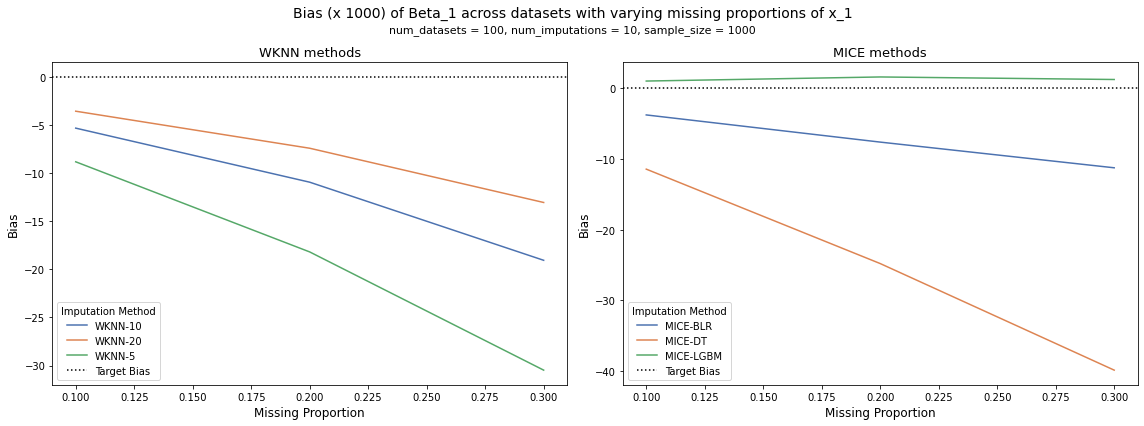

In [943]:
feature_dict = { 
    "Sample Size 1000 (10% Missing)": 0.1,
    "Sample Size 1000 (20% Missing)": 0.2,
    "Sample Size 1000 (30% Missing)": 0.3                
}
bias_500_nl = bias_nl_1_rescaled.iloc[:, [0, 7, 8, 9]]

bias_500_nl_knn = bias_500_nl.loc[knn_indices].reset_index()
bias_500_nl_knn = bias_500_nl_knn.drop(["index"], axis=1)
bias_500_nl_knn = bias_500_nl_knn.rename(columns=feature_dict)

bias_500_nl_mice = bias_500_nl.loc[mice_indices].reset_index() 
bias_500_nl_mice = bias_500_nl_mice.drop(["index"], axis=1)
bias_500_nl_mice = bias_500_nl_mice.rename(columns=feature_dict)

bias_500_nl_knn_long = bias_500_nl_knn.melt(id_vars=["Type"], var_name="Missingness", value_name="Bias")
bias_500_nl_mice_long = bias_500_nl_mice.melt(id_vars=["Type"], var_name="Missingness", value_name="Bias")

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Bias (x 1000) of Beta_1 across datasets with varying missing proportions of x_1", fontsize=14)
fig.text(0.5, 0.92, "num_datasets = 100, num_imputations = 10, sample_size = 1000", ha='center', fontsize=11)
sns.lineplot(data=bias_500_nl_knn_long, x="Missingness", y="Bias", hue="Type", ax=axs[0], palette="deep")
axs[0].set_title("WKNN methods", fontsize=13)
axs[0].set_xlabel("Missing Proportion", fontsize=12)
axs[0].set_ylabel("Bias", fontsize=12)
axs[0].axhline(
    y=0.00, color='black', linestyle=":", label='Target Bias'
)
axs[0].legend(loc="lower left", title="Imputation Method")
sns.lineplot(data=bias_500_nl_mice_long, x="Missingness", y="Bias", hue="Type", ax=axs[1], palette="deep")
axs[1].set_title("MICE methods", fontsize=13)
axs[1].set_xlabel("Missing Proportion", fontsize=12)
axs[1].set_ylabel("Bias", fontsize=12)
axs[1].axhline(
    y=0.00, color='black', linestyle=":", label='Target Bias'
)
axs[1].legend(loc="lower left", title="Imputation Method")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

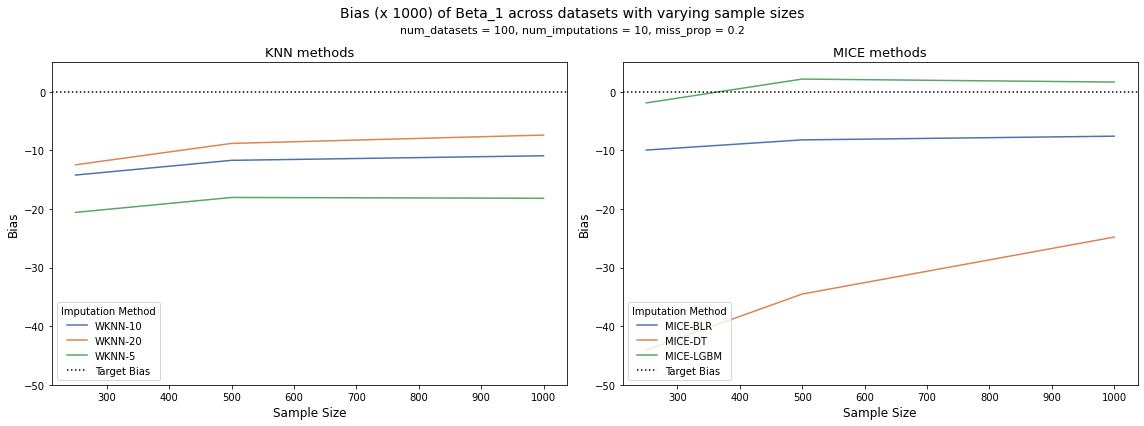

In [944]:
feature_dict = { 
    "Sample Size 250 (20% Missing)": 250,
    "Sample Size 500 (20% Missing)": 500,
    "Sample Size 1000 (20% Missing)": 1000                
}
bias_20_nl = bias_nl_1_rescaled.iloc[:,[0, 2, 5, 8]]
bias_20_nl = bias_20_nl.rename(columns=feature_dict)

bias_20_nl_knn = bias_20_nl.loc[knn_indices].reset_index()
bias_20_nl_knn = bias_20_nl_knn.drop(["index"], axis=1)
bias_20_nl_knn = bias_20_nl_knn.rename(columns=feature_dict)

bias_20_nl_mice = bias_20_nl.loc[mice_indices].reset_index() 
bias_20_nl_mice = bias_20_nl_mice.drop(["index"], axis=1)
bias_20_nl_mice = bias_20_nl_mice.rename(columns=feature_dict)

bias_20_nl_knn_long = bias_20_nl_knn.melt(id_vars=["Type"], var_name="Missingness", value_name="Bias")
bias_20_nl_mice_long = bias_20_nl_mice.melt(id_vars=["Type"], var_name="Missingness", value_name="Bias")

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
axs = axs.ravel()
fig.suptitle("Bias (x 1000) of Beta_1 across datasets with varying sample sizes", fontsize=14)
fig.text(0.5, 0.92, "num_datasets = 100, num_imputations = 10, miss_prop = 0.2", ha='center', fontsize=11)
sns.lineplot(data=bias_20_nl_knn_long, x="Missingness", y="Bias", hue="Type", ax=axs[0], palette="deep")
axs[0].set_title("KNN methods", fontsize=13)
axs[0].set_xlabel("Sample Size", fontsize=12)
axs[0].set_ylabel("Bias", fontsize=12)
axs[0].axhline(
    y=0.00, color='black', linestyle=":", label='Target Bias'
)
axs[0].legend(loc="lower left", title="Imputation Method")
axs[0].set_ylim([-50,5])
sns.lineplot(data=bias_20_nl_mice_long, x="Missingness", y="Bias", hue="Type", ax=axs[1], palette="deep")
axs[1].set_title("MICE methods", fontsize=13)
axs[1].set_xlabel("Sample Size", fontsize=12)
axs[1].set_ylabel("Bias", fontsize=12)
axs[1].axhline(
    y=0.00, color='black', linestyle=":", label='Target Bias'
)
axs[1].legend(loc="lower left", title="Imputation Method")
axs[1].set_ylim([-50,5])
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [923]:
bias_20_nl_mice_long

,Type,Missingness,Bias
0,MICE-BLR,250,-9.97
1,MICE-DT,250,-44.06
2,MICE-LGBM,250,-1.93
3,MICE-BLR,500,-8.23
4,MICE-DT,500,-34.52
5,MICE-LGBM,500,2.14
6,MICE-BLR,1000,-7.60
7,MICE-DT,1000,-24.81
8,MICE-LGBM,1000,1.63


##### MSE

In [803]:
mse_nl_1 = pd.concat([
    mse_250_10_1, mse_250_20_1, mse_250_30_1, 
    mse_500_10_1, mse_500_20_1, mse_500_30_1, 
    mse_1000_10_1, mse_1000_20_1, mse_1000_30_1
], axis=1)
mse_nl_1.columns = [
    "Sample Size 250 (10% Missing)", "Sample Size 250 (20% Missing)", "Sample Size 250 (30% Missing)",
    "Sample Size 500 (10% Missing)", "Sample Size 500 (20% Missing)", "Sample Size 500 (30% Missing)",
    "Sample Size 1000 (10% Missing)", "Sample Size 1000 (20% Missing)", "Sample Size 1000 (30% Missing)"
]

In [805]:
mse_nl_1_rescaled = mse_nl_1 * 1000
mse_nl_1_rescaled = mse_nl_1_rescaled.round(2).reset_index()
mse_nl_1_rescaled_latex = mse_nl_1_rescaled.to_latex(index=False)
print(mse_nl_1_rescaled_latex)

\begin{tabular}{lrrrrrrrrr}
\toprule
Type & Sample Size 250 (10% Missing) & Sample Size 250 (20% Missing) & Sample Size 250 (30% Missing) & Sample Size 500 (10% Missing) & Sample Size 500 (20% Missing) & Sample Size 500 (30% Missing) & Sample Size 1000 (10% Missing) & Sample Size 1000 (20% Missing) & Sample Size 1000 (30% Missing) \\
\midrule
MICE-BLR & 0.170000 & 0.280000 & 0.450000 & 0.090000 & 0.160000 & 0.270000 & 0.050000 & 0.110000 & 0.190000 \\
MICE-DT & 0.670000 & 2.110000 & 5.040000 & 0.350000 & 1.320000 & 3.040000 & 0.170000 & 0.670000 & 1.650000 \\
MICE-LGBM & 0.150000 & 0.210000 & 0.310000 & 0.080000 & 0.100000 & 0.110000 & 0.030000 & 0.050000 & 0.050000 \\
PMM10-BLR & 0.190000 & 0.350000 & 0.740000 & 0.090000 & 0.170000 & 0.340000 & 0.050000 & 0.110000 & 0.200000 \\
PMM10-DT & 0.660000 & 2.260000 & 5.190000 & 0.340000 & 1.320000 & 3.030000 & 0.170000 & 0.660000 & 1.680000 \\
PMM10-LGBM & 0.160000 & 0.230000 & 0.360000 & 0.080000 & 0.100000 & 0.110000 & 0.040000 & 0.050000 

##### Coverage Probability

In [702]:
prob_nl_1 = pd.concat([
    prob_250_10_1, prob_250_20_1, prob_250_30_1, 
    prob_500_10_1, prob_500_20_1, prob_500_30_1, 
    prob_1000_10_1, prob_1000_20_1, prob_1000_30_1
], axis=1)
prob_nl_1.columns = [
    "Sample Size 250 (10% Missing)", "Sample Size 250 (20% Missing)", "Sample Size 250 (30% Missing)",
    "Sample Size 500 (10% Missing)", "Sample Size 500 (20% Missing)", "Sample Size 500 (30% Missing)",
    "Sample Size 1000 (10% Missing)", "Sample Size 1000 (20% Missing)", "Sample Size 1000 (30% Missing)"
]
prob_nl_1 = prob_nl_1.reset_index()

In [799]:
prob_nl_1_latex = prob_nl_1.to_latex(index=False)
print(prob_nl_1_latex)

\begin{tabular}{lrrrrrrrrr}
\toprule
Type & Sample Size 250 (10% Missing) & Sample Size 250 (20% Missing) & Sample Size 250 (30% Missing) & Sample Size 500 (10% Missing) & Sample Size 500 (20% Missing) & Sample Size 500 (30% Missing) & Sample Size 1000 (10% Missing) & Sample Size 1000 (20% Missing) & Sample Size 1000 (30% Missing) \\
\midrule
MICE-BLR & 0.970000 & 0.940000 & 0.930000 & 0.930000 & 0.930000 & 0.890000 & 0.880000 & 0.810000 & 0.730000 \\
MICE-DT & 0.750000 & 0.270000 & 0.050000 & 0.700000 & 0.150000 & 0.010000 & 0.640000 & 0.100000 & 0.000000 \\
MICE-LGBM & 0.970000 & 0.950000 & 0.910000 & 0.940000 & 0.920000 & 0.920000 & 0.960000 & 0.960000 & 0.970000 \\
PMM10-BLR & 0.970000 & 0.910000 & 0.860000 & 0.930000 & 0.920000 & 0.850000 & 0.880000 & 0.850000 & 0.730000 \\
PMM10-DT & 0.790000 & 0.310000 & 0.030000 & 0.680000 & 0.150000 & 0.010000 & 0.620000 & 0.110000 & 0.000000 \\
PMM10-LGBM & 0.950000 & 0.970000 & 0.900000 & 0.950000 & 0.930000 & 0.910000 & 0.960000 & 0.940000 

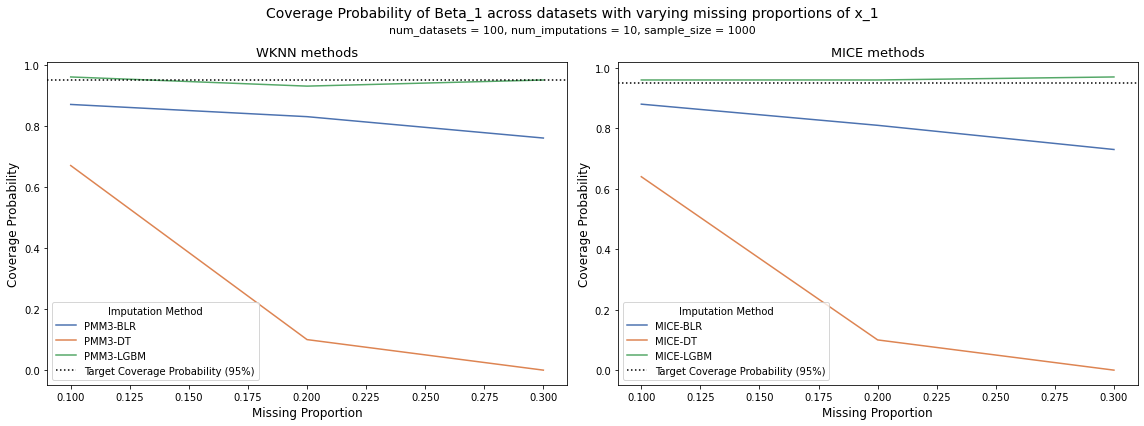

In [917]:
feature_dict = { 
    "Sample Size 1000 (10% Missing)": 0.1,
    "Sample Size 1000 (20% Missing)": 0.2,
    "Sample Size 1000 (30% Missing)": 0.3                
}
prob_1000_nl = prob_nl_1.iloc[:, [0, 7, 8, 9]]

prob_1000_nl_knn = prob_1000_nl.loc[knn_indices].reset_index()
prob_1000_nl_knn = prob_1000_nl_knn.drop(["index"], axis=1)
prob_1000_nl_knn = prob_1000_nl_knn.rename(columns=feature_dict)

prob_1000_nl_mice = prob_1000_nl.loc[mice_indices].reset_index() 
prob_1000_nl_mice = prob_1000_nl_mice.drop(["index"], axis=1)
prob_1000_nl_mice = prob_1000_nl_mice.rename(columns=feature_dict)

prob_1000_nl_knn_long = prob_1000_nl_knn.melt(id_vars=["Type"], var_name="Missingness", value_name="Bias")
prob_1000_nl_mice_long = prob_1000_nl_mice.melt(id_vars=["Type"], var_name="Missingness", value_name="Bias")

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Coverage Probability of Beta_1 across datasets with varying missing proportions of x_1", fontsize=14)
fig.text(0.5, 0.92, "num_datasets = 100, num_imputations = 10, sample_size = 1000", ha='center', fontsize=11)
sns.lineplot(data=prob_1000_nl_knn_long, x="Missingness", y="Bias", hue="Type", ax=axs[0], palette="deep")
axs[0].axhline(
    y=0.95, color='black', linestyle=":", label='Target Coverage Probability (95%)'
)
axs[0].set_title("WKNN methods", fontsize=13)
axs[0].set_xlabel("Missing Proportion", fontsize=12)
axs[0].set_ylabel("Coverage Probability", fontsize=12)
axs[0].legend(loc="lower left", title="Imputation Method")
sns.lineplot(data=prob_1000_nl_mice_long, x="Missingness", y="Bias", hue="Type", ax=axs[1], palette="deep")
axs[1].axhline(
    y=0.95, color='black', linestyle=":", label='Target Coverage Probability (95%)'
)
axs[1].set_title("MICE methods", fontsize=13)
axs[1].set_xlabel("Missing Proportion", fontsize=12)
axs[1].set_ylabel("Coverage Probability", fontsize=12)
axs[1].legend(loc="lower left", title="Imputation Method")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

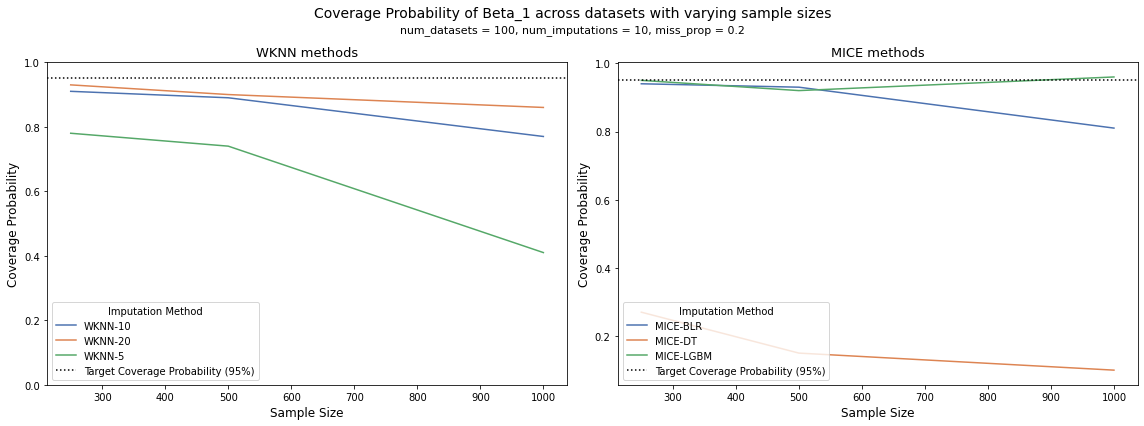

In [868]:
feature_dict = { 
    "Sample Size 250 (20% Missing)": 250,
    "Sample Size 500 (20% Missing)": 500,
    "Sample Size 1000 (20% Missing)": 1000                
}
prob_20_nl = prob_nl_1.iloc[:,[0, 2, 5, 8]]
prob_20_nl = prob_20_nl.rename(columns=feature_dict)

prob_20_nl_knn = prob_20_nl.loc[knn_indices].reset_index()
prob_20_nl_knn = prob_20_nl_knn.drop(["index"], axis=1)
prob_20_nl_knn = prob_20_nl_knn.rename(columns=feature_dict)

prob_20_nl_mice = prob_20_nl.loc[mice_indices].reset_index() 
prob_20_nl_mice = prob_20_nl_mice.drop(["index"], axis=1)
prob_20_nl_mice = prob_20_nl_mice.rename(columns=feature_dict)

prob_20_nl_knn_long = prob_20_nl_knn.melt(id_vars=["Type"], var_name="Sample Size", value_name="Coverage Probability")
prob_20_nl_mice_long = prob_20_nl_mice.melt(id_vars=["Type"], var_name="Sample Size", value_name="Coverage Probability")

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
axs = axs.ravel()
fig.suptitle("Coverage Probability of Beta_1 across datasets with varying sample sizes", fontsize=14)
fig.text(0.5, 0.92, "num_datasets = 100, num_imputations = 10, miss_prop = 0.2", ha='center', fontsize=11)
sns.lineplot(data=prob_20_nl_knn_long, x="Sample Size", y="Coverage Probability", hue="Type", ax=axs[0], palette="deep")
axs[0].axhline(
    y=0.95, color='black', linestyle=":", label='Target Coverage Probability (95%)'
)
axs[0].set_title("WKNN methods", fontsize=13)
axs[0].set_xlabel("Sample Size", fontsize=12)
axs[0].set_ylabel("Coverage Probability", fontsize=12)
axs[0].legend(loc="lower left", title="Imputation Method")
axs[0].set_ylim([0, 1.0])
sns.lineplot(data=prob_20_nl_mice_long, x="Sample Size", y="Coverage Probability", hue="Type", ax=axs[1], palette="deep")
axs[1].axhline(
    y=0.95, color='black', linestyle=":", label='Target Coverage Probability (95%)'
)
axs[1].set_title("MICE methods", fontsize=13)
axs[1].set_xlabel("Sample Size", fontsize=12)
axs[1].set_ylabel("Coverage Probability", fontsize=12)
axs[1].legend(loc="lower left", title="Imputation Method")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### A comparison between true and predicted values

#### Sample Size 250

In [499]:
mse_250_nl = pd.DataFrame(mse_comparison_dict_nl[250])
mse_250_nl = mse_250_nl.set_index("model_type")

#### Sample Size 500

In [500]:
mse_500_nl = pd.DataFrame(mse_comparison_dict_nl[500])
mse_500_nl = mse_500_nl.set_index("model_type")

#### Sample Size 1000

In [501]:
mse_1000_nl = pd.DataFrame(mse_comparison_dict_nl[1000])
mse_1000_nl = mse_1000_nl.set_index("model_type")

#### Summary

In [509]:
mse_u_results_nl = pd.concat([mse_250_nl, mse_500_nl, mse_1000_nl], axis=1)
mse_u_results_nl_rescaled = mse_u_results_nl * 1000
mse_u_results_nl_rescaled = mse_u_results_nl_rescaled.round(2).reset_index()

In [ ]:
bias_500_nl_knn_long = bias_500_nl_knn.melt(id_vars=["Type"], var_name="Missingness", value_name="Bias")

In [732]:
mse_u_results_1000_20

,Type,MSE,Method
0,MICE-BLR,86.49,BLR
1,MICE-DT,126.64,DT
2,MICE-LGBM,65.71,LGBM
3,PMM3-BLR,87.91,BLR
4,PMM3-DT,125.68,DT
5,PMM3-LGBM,64.77,LGBM
6,PMM5-BLR,87.04,BLR
7,PMM5-DT,125.60,DT
8,PMM5-LGBM,65.07,LGBM
9,PMM10-BLR,86.32,BLR


In [743]:
blr_indices = [0, 3, 6, 9]
dt_indices = [1, 4, 7, 10]
lgbm_indices = [2, 5, 8, 11]

In [757]:
mse_u_results_1000_20 = mse_u_results_nl_rescaled.iloc[3:, [0, -2]]
mse_u_results_1000_20 = mse_u_results_1000_20.rename(columns={
    "Missingness Percentage (20%)": "MSE",
    "model_type": "Type"
}).reset_index()
mse_u_results_1000_20 = mse_u_results_1000_20.drop("index", axis=1)
mse_u_results_1000_20["Method"] = ["BLR", "DT", "LGBM"] * 4
framework_list = [
    "MICE", "MICE", "MICE", 
    "PMM3", "PMM3", "PMM3",
    "PMM5", "PMM5", "PMM5", 
    "PMM10", "PMM10", "PMM10"
]
mse_u_results_1000_20["Type"] = framework_list

In [763]:
pivot_df = mse_u_results_1000_20.pivot_table(values="MSE", index="Method", columns="Type")
pivot_df

Type,MICE,PMM10,PMM3,PMM5
Method,,,,
BLR,86.49,86.32,87.91,87.04
DT,126.64,125.66,125.68,125.60
LGBM,65.71,65.99,64.77,65.07


In [729]:
mse_u_results_1000_20

,Type,MSE,Method
0,MICE-BLR,86.49,BLR
1,MICE-DT,126.64,DT
2,MICE-LGBM,65.71,LGBM
3,PMM3-BLR,87.91,BLR
4,PMM3-DT,125.68,DT
5,PMM3-LGBM,64.77,LGBM
6,PMM5-BLR,87.04,BLR
7,PMM5-DT,125.60,DT
8,PMM5-LGBM,65.07,LGBM
9,PMM10-BLR,86.32,BLR


In [511]:
mse_u_results_nl_rescaled_latex = mse_u_results_nl_rescaled.to_latex(index=False)
print(mse_u_results_nl_rescaled_latex)

\begin{tabular}{lrrrrrrrrr}
\toprule
model_type & Missingness Percentage (10%) & Missingness Percentage (20%) & Missingness Percentage (30%) & Missingness Percentage (10%) & Missingness Percentage (20%) & Missingness Percentage (30%) & Missingness Percentage (10%) & Missingness Percentage (20%) & Missingness Percentage (30%) \\
\midrule
WKNN-5 & 85.160000 & 163.110000 & 238.480000 & 79.790000 & 157.020000 & 232.000000 & 80.540000 & 156.760000 & 231.480000 \\
WKNN-10 & 80.110000 & 153.870000 & 226.650000 & 73.490000 & 147.030000 & 218.490000 & 74.160000 & 144.990000 & 215.700000 \\
WKNN-20 & 79.490000 & 152.480000 & 226.640000 & 71.220000 & 143.480000 & 214.320000 & 70.740000 & 139.560000 & 207.640000 \\
MICE-BLR & 50.050000 & 94.230000 & 133.670000 & 45.090000 & 92.780000 & 130.930000 & 45.160000 & 86.490000 & 129.810000 \\
MICE-DT & 92.770000 & 177.760000 & 258.370000 & 77.310000 & 151.810000 & 225.250000 & 61.880000 & 126.640000 & 191.000000 \\
MICE-LGBM & 43.540000 & 90.230000 & 134

In [171]:
from knn import get_KNN_estimates
from mice import get_MICE_estimates

import statsmodels.api as sm

In [172]:
from sklearn.metrics import mean_squared_error

In [173]:
def transform_X(X_true, linearity): 
    X_data = X_true.copy()
    if (linearity == True):
        X_data = X_data.drop(["x1_squared"], axis=1)
    else: 
        X_data["x1_squared"] = np.power(X_data["x1"], 2)
        X_data = X_data[["x1", "x1_squared", "x2", "x3"]]
    X_true_final = sm.add_constant(X_data)
    return X_true_final

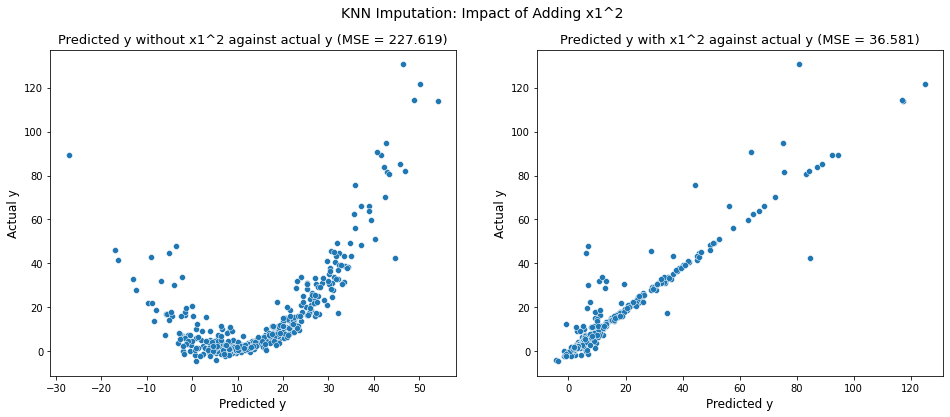

In [174]:
X_list, X_true_list, y_list, scale_list = generate_datasets(1, 400, 0.2, "KNN", False)
X_data = X_list[0]
X_true_data = X_true_list[0]
y_data = y_list[0]
scaler = scale_list[0]

_, _, y_pred_knn10_linear = get_KNN_estimates(X_data, y_data, scaler, 10, True)
_, _, y_pred_knn10_non_linear = get_KNN_estimates(X_data, y_data, scaler, 10, False)


X_data_linear = transform_X(X_true_data, True)
y_actual_linear = X_data_linear @ linear_beta
mse_linear = mean_squared_error(y_actual_linear, y_pred_knn10_linear)
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("KNN Imputation: Impact of Adding x1^2", fontsize=14)
sns.scatterplot(x=y_pred_knn10_linear, y=y_data, ax=axs[0])
axs[0].set_title(
    f"Predicted y without x1^2 against actual y (MSE = {round(mse_linear, 3)})", 
    fontsize=13
)
axs[0].set_xlabel("Predicted y", fontsize=12)
axs[0].set_ylabel("Actual y", fontsize=12)


X_data_non_linear = transform_X(X_true_data, False)
y_actual_non_linear = X_data_non_linear @ non_linear_beta
mse_non_linear = mean_squared_error(y_actual_non_linear, y_pred_knn10_non_linear)

sns.scatterplot(x=y_pred_knn10_non_linear, y=y_data, ax=axs[1])
axs[1].set_title(
    f"Predicted y with x1^2 against actual y (MSE = {round(mse_non_linear, 3)})", 
    fontsize=13
)
axs[1].set_xlabel("Predicted y", fontsize=12)
axs[1].set_ylabel("Actual y", fontsize=12)
plt.show()

In [175]:
X_list, X_true_list, y_list, _ = generate_datasets(1, 1000, 0.2, "MICE", False)
X_data = X_list[0]
X_true_data = X_true_list[0]
y_data = y_list[0]

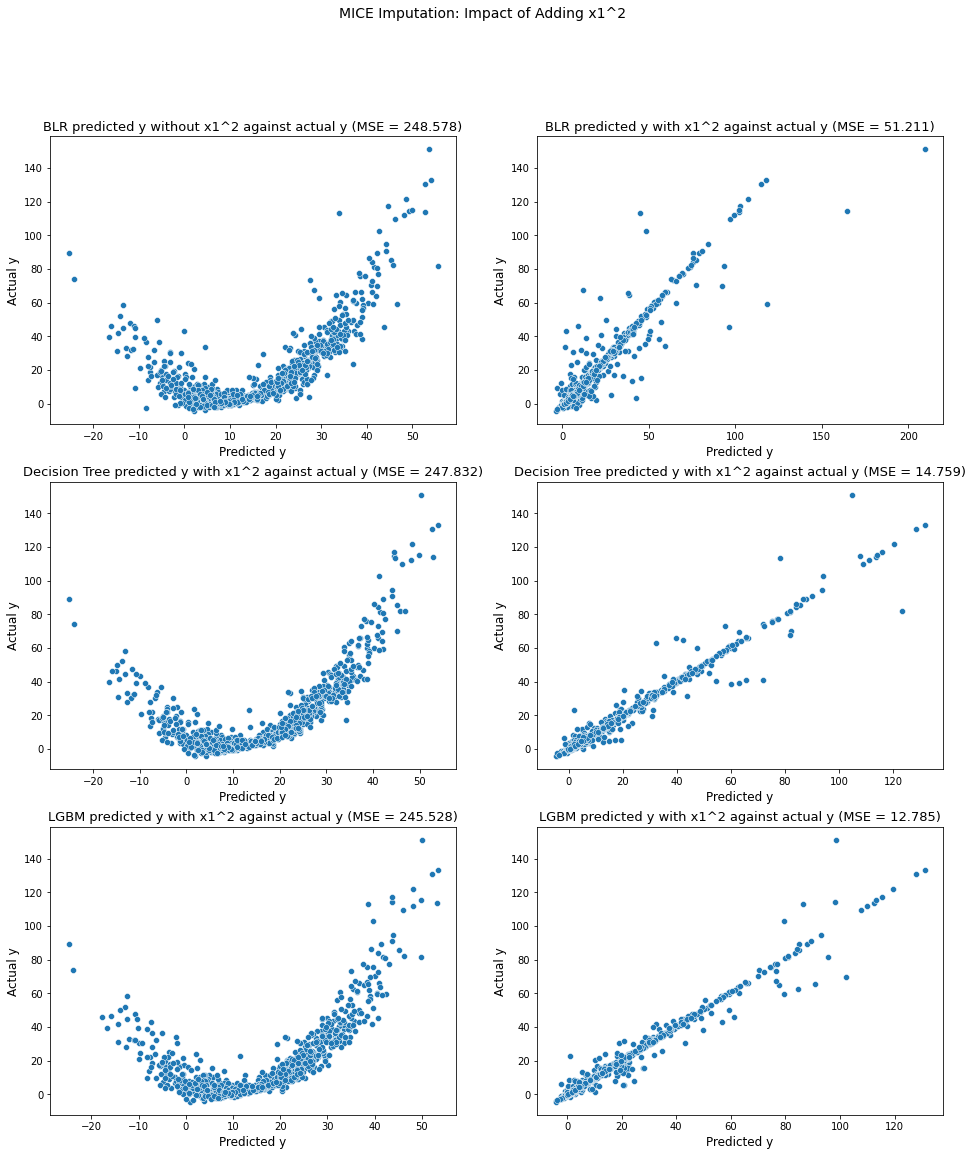

In [176]:
fig, axs = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle("MICE Imputation: Impact of Adding x1^2", fontsize=14)

axs = axs.ravel()

_, _, y_pred_linear_blr = get_MICE_estimates(
    X_data, y_data, 10, "regression", "blr", True
)
_, _, y_pred_non_linear_blr = get_MICE_estimates(
    X_data, y_data, 10, "regression", "blr", False
)

X_data_linear = transform_X(X_true_data, True)
y_actual_linear = X_data_linear @ linear_beta
X_data_non_linear = transform_X(X_true_data, False)
y_actual_non_linear = X_data_non_linear @ non_linear_beta


_, _, y_pred_linear_dt = get_MICE_estimates(X_data, y_data, 10, "regression", "dt", True)
_, _, y_pred_non_linear_dt = get_MICE_estimates(X_data, y_data, 10, "regression", "dt", False)

_, _, y_pred_linear_lgb = get_MICE_estimates(X_data, y_data, 10, "regression", "lgbm", True)
_, _, y_pred_non_linear_lgb = get_MICE_estimates(X_data, y_data, 10, "regression", "lgbm", False)

mse_linear_blr = mean_squared_error(y_actual_linear, y_pred_linear_blr)
sns.scatterplot(x=y_pred_linear_blr, y=y_data, ax=axs[0])
axs[0].set_title(
    f"BLR predicted y without x1^2 against actual y (MSE = {round(mse_linear_blr, 3)})", 
    fontsize=13
)
axs[0].set_xlabel("Predicted y", fontsize=12)
axs[0].set_ylabel("Actual y", fontsize=12)

mse_non_linear_blr = mean_squared_error(y_actual_non_linear, y_pred_non_linear_blr)
sns.scatterplot(x=y_pred_non_linear_blr, y=y_data, ax=axs[1])
axs[1].set_title(
    f"BLR predicted y with x1^2 against actual y (MSE = {round(mse_non_linear_blr, 3)})", 
    fontsize=13
)
axs[1].set_xlabel("Predicted y", fontsize=12)
axs[1].set_ylabel("Actual y", fontsize=12)


mse_linear_dt = mean_squared_error(y_actual_linear, y_pred_linear_dt)
sns.scatterplot(x=y_pred_linear_dt, y=y_data, ax=axs[2])
axs[2].set_title(
    f"Decision Tree predicted y with x1^2 against actual y (MSE = {round(mse_linear_dt, 3)})", 
    fontsize=13
)
axs[2].set_xlabel("Predicted y", fontsize=12)
axs[2].set_ylabel("Actual y", fontsize=12)

sns.scatterplot(x=y_pred_non_linear_dt, y=y_data, ax=axs[3])
mse_non_linear_dt = mean_squared_error(y_actual_non_linear, y_pred_non_linear_dt)
axs[3].set_title(
    f"Decision Tree predicted y with x1^2 against actual y (MSE = {round(mse_non_linear_dt, 3)})", 
    fontsize=13
)
axs[3].set_xlabel("Predicted y", fontsize=12)
axs[3].set_ylabel("Actual y", fontsize=12)

mse_linear_lgb = mean_squared_error(y_actual_linear, y_pred_linear_lgb)
sns.scatterplot(x=y_pred_linear_lgb, y=y_data, ax=axs[4])
axs[4].set_title(
    f"LGBM predicted y with x1^2 against actual y (MSE = {round(mse_linear_lgb, 3)})", 
    fontsize=13
)
axs[4].set_xlabel("Predicted y", fontsize=12)
axs[4].set_ylabel("Actual y", fontsize=12)


sns.scatterplot(x=y_pred_non_linear_lgb, y=y_data, ax=axs[5])
mse_non_linear_lgb = mean_squared_error(y_actual_non_linear, y_pred_non_linear_lgb)
axs[5].set_title(
    f"LGBM predicted y with x1^2 against actual y (MSE = {round(mse_non_linear_lgb, 3)})", 
    fontsize=13
)
axs[5].set_xlabel("Predicted y", fontsize=12)
axs[5].set_ylabel("Actual y", fontsize=12)
plt.show()

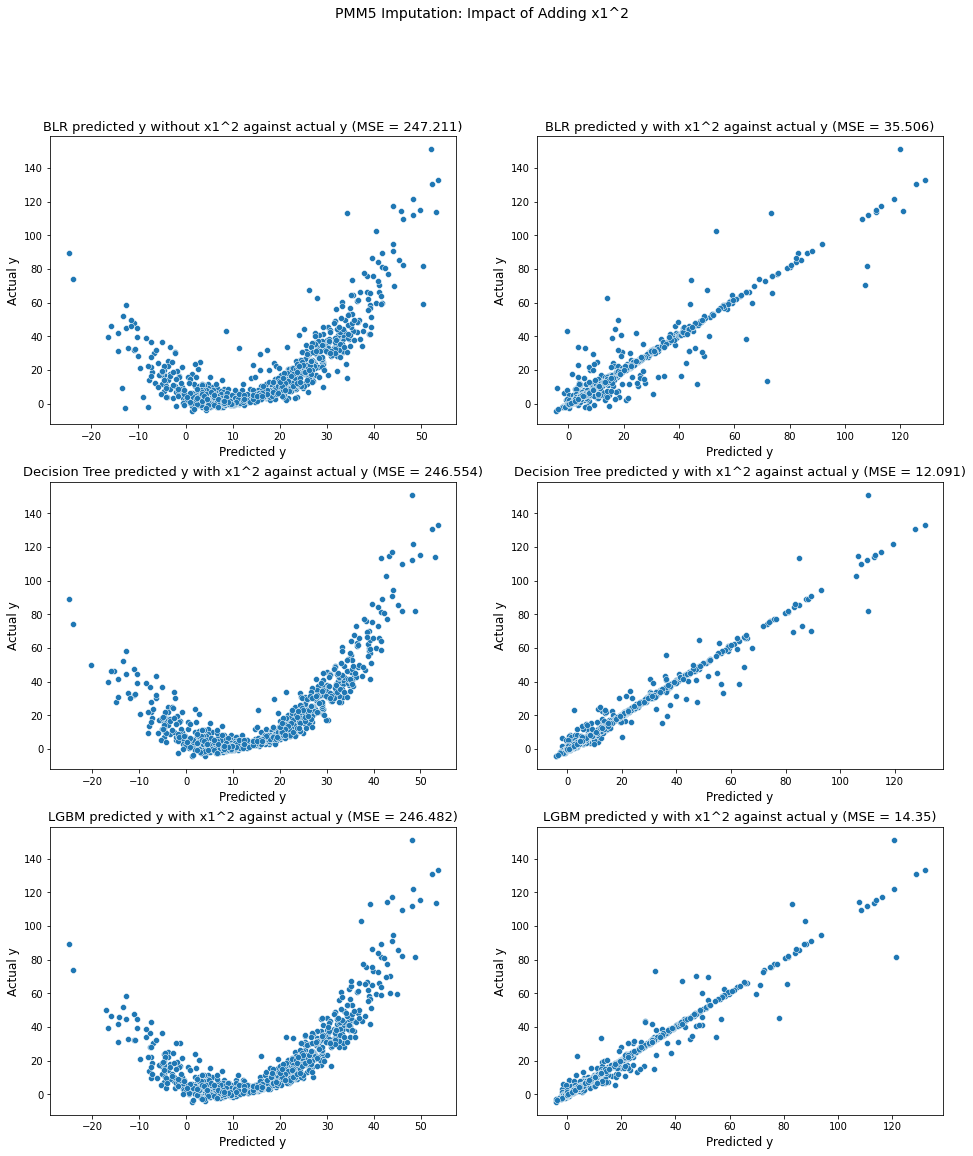

In [177]:
fig, axs = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle("PMM5 Imputation: Impact of Adding x1^2", fontsize=14)

axs = axs.ravel()

_, _, y_pred_linear_blr = get_MICE_estimates(
    X_data, y_data, 10, "pmm5", "blr", True
)
_, _, y_pred_non_linear_blr = get_MICE_estimates(
    X_data, y_data, 10, "pmm5", "blr", False
)

X_data_linear = transform_X(X_true_data, True)
y_actual_linear = X_data_linear @ linear_beta
X_data_non_linear = transform_X(X_true_data, False)
y_actual_non_linear = X_data_non_linear @ non_linear_beta


_, _, y_pred_linear_dt = get_MICE_estimates(X_data, y_data, 10, "pmm5", "dt", True)
_, _, y_pred_non_linear_dt = get_MICE_estimates(X_data, y_data, 10, "pmm5", "dt", False)

_, _, y_pred_linear_lgb = get_MICE_estimates(X_data, y_data, 10, "pmm5", "lgbm", True)
_, _, y_pred_non_linear_lgb = get_MICE_estimates(X_data, y_data, 10, "pmm5", "lgbm", False)

mse_linear_blr = mean_squared_error(y_actual_linear, y_pred_linear_blr)
sns.scatterplot(x=y_pred_linear_blr, y=y_data, ax=axs[0])
axs[0].set_title(
    f"BLR predicted y without x1^2 against actual y (MSE = {round(mse_linear_blr, 3)})", 
    fontsize=13
)
axs[0].set_xlabel("Predicted y", fontsize=12)
axs[0].set_ylabel("Actual y", fontsize=12)

mse_non_linear_blr = mean_squared_error(y_actual_non_linear, y_pred_non_linear_blr)
sns.scatterplot(x=y_pred_non_linear_blr, y=y_data, ax=axs[1])
axs[1].set_title(
    f"BLR predicted y with x1^2 against actual y (MSE = {round(mse_non_linear_blr, 3)})", 
    fontsize=13
)
axs[1].set_xlabel("Predicted y", fontsize=12)
axs[1].set_ylabel("Actual y", fontsize=12)


mse_linear_dt = mean_squared_error(y_actual_linear, y_pred_linear_dt)
sns.scatterplot(x=y_pred_linear_dt, y=y_data, ax=axs[2])
axs[2].set_title(
    f"Decision Tree predicted y with x1^2 against actual y (MSE = {round(mse_linear_dt, 3)})", 
    fontsize=13
)
axs[2].set_xlabel("Predicted y", fontsize=12)
axs[2].set_ylabel("Actual y", fontsize=12)

sns.scatterplot(x=y_pred_non_linear_dt, y=y_data, ax=axs[3])
mse_non_linear_dt = mean_squared_error(y_actual_non_linear, y_pred_non_linear_dt)
axs[3].set_title(
    f"Decision Tree predicted y with x1^2 against actual y (MSE = {round(mse_non_linear_dt, 3)})", 
    fontsize=13
)
axs[3].set_xlabel("Predicted y", fontsize=12)
axs[3].set_ylabel("Actual y", fontsize=12)

mse_linear_lgb = mean_squared_error(y_actual_linear, y_pred_linear_lgb)
sns.scatterplot(x=y_pred_linear_lgb, y=y_data, ax=axs[4])
axs[4].set_title(
    f"LGBM predicted y with x1^2 against actual y (MSE = {round(mse_linear_lgb, 3)})", 
    fontsize=13
)
axs[4].set_xlabel("Predicted y", fontsize=12)
axs[4].set_ylabel("Actual y", fontsize=12)


sns.scatterplot(x=y_pred_non_linear_lgb, y=y_data, ax=axs[5])
mse_non_linear_lgb = mean_squared_error(y_actual_non_linear, y_pred_non_linear_lgb)
axs[5].set_title(
    f"LGBM predicted y with x1^2 against actual y (MSE = {round(mse_non_linear_lgb, 3)})", 
    fontsize=13
)
axs[5].set_xlabel("Predicted y", fontsize=12)
axs[5].set_ylabel("Actual y", fontsize=12)
plt.show()